Plotting amortized roi over time using Sheet 1

In [6]:
# imports
import pandas as pd
import numpy as np
import sys

In [7]:
# Go into above directory and download function
sys.path.append('../../') 
import sheet_to_df


In [8]:
# Extract sheet id - last number of google sheet
sheet_id = 0

df = sheet_to_df.sheet_to_df(sheet_id, 'Sheet1')

In [9]:
# simplify df into columns we actually care about - 
selected_columns = ['Family Name', 'Year', 'Time Complexity Improvement?', 'Transition Class', 'Time Complexity Class']
df = df.loc[:, selected_columns].copy()

# identify all columns of T=1 
df = df[df['Time Complexity Improvement?'] == 1].copy()

# sort the original DataFrame by 'Year' column
df = df.sort_values(by='Year')

# # Only look at years 1960 - present
# df = df[(df['Year'] >= 1960)].copy()


In [10]:
# function to find difference of 'Transition Class' Column
def calculate_transition_difference(entry):
    if entry == '0' or entry == '-' or entry == '1':
        return 0
    numbers = entry.split('->')
    return int(numbers[1]) - int(numbers[0])

In [11]:
# Create a dictionary to store DataFrames for each unique 'Family Name'
family_name_dfs = {}

# Iterate over each group and create a separate DataFrame for each 'Family Name'
for family_name in df['Family Name'].unique():
    # Store the sorted DataFrame for the current 'Family Name' in the dictionary
    family_name_dfs[family_name] = df[df['Family Name'] == family_name]
    family_name_dfs[family_name].loc[:, 'Transition Difference'] = family_name_dfs[family_name]['Transition Class'].apply(calculate_transition_difference)

/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_89543/2012113289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_name_dfs[family_name].loc[:, 'Transition Difference'] = family_name_dfs[family_name]['Transition Class'].apply(calculate_transition_difference)
/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_89543/2012113289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_name_dfs[family_name].loc[:, 'Transition Difference'] = family_name_dfs[family_name]['Transition C

In [12]:
family_name_dfs['Convex Hull']['Year']

65     1935
222    1972
226    1986
228    1988
Name: Year, dtype: int64

In [13]:
family_name_dfs['Convex Hull']['Transition Difference']

65     0
222    2
226    0
228    2
Name: Transition Difference, dtype: int64

We now have DF's for each algorithm and their transition difference. For each of the algorithm DF's, we want to plot the Amortized time (y-axis) found by taking the size of the improvement, plugging in a value for n (1mil), and dividing by the number of years since the last improvement

In [14]:
# def calculate_amortized_cost(df, n=1000000):
#     if row.name == 0:
#         # First element of the DataFrame
#         return n * row['Transition Difference']

#     # Not the first element
#     prev_year_diff = row['Year'] - df.at[row.name - 1, 'Year']
#     return n * row['Transition Difference'] / prev_year_diff

# # Apply the function to create the 'Amortized Cost' column
# for algo in family_name_dfs:
#     print(algo)
#     family_name_dfs[algo]['Amortized Cost'] = family_name_dfs[algo].apply(calculate_amortized_cost, axis=1)

/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_89543/1257493312.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['Years Since Last Improvement'] = family_df['Year'].diff()
/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_89543/1257493312.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['Improvement Rate'] = family_df['Transition Difference'] * n / family_df['Years Since Last Improvement']
/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_89543/12574

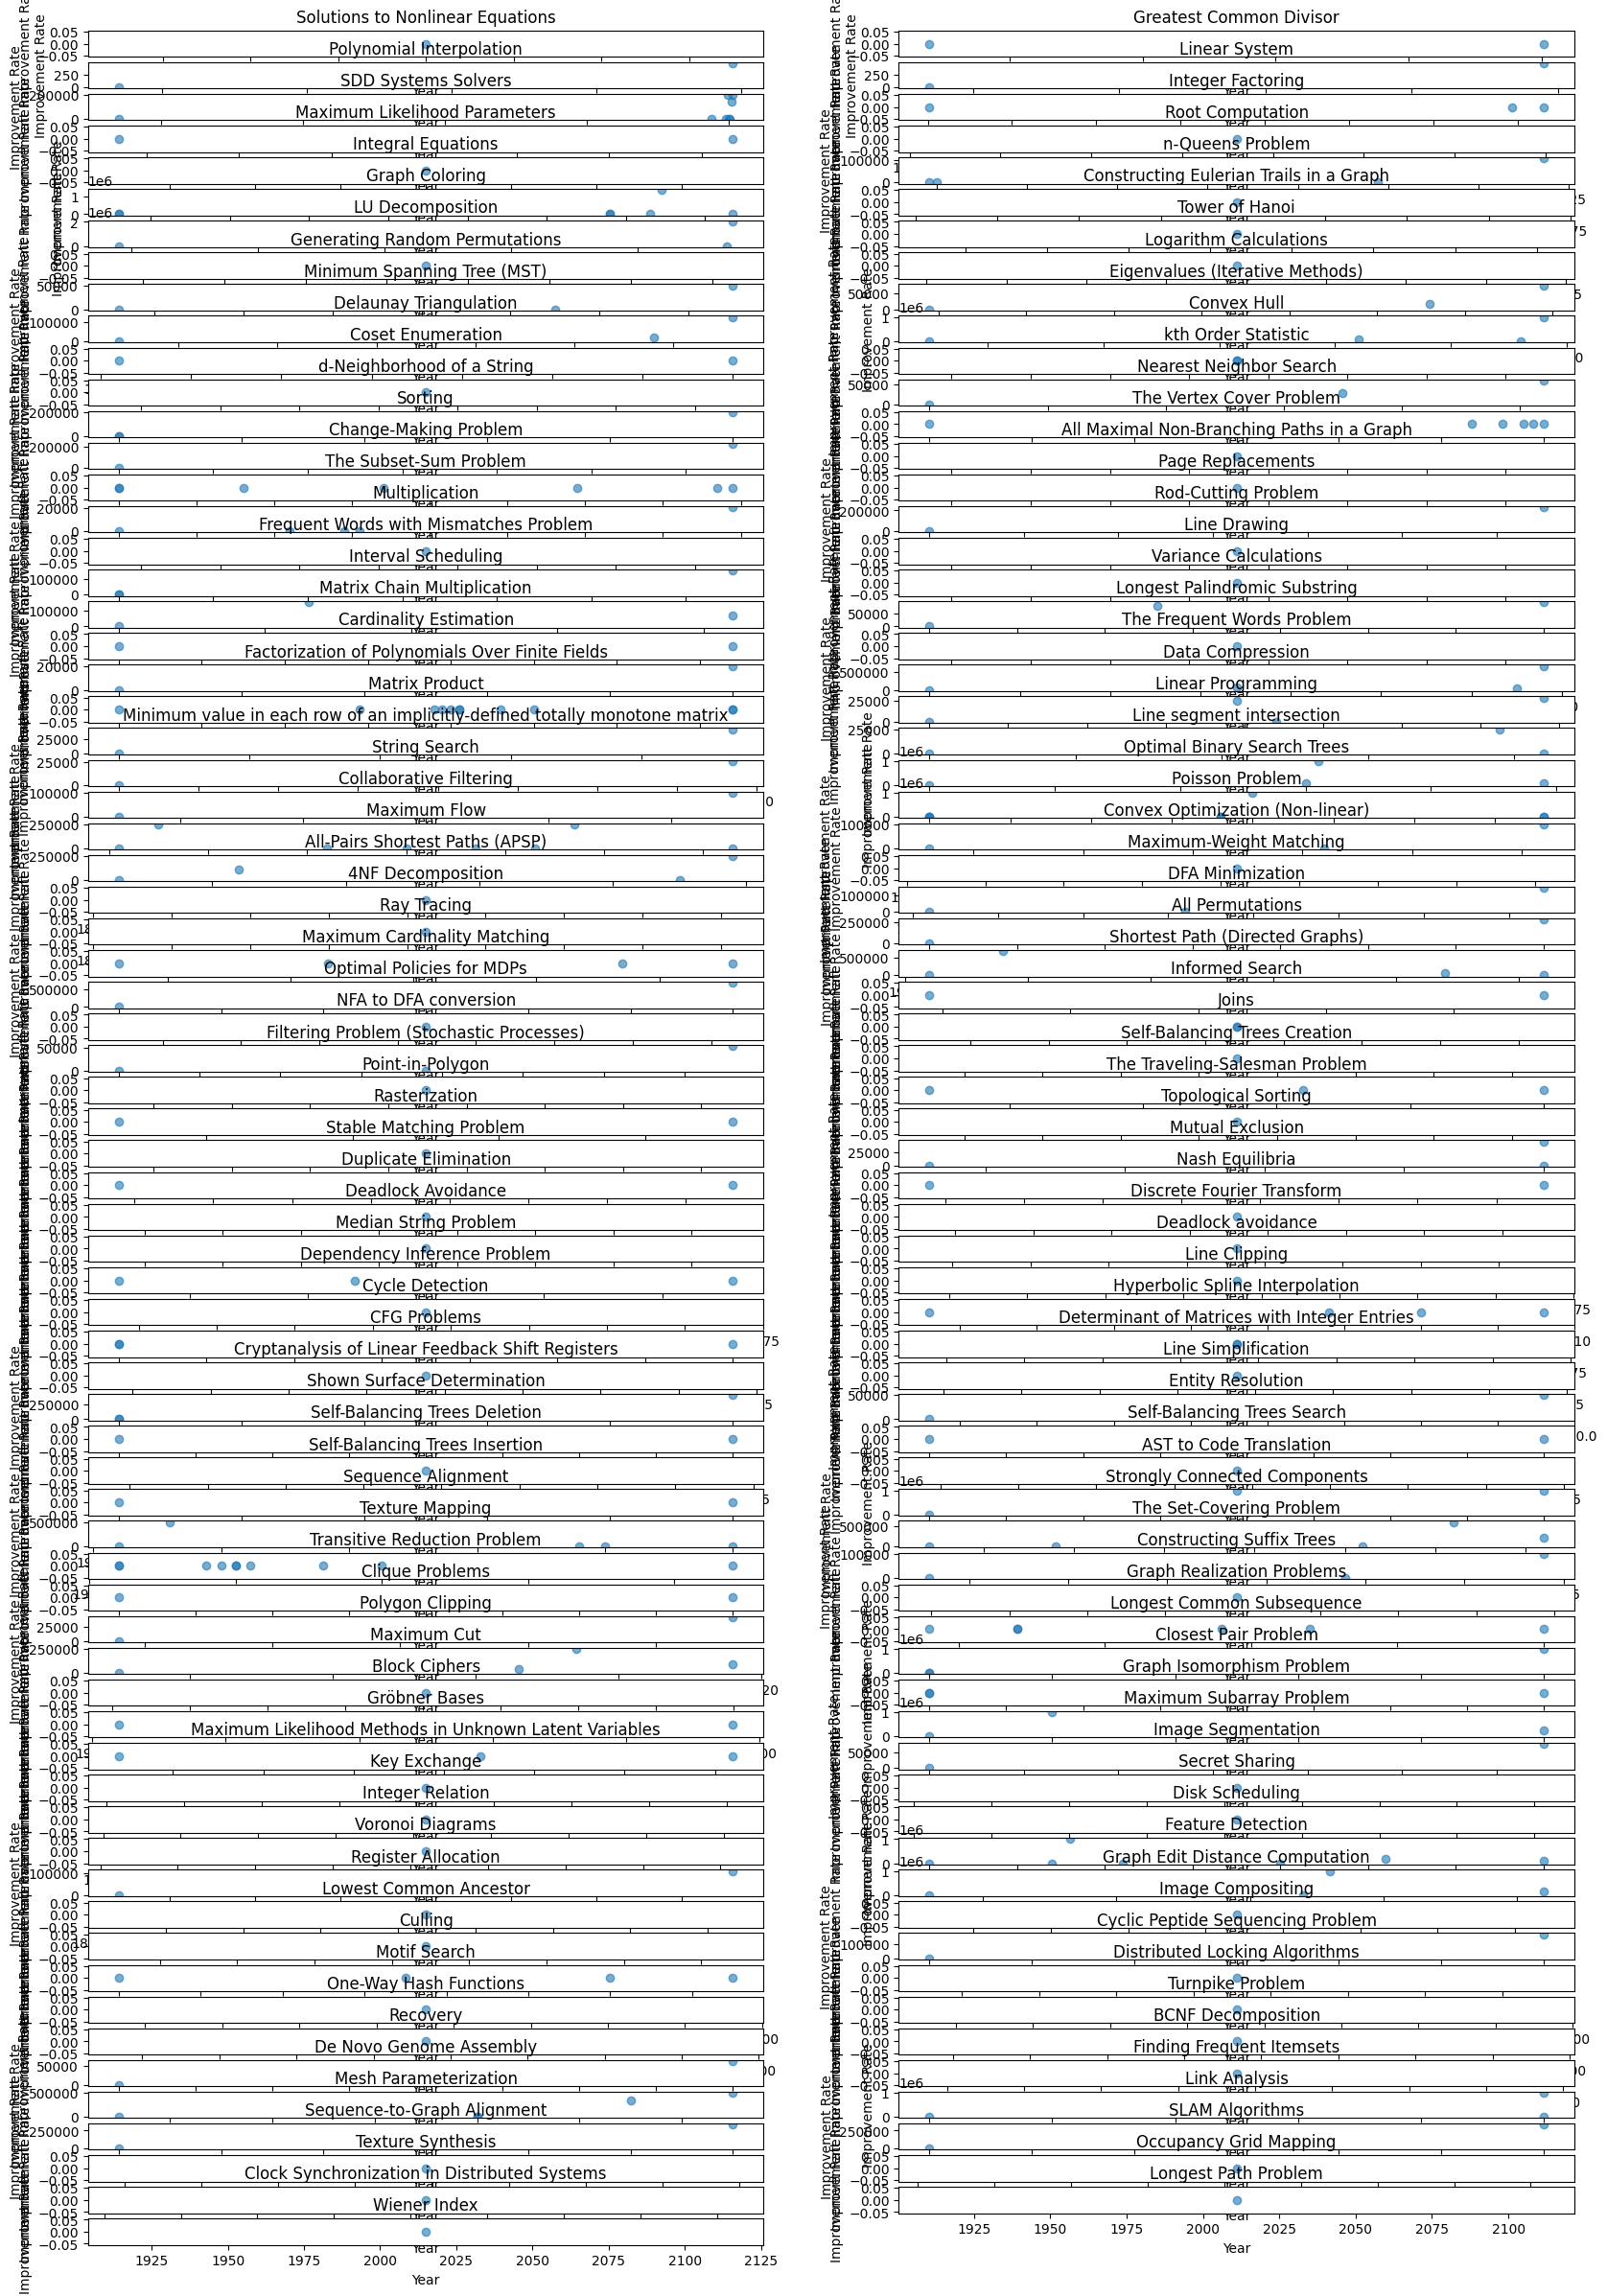

In [16]:
import matplotlib.pyplot as plt
# Set the amortized cost to 1,000,000
n = 1000000

# Initialize the figure
plt.figure(figsize=(20, 30))

# Iterate over each 'Family Name' DataFrame in the dictionary
for i, (family_name, family_df) in enumerate(family_name_dfs.items()):
    # Compute the number of years since the previous improvement for each 'Family Name'
    family_df['Years Since Last Improvement'] = family_df['Year'].diff()

    # Compute the y-value for each algorithm with a time complexity improvement of 1
    family_df['Improvement Rate'] = family_df['Transition Difference'] * n / family_df['Years Since Last Improvement']

    # Replace negative improvement rates with 0
    family_df['Improvement Rate'] = family_df['Improvement Rate'].apply(lambda x: max(0, x))

    # Create a subplot for the current 'Family Name'
    plt.subplot(len(family_name_dfs) // 2 + 1, 2, i + 1)

    # Scatter plot of 'Improvement Rate' over 'Year' for each algorithm
    plt.scatter(family_df['Year'], family_df['Improvement Rate'], alpha=0.6, label=family_name)

    # Add title and labels
    plt.title(family_name)
    plt.xlabel('Year')
    plt.ylabel('Improvement Rate')
    

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_89543/4099129988.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 7))


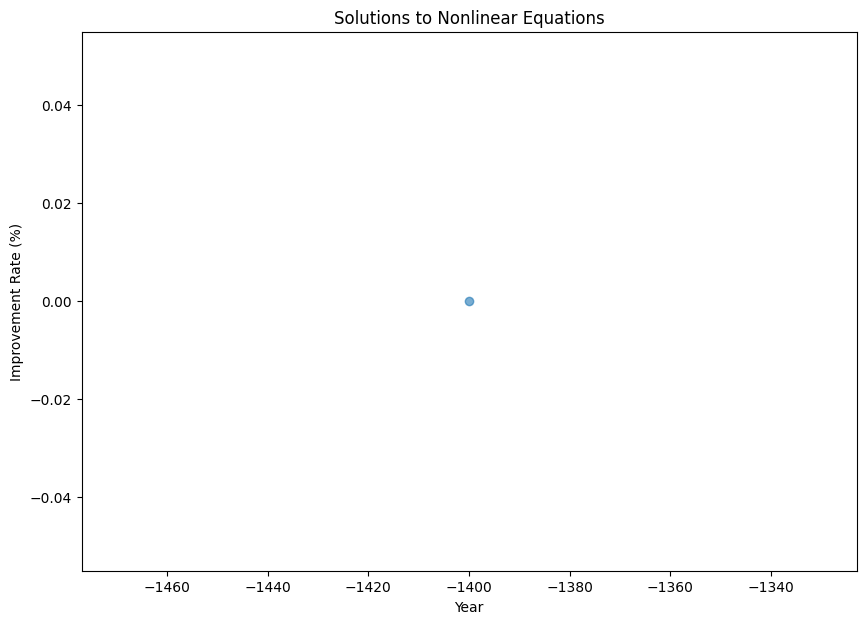

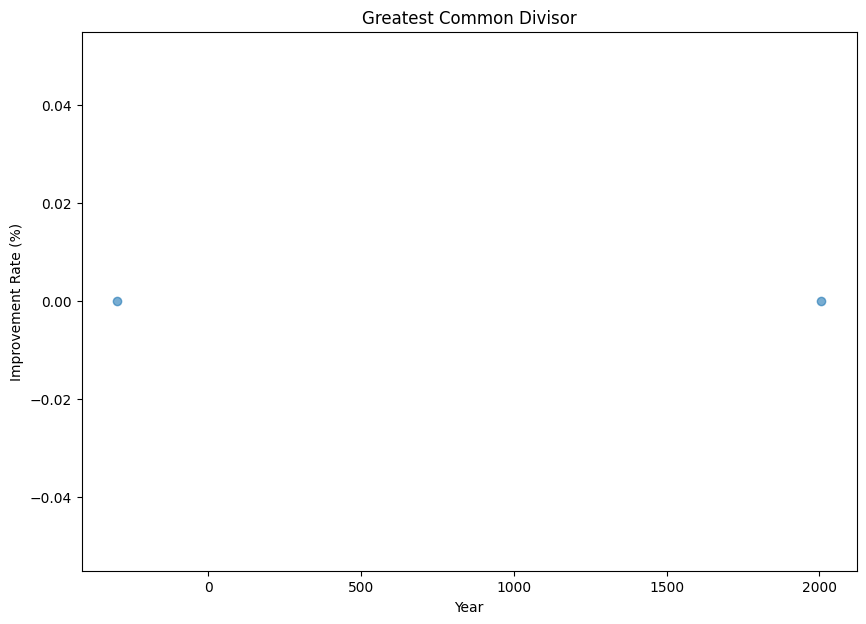

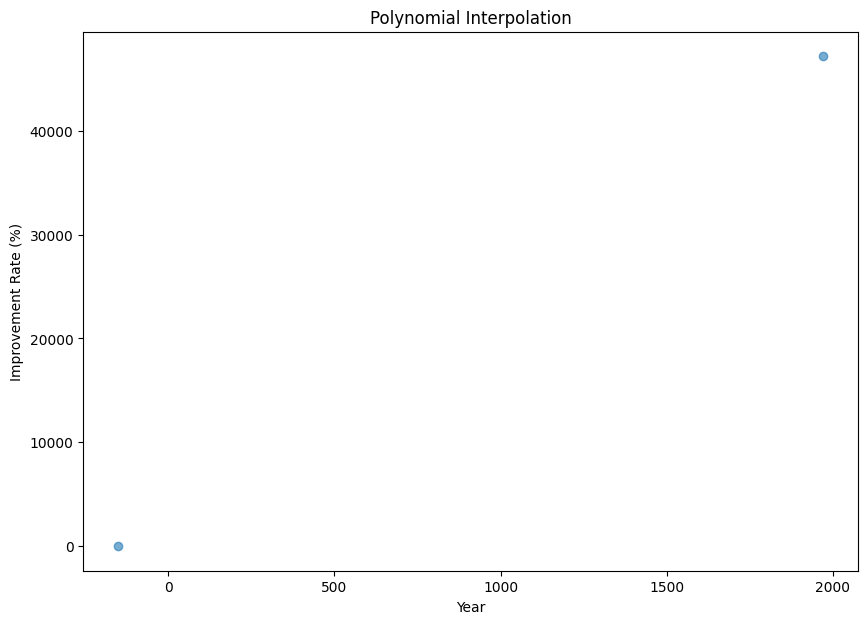

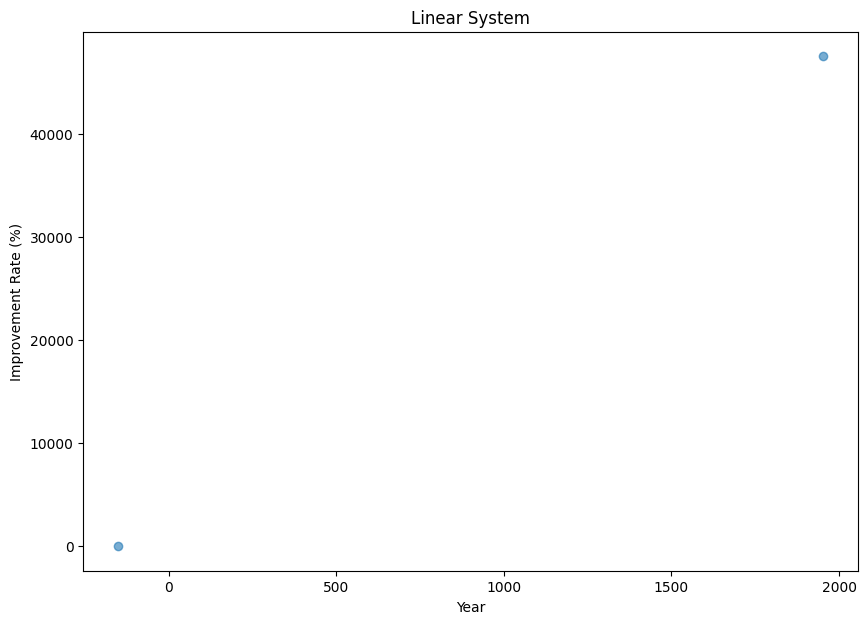

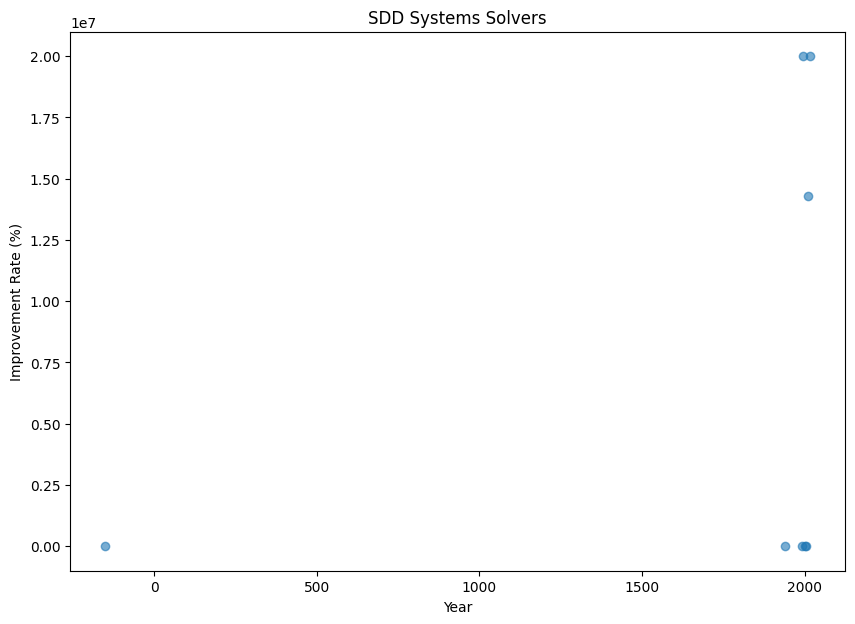

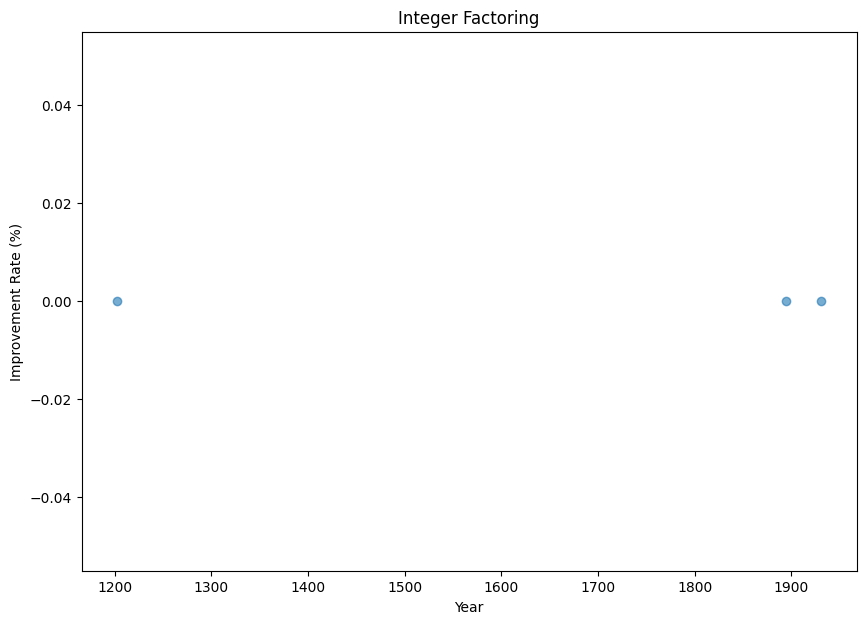

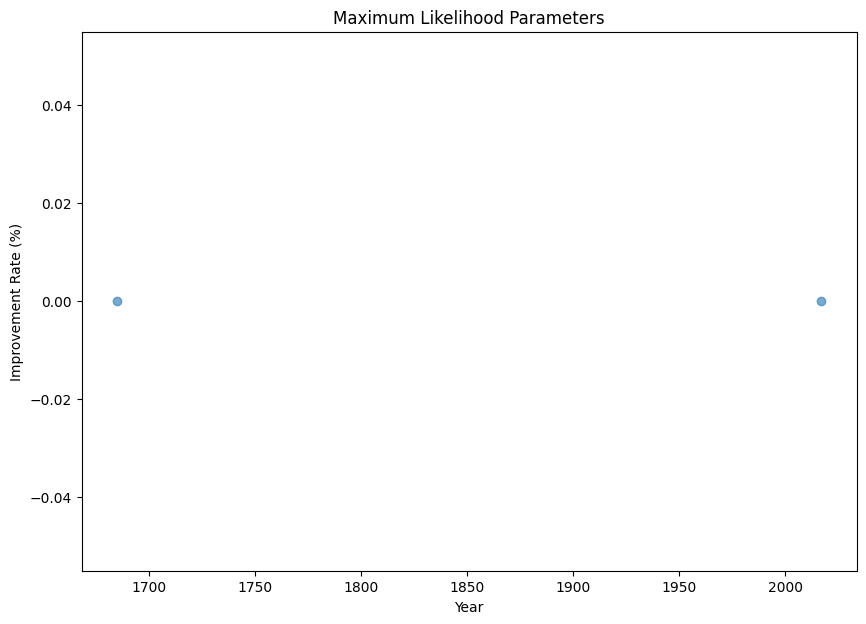

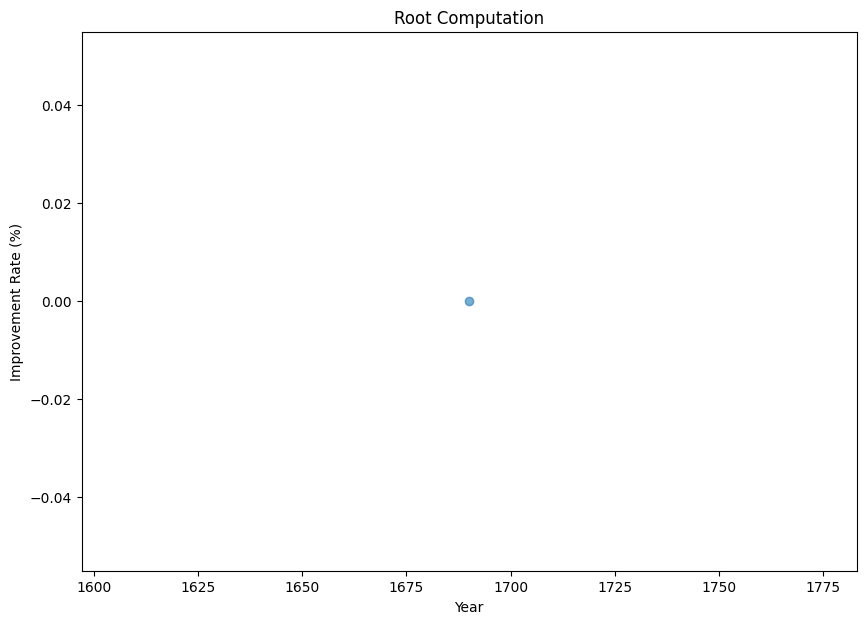

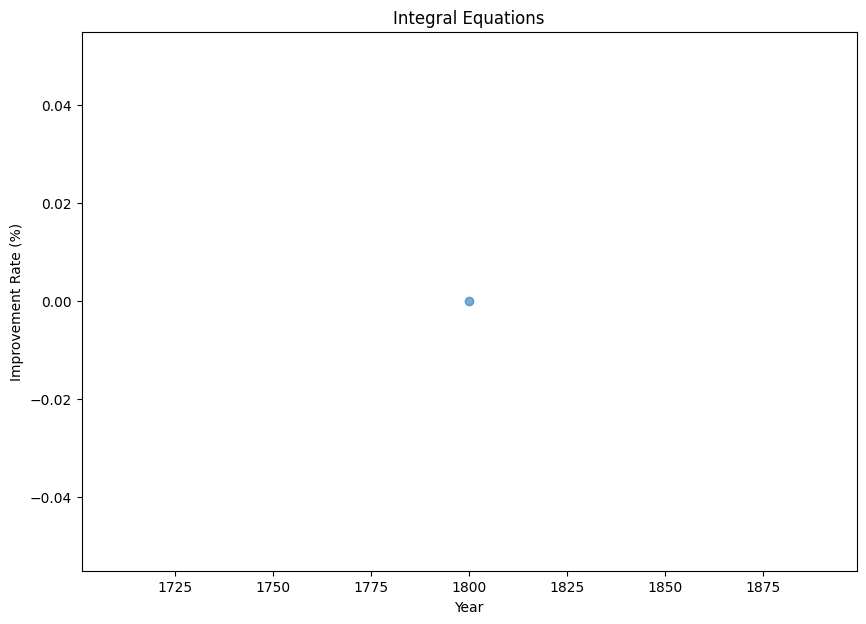

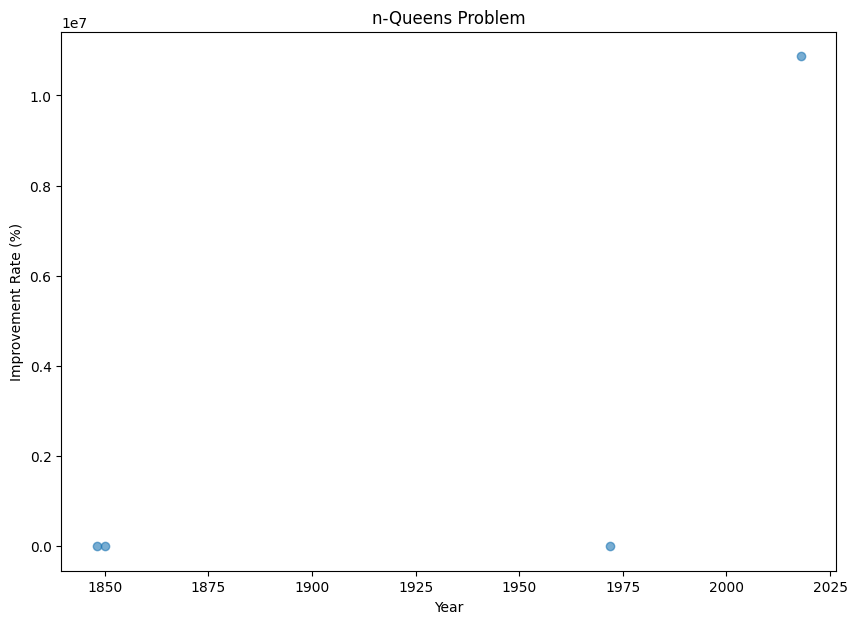

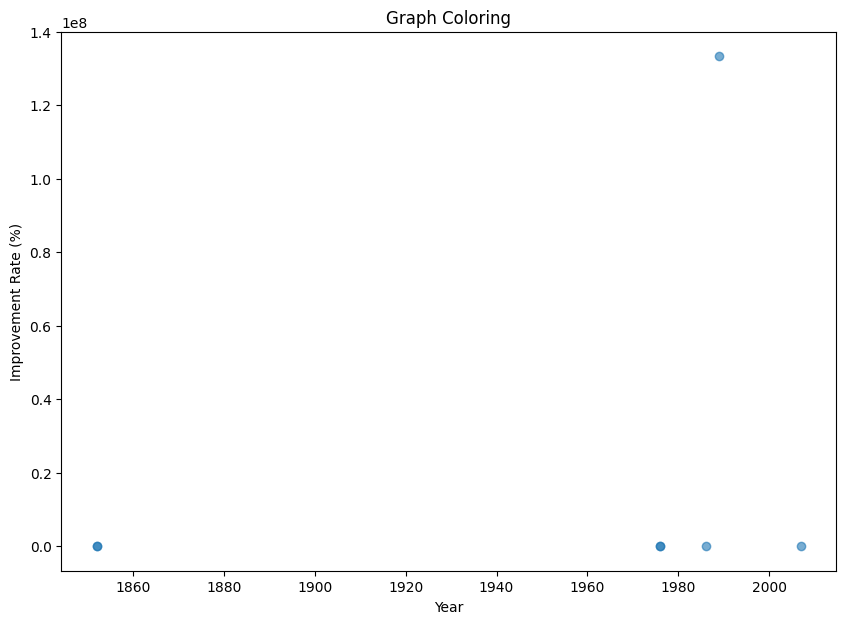

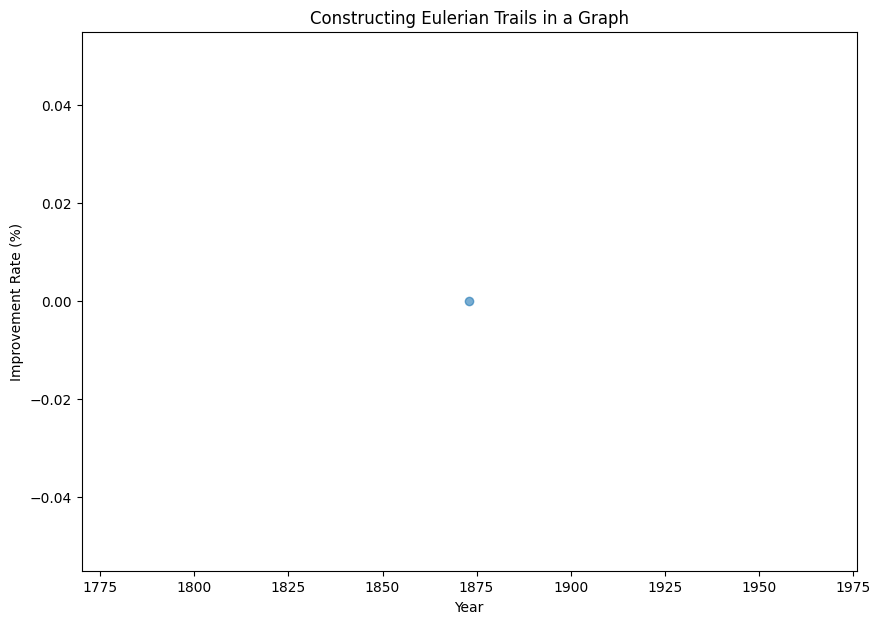

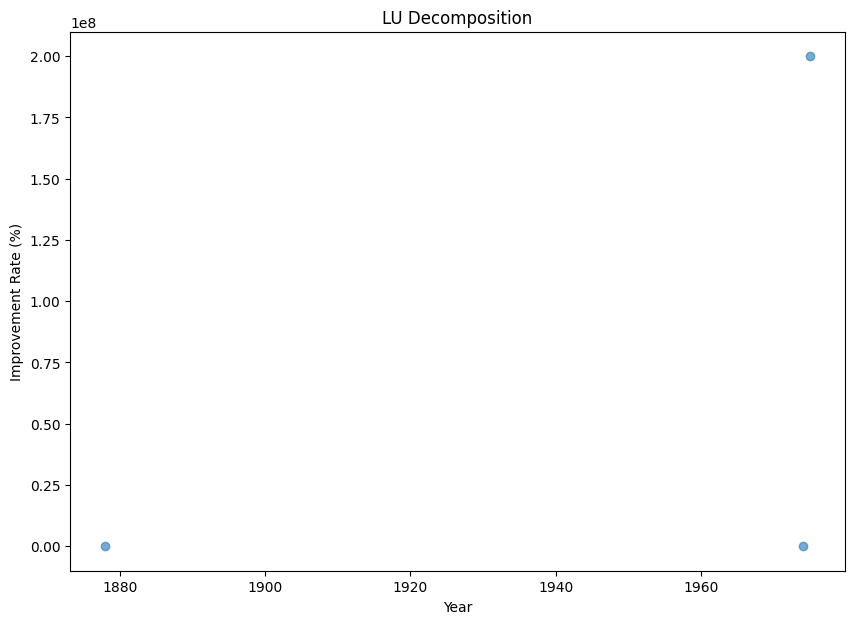

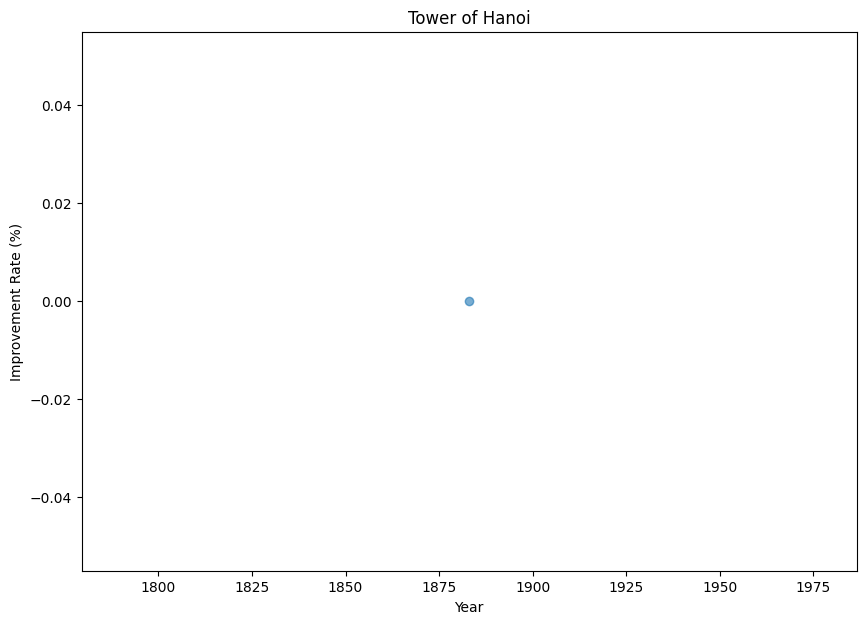

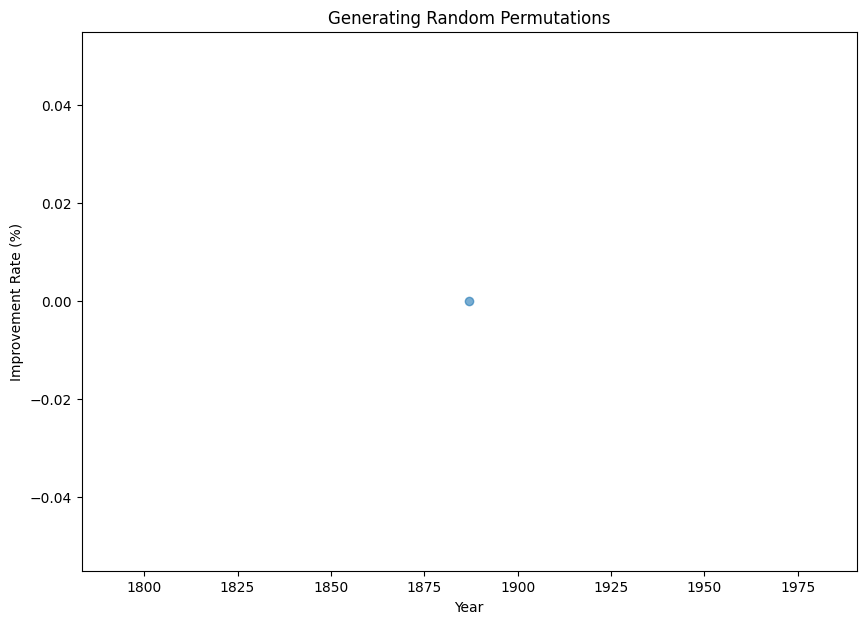

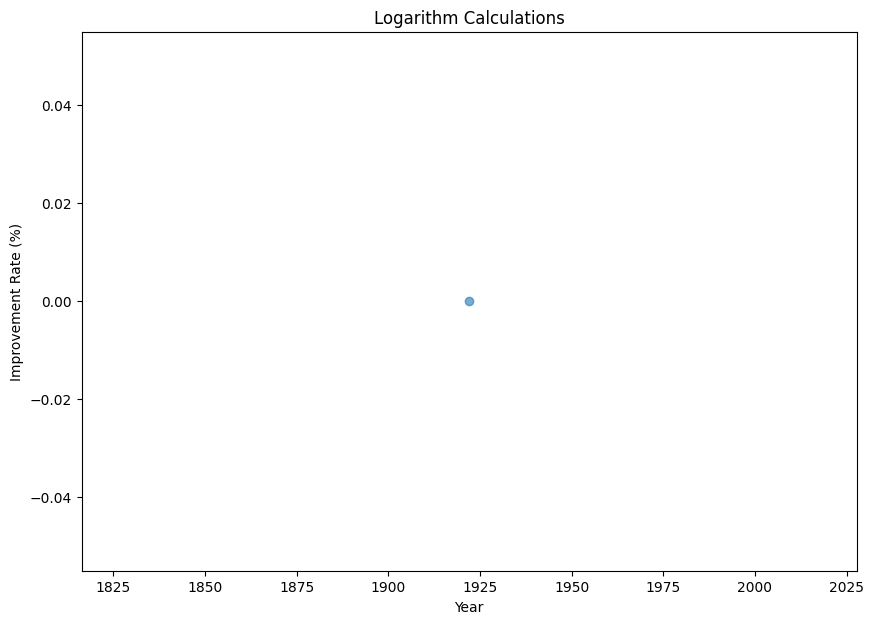

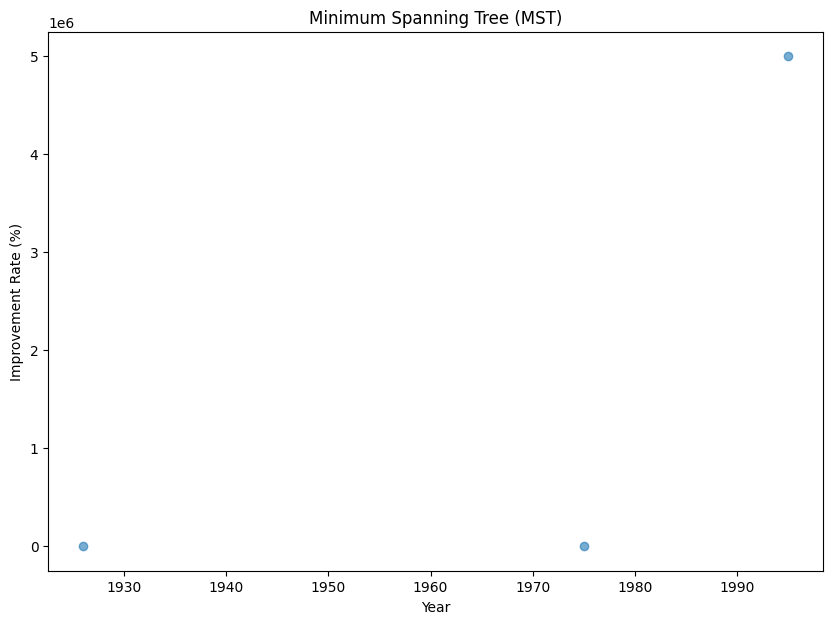

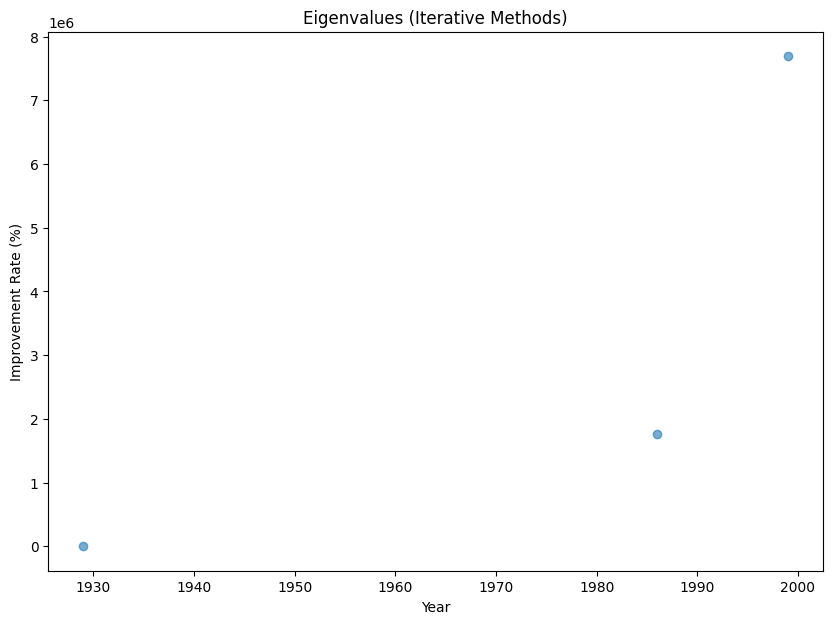

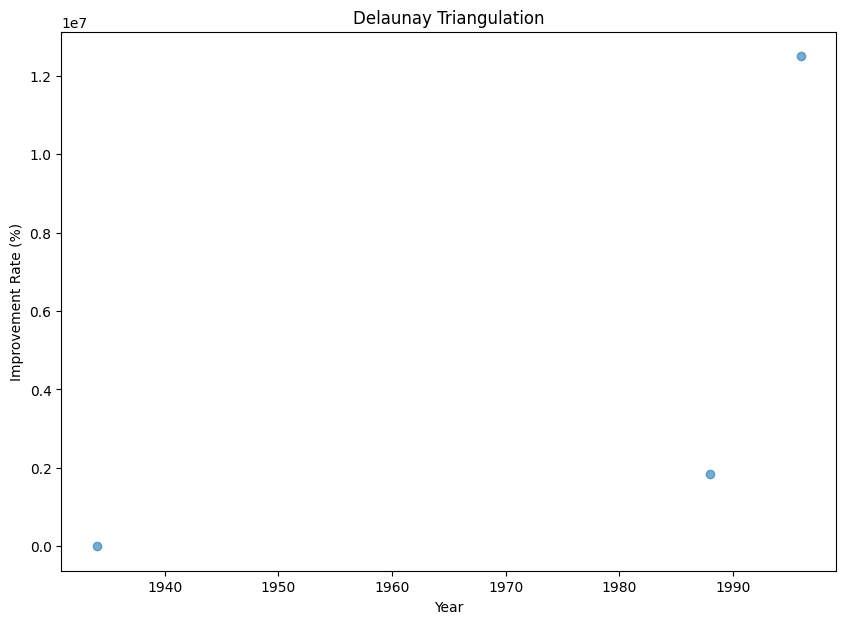

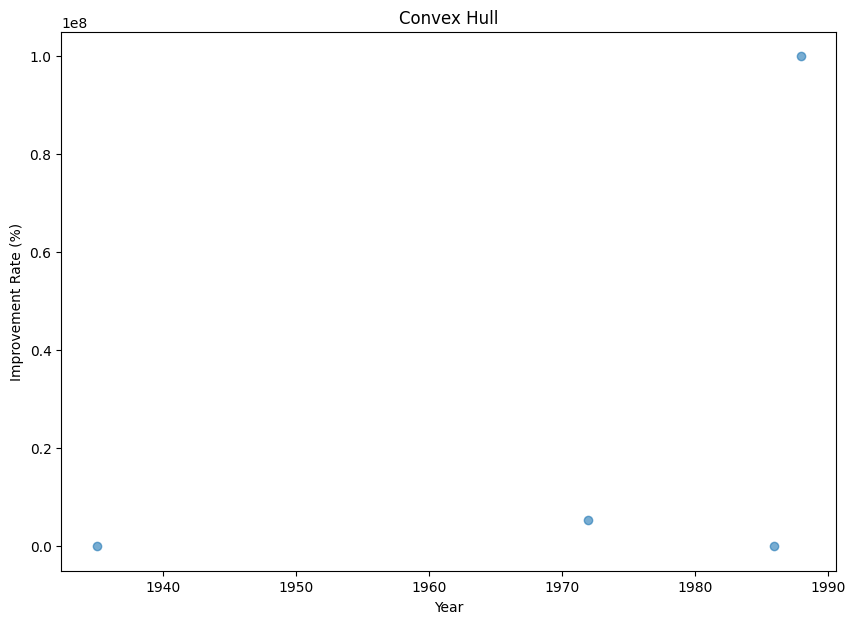

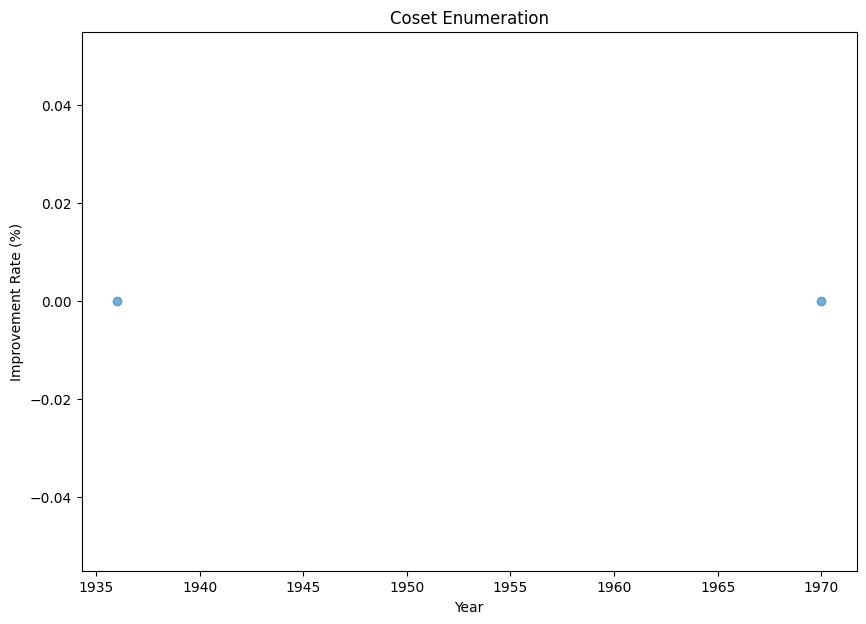

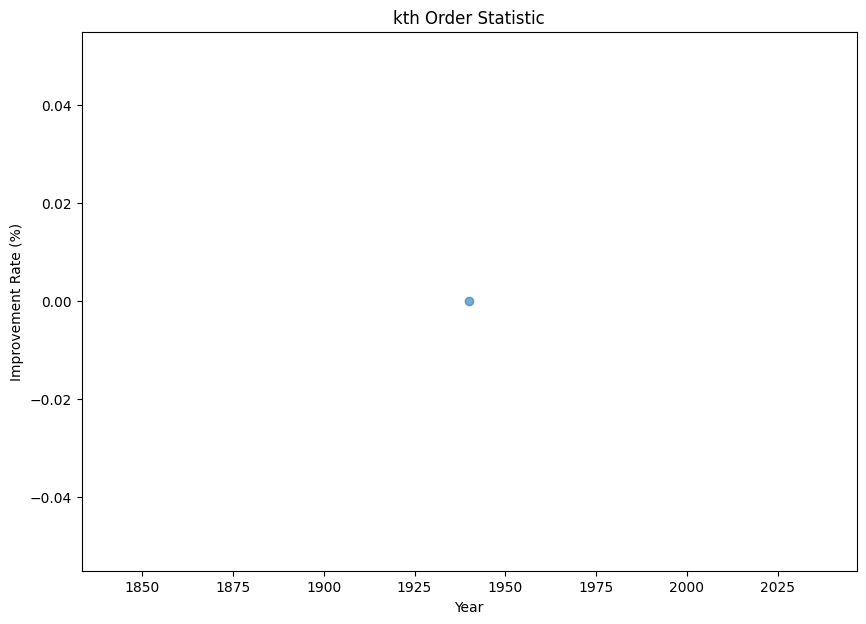

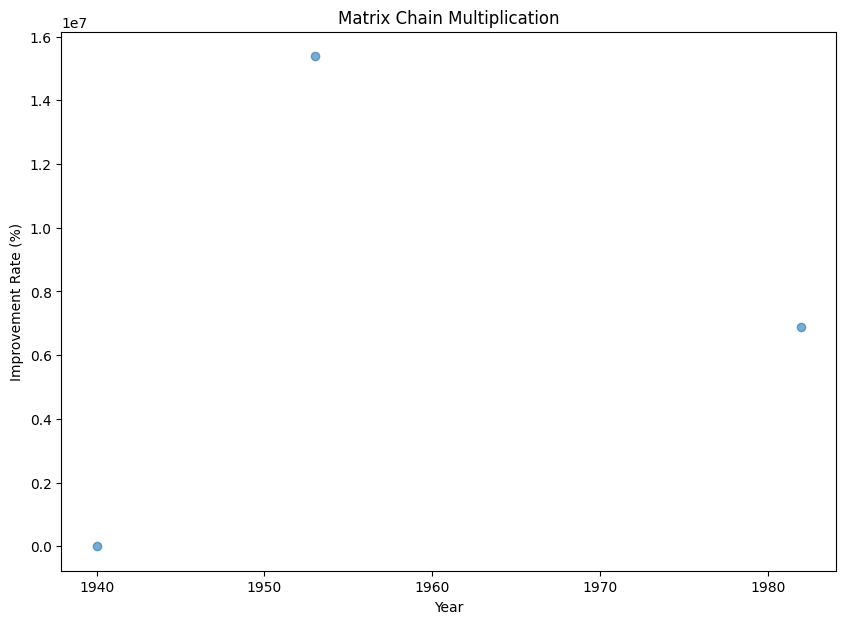

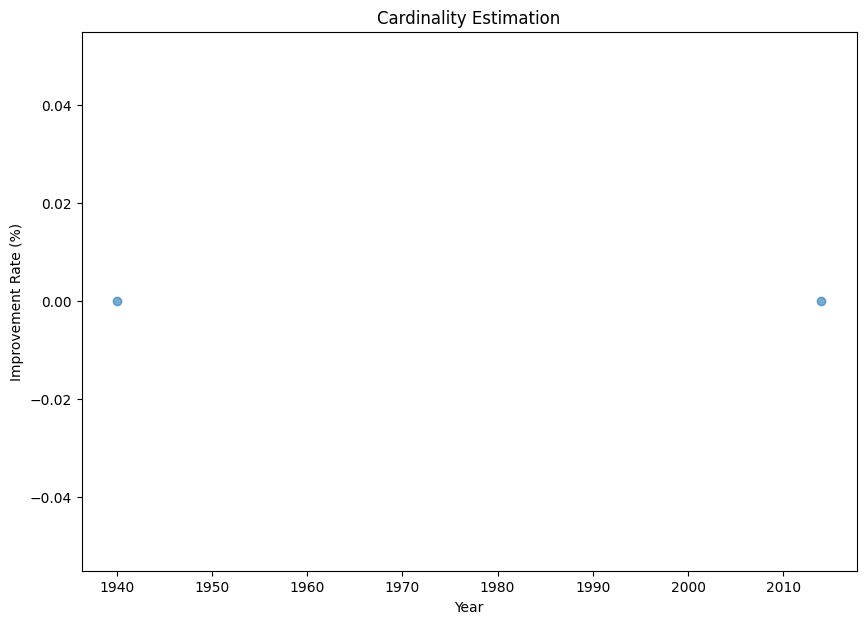

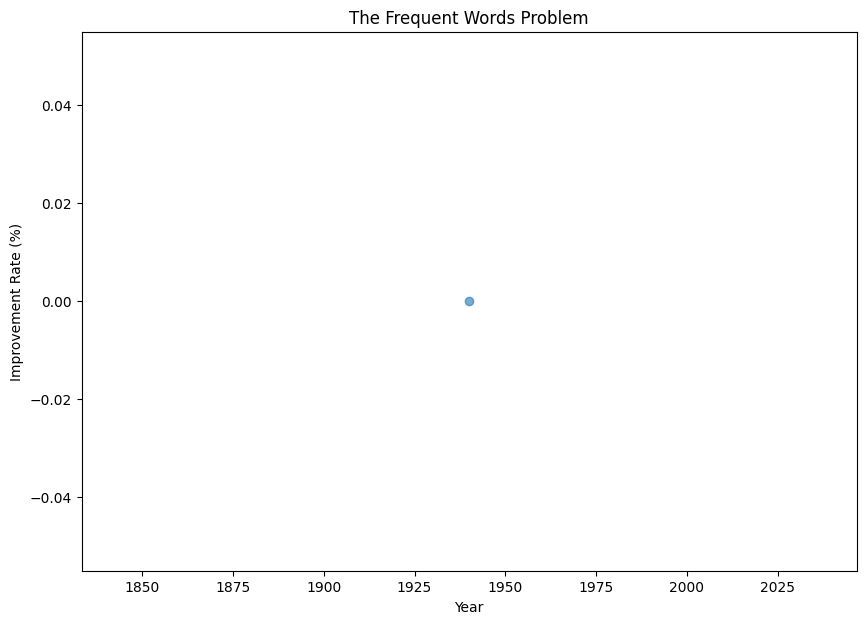

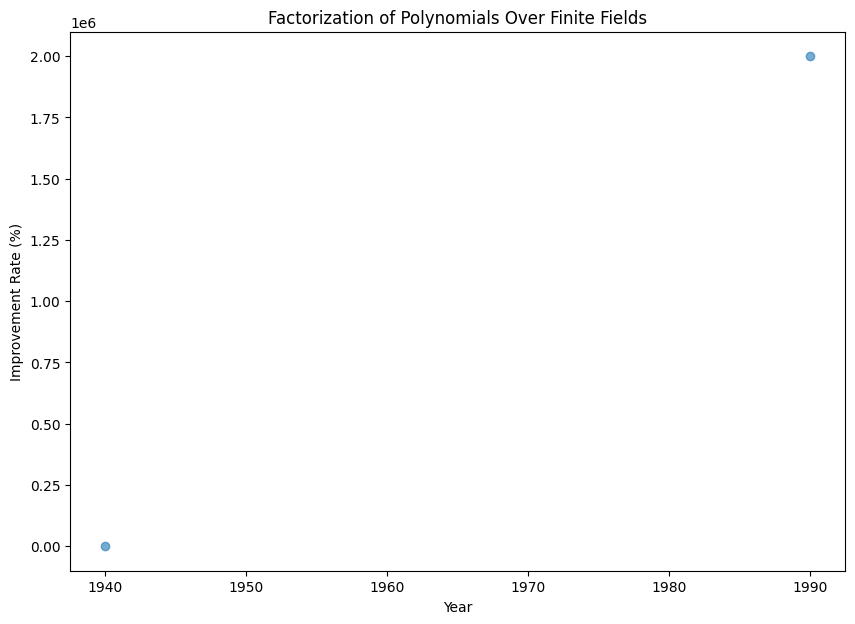

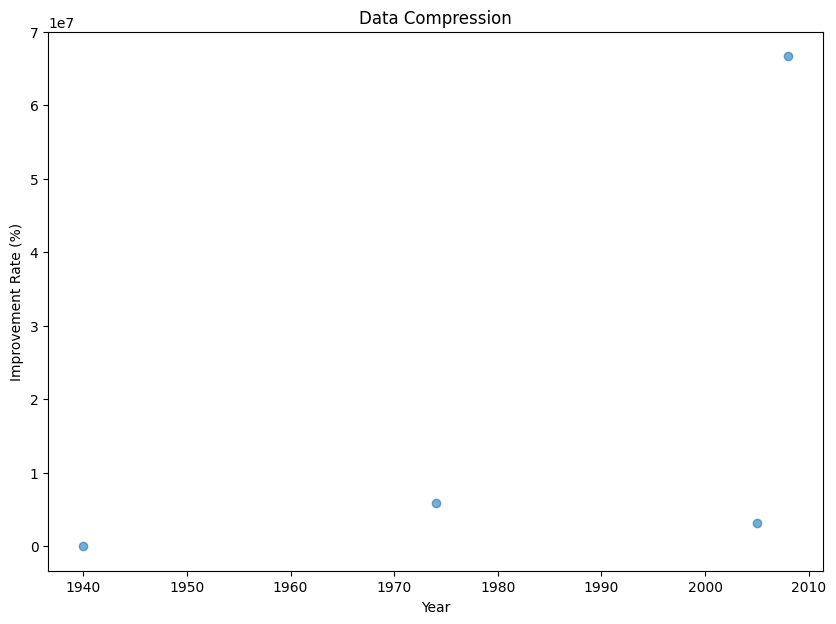

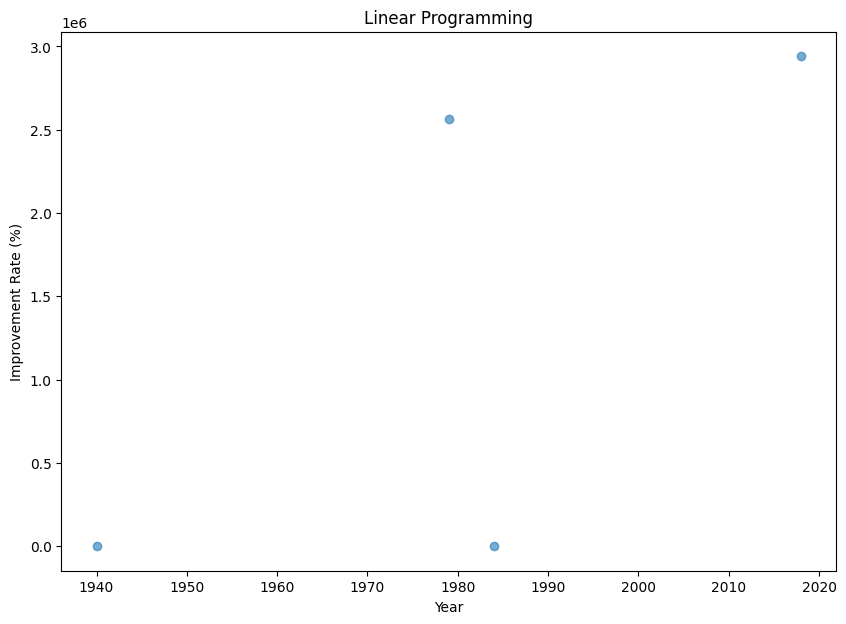

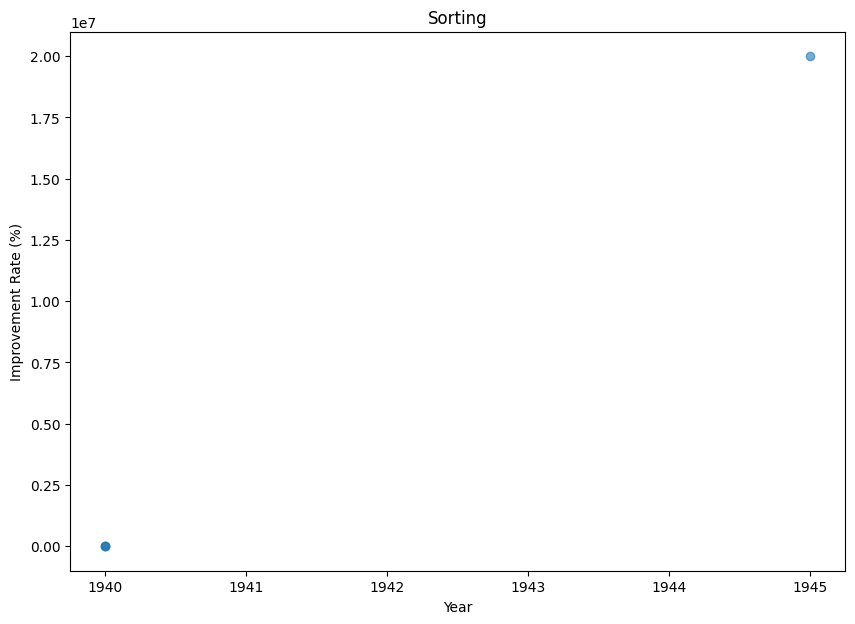

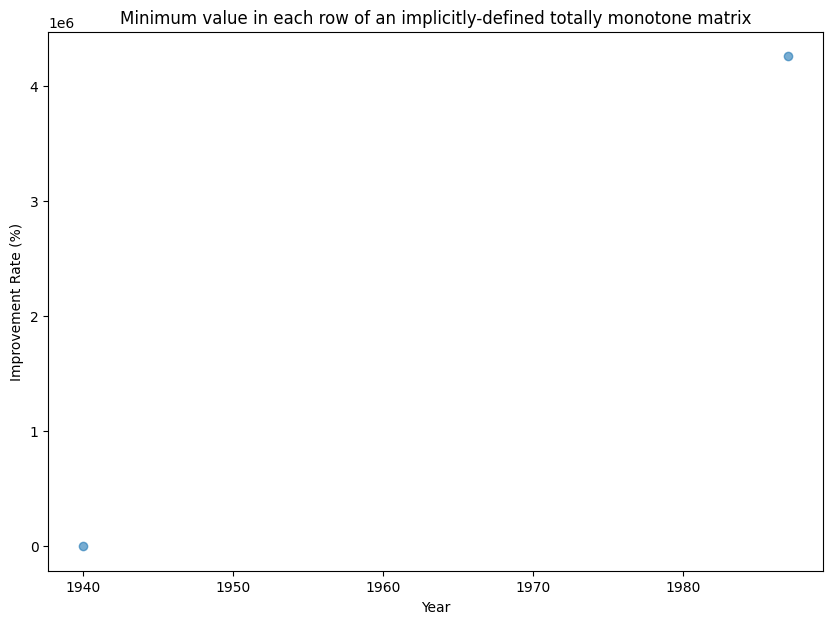

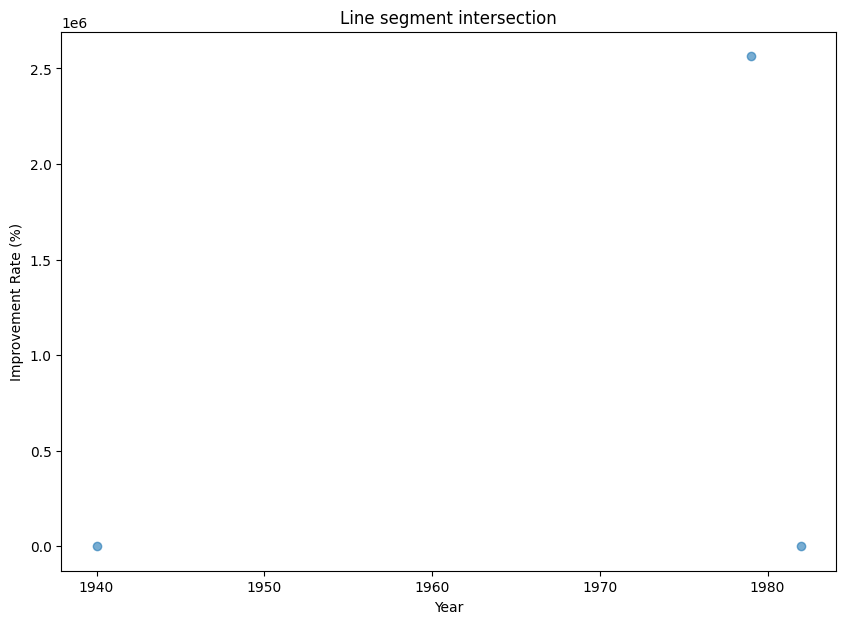

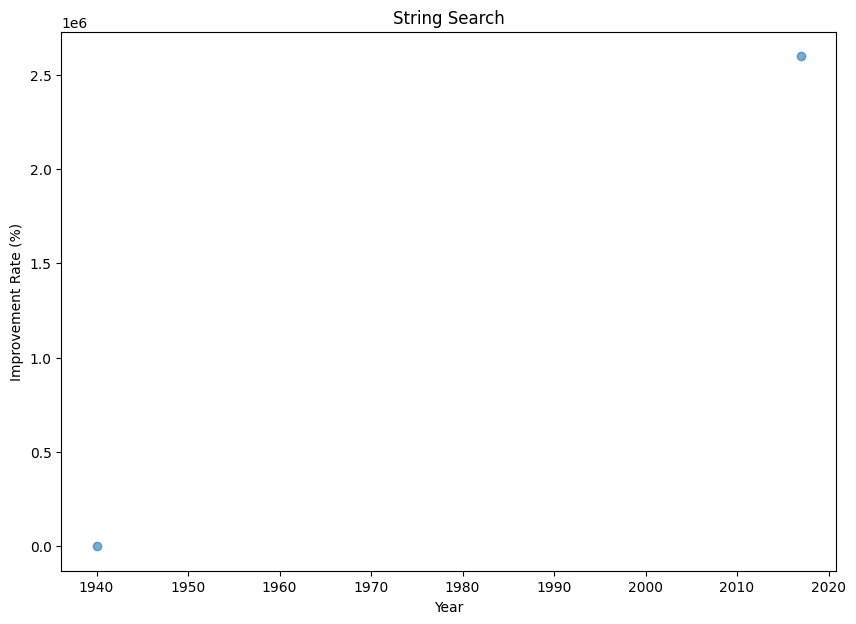

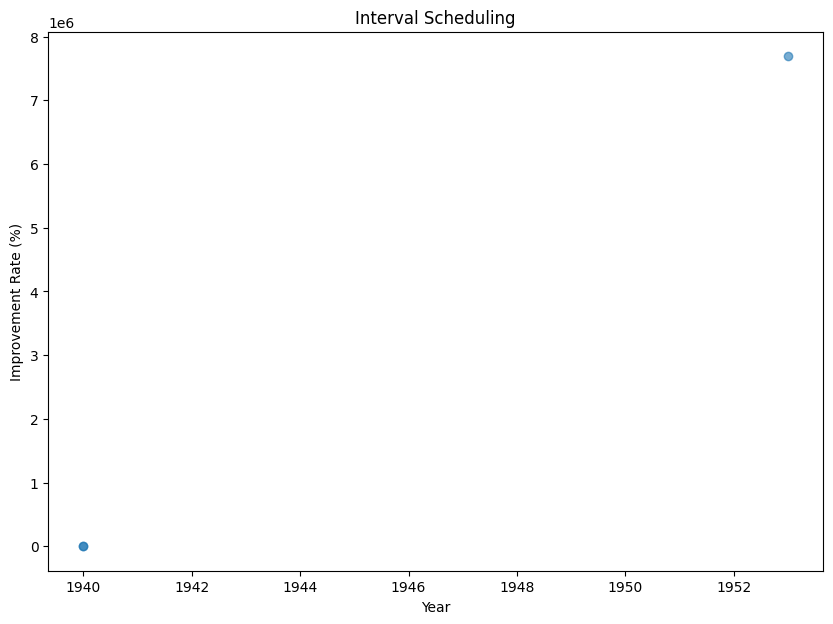

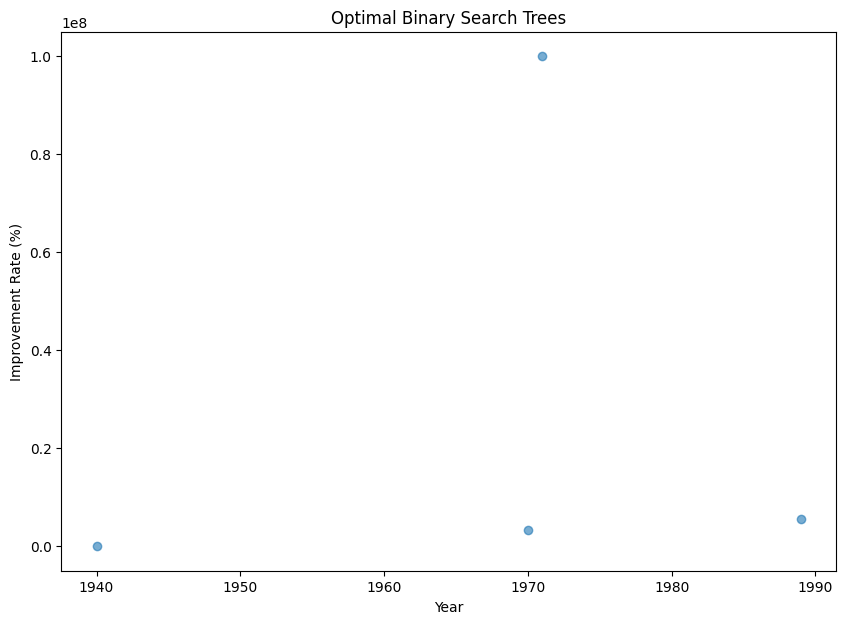

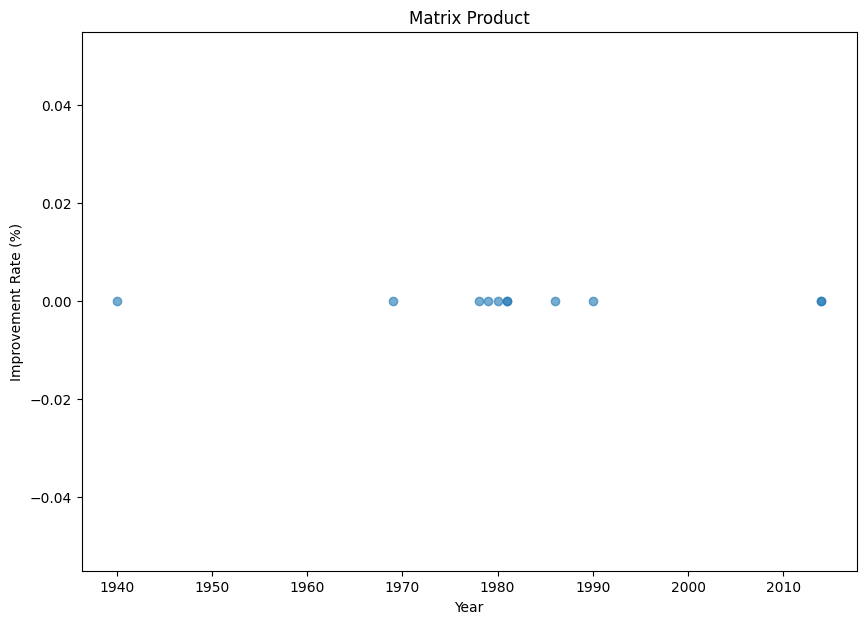

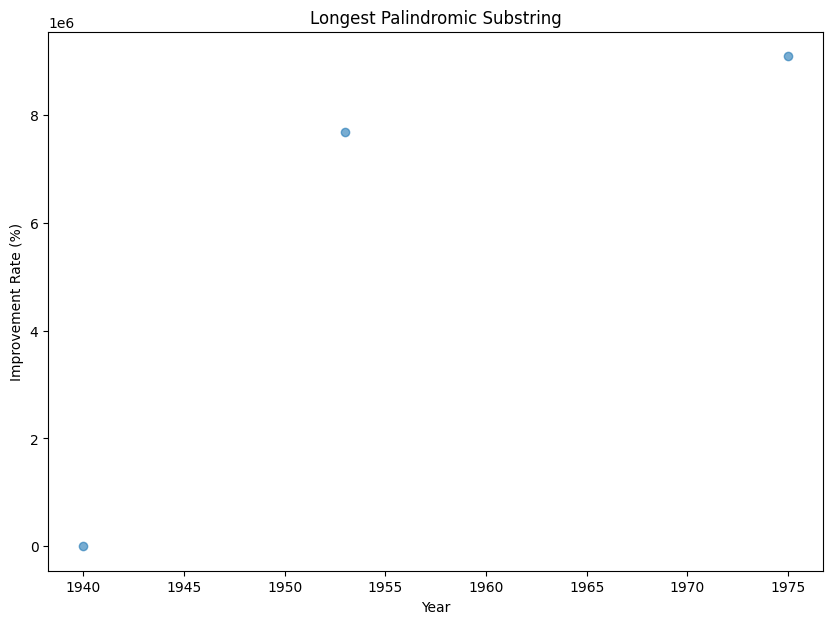

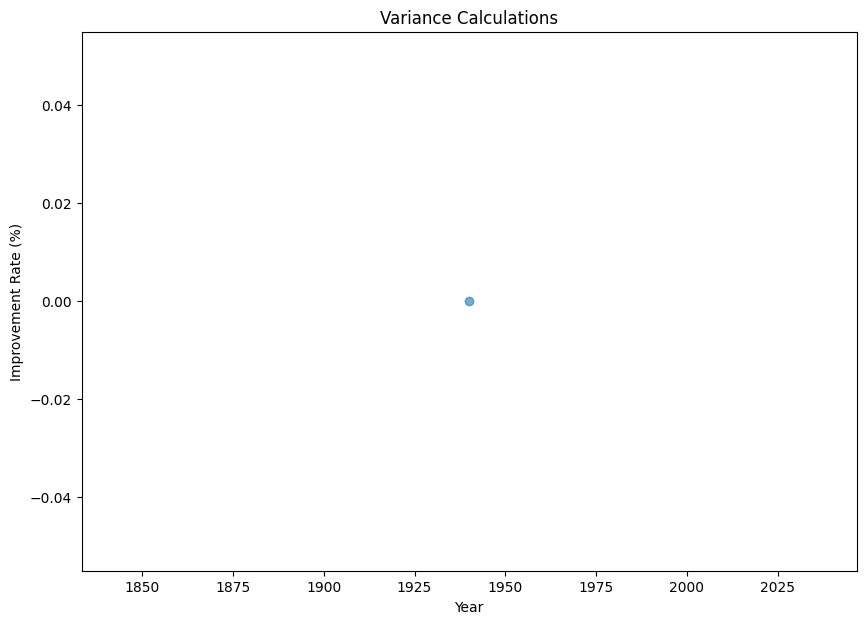

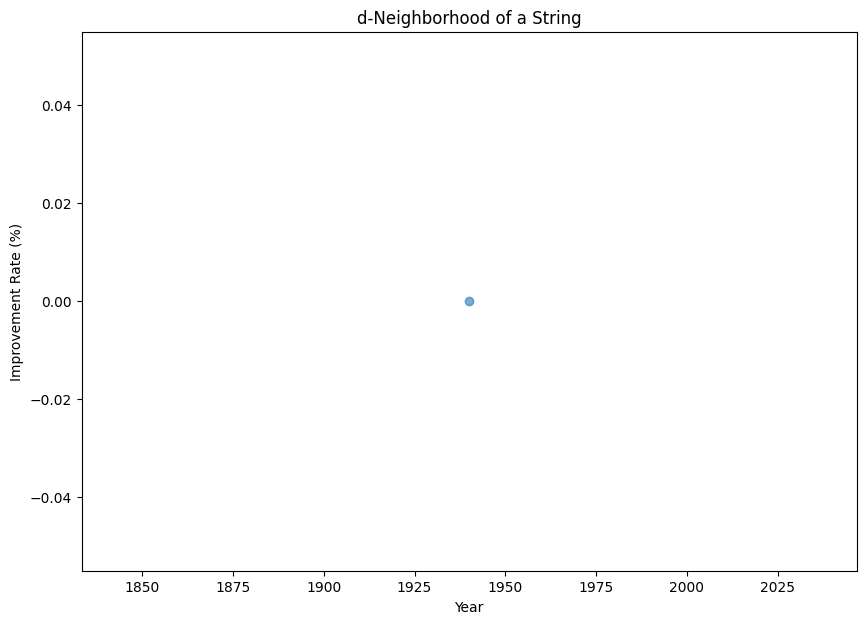

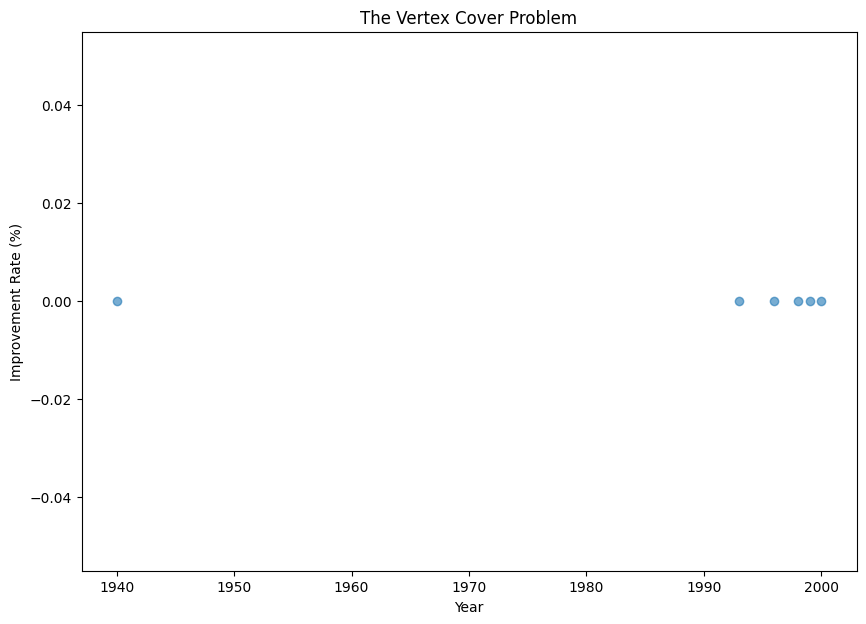

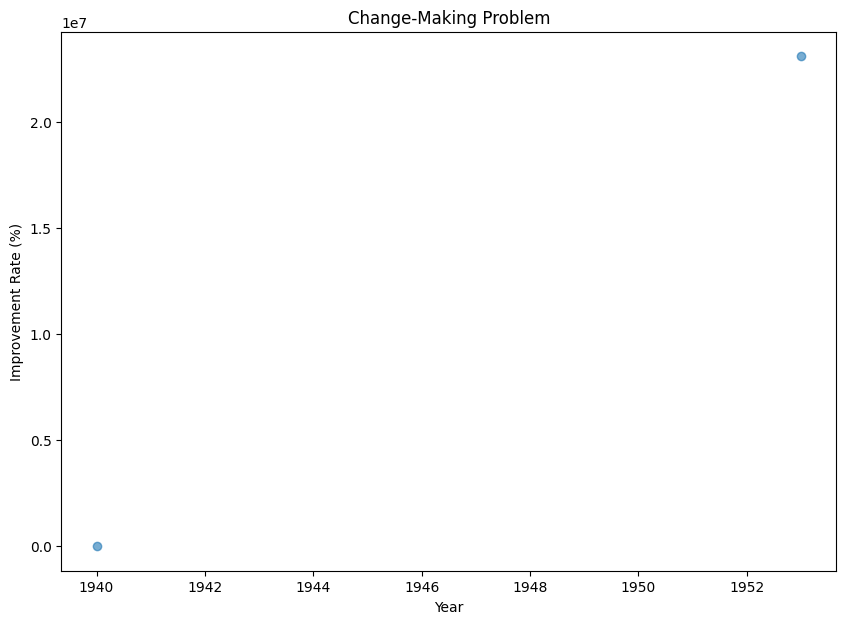

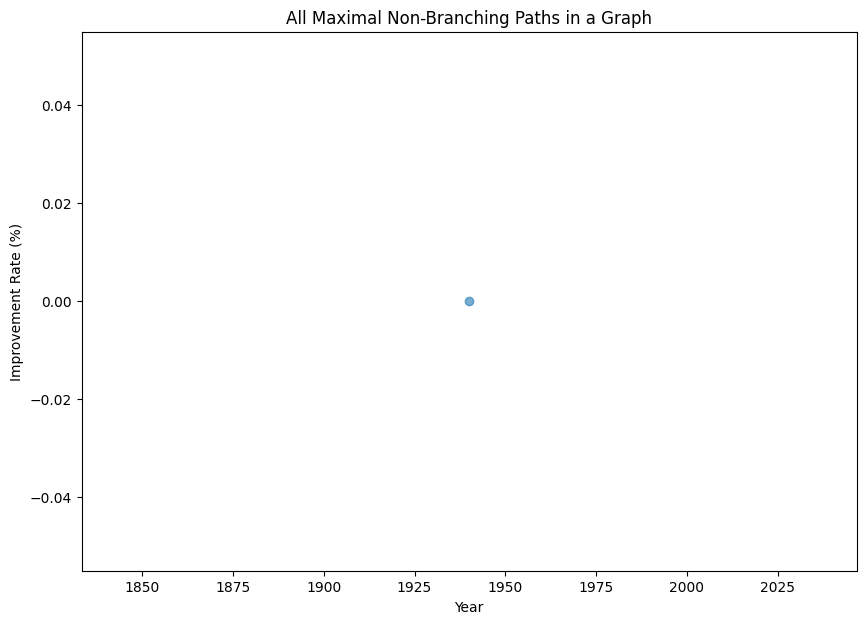

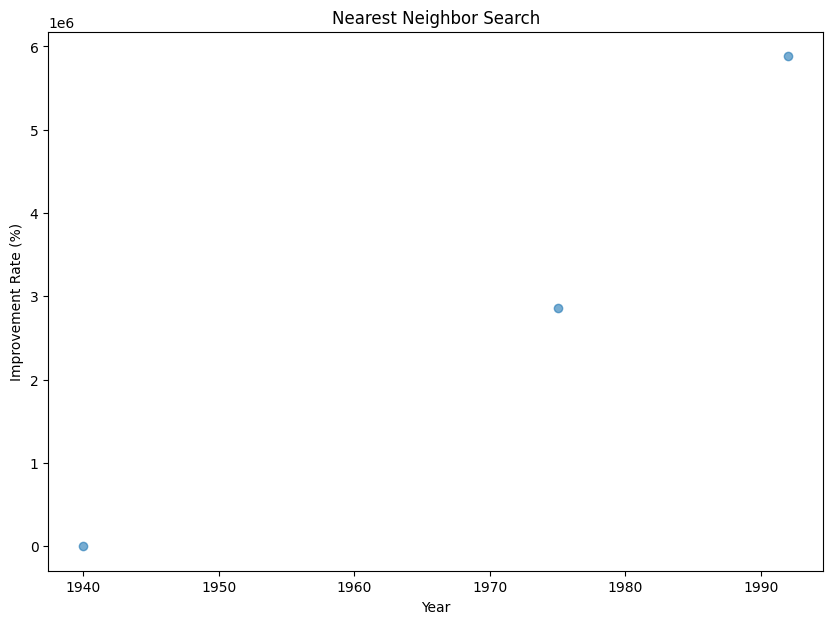

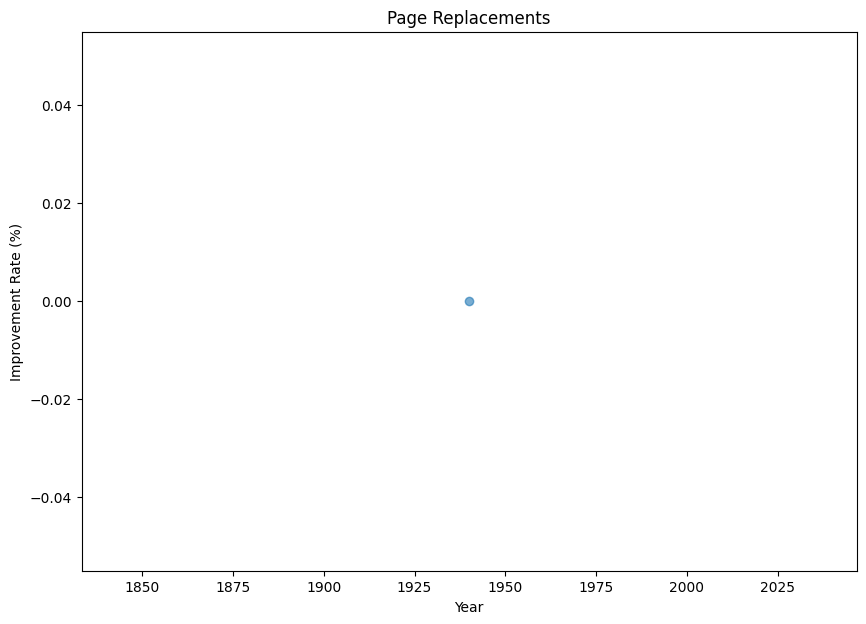

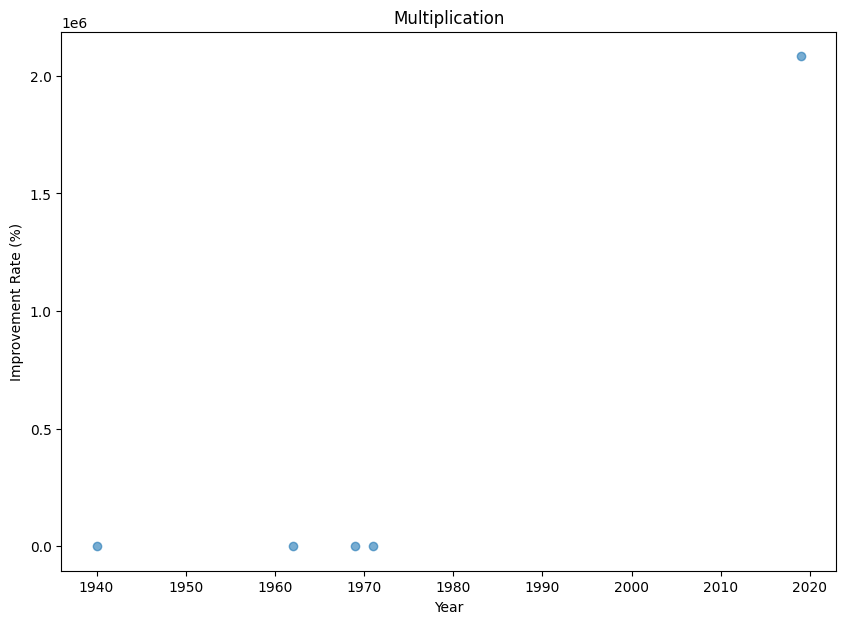

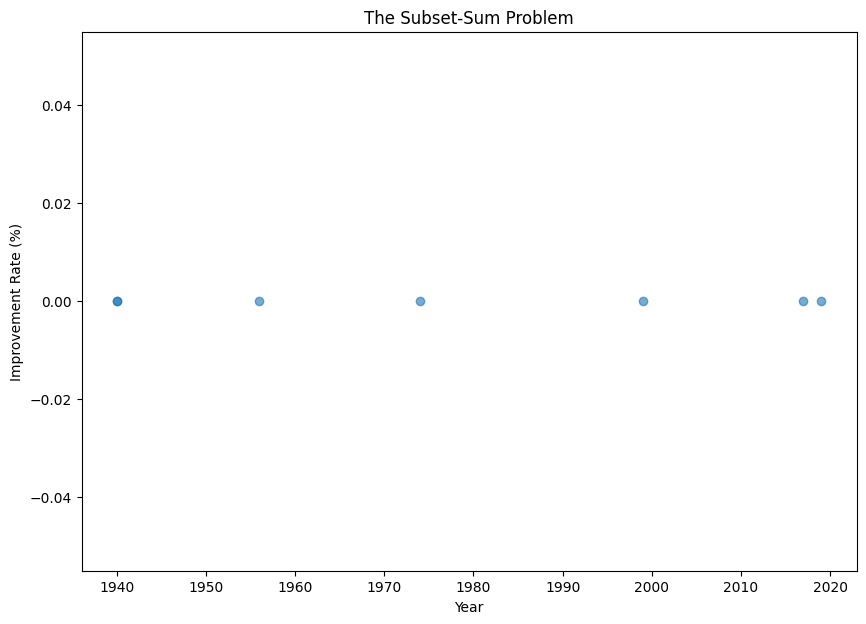

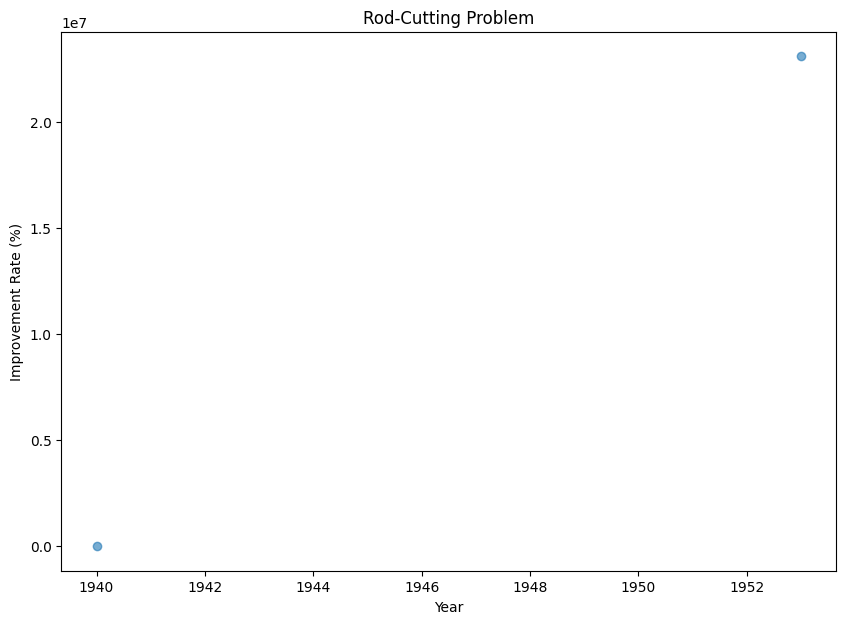

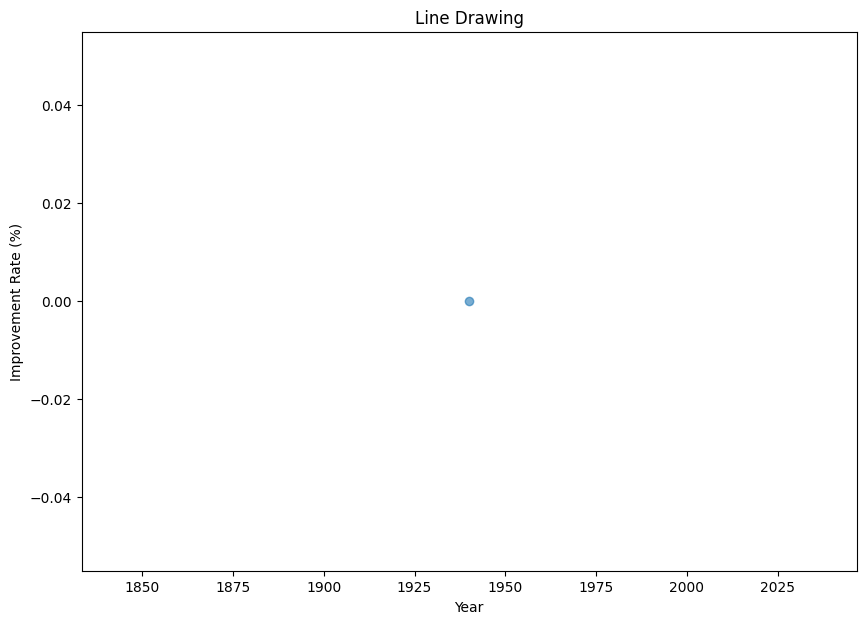

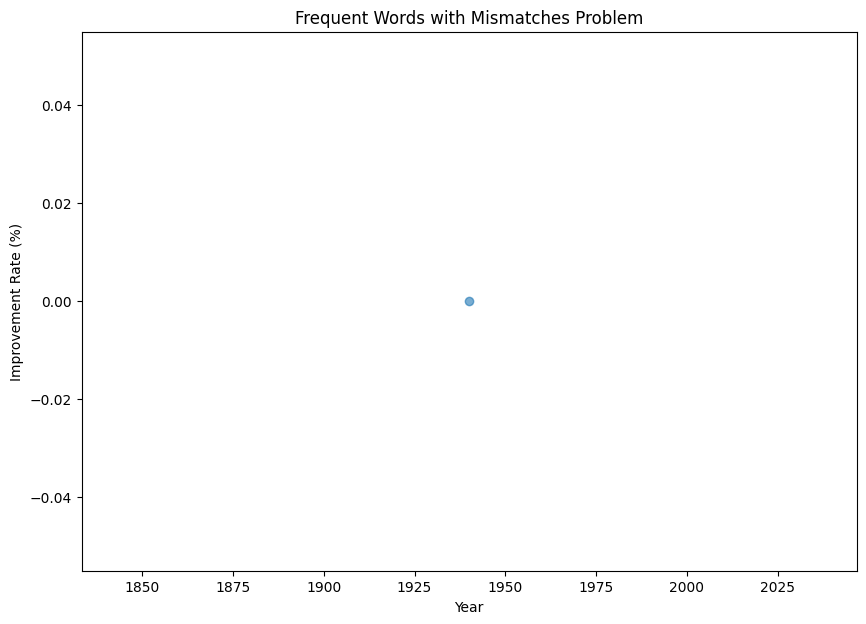

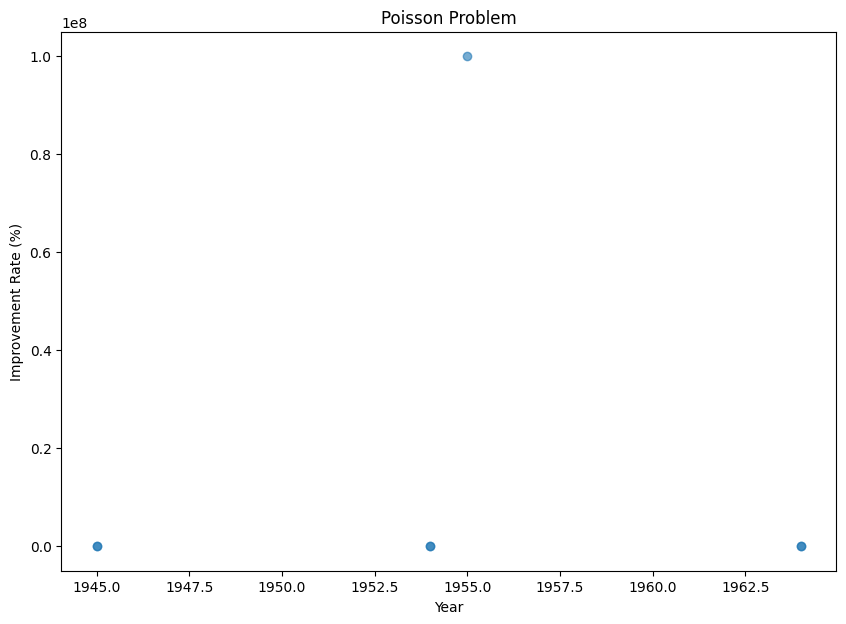

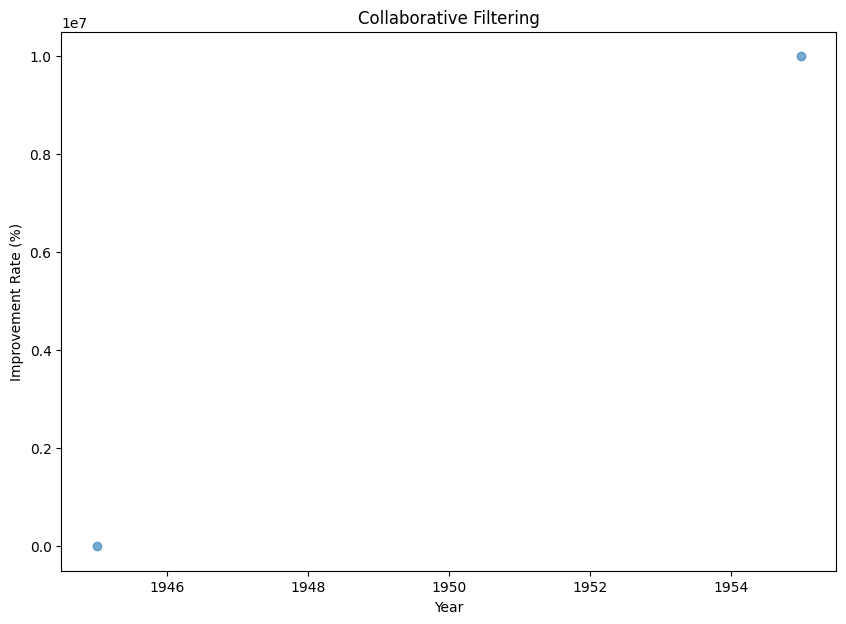

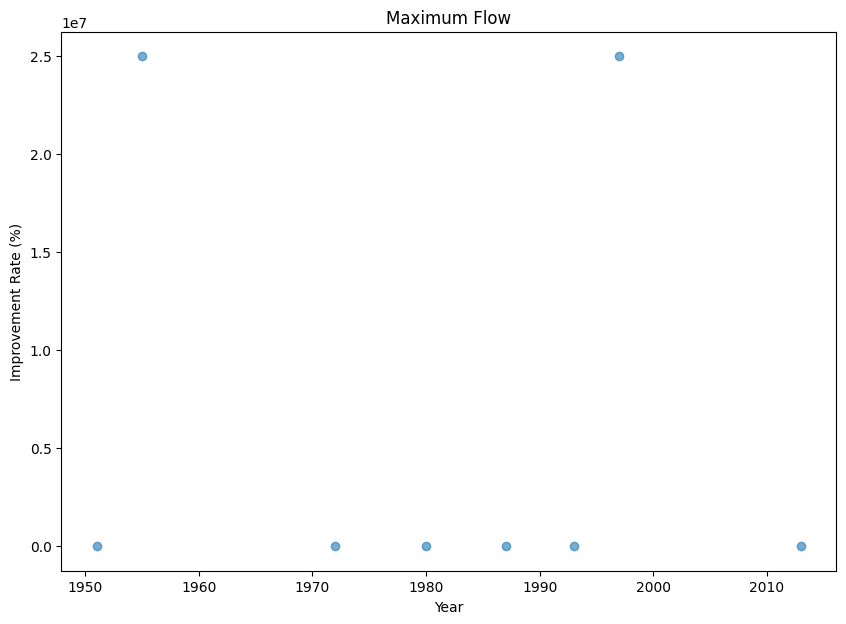

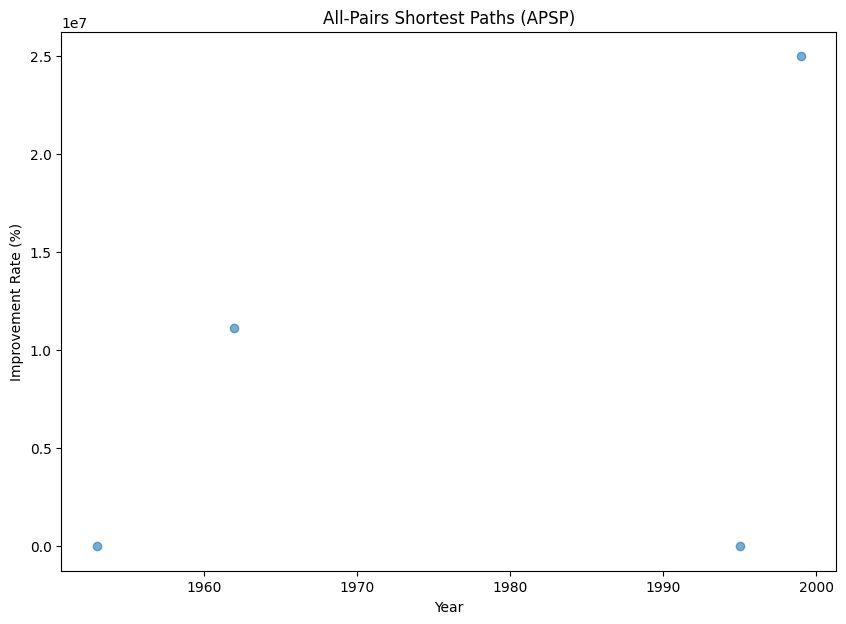

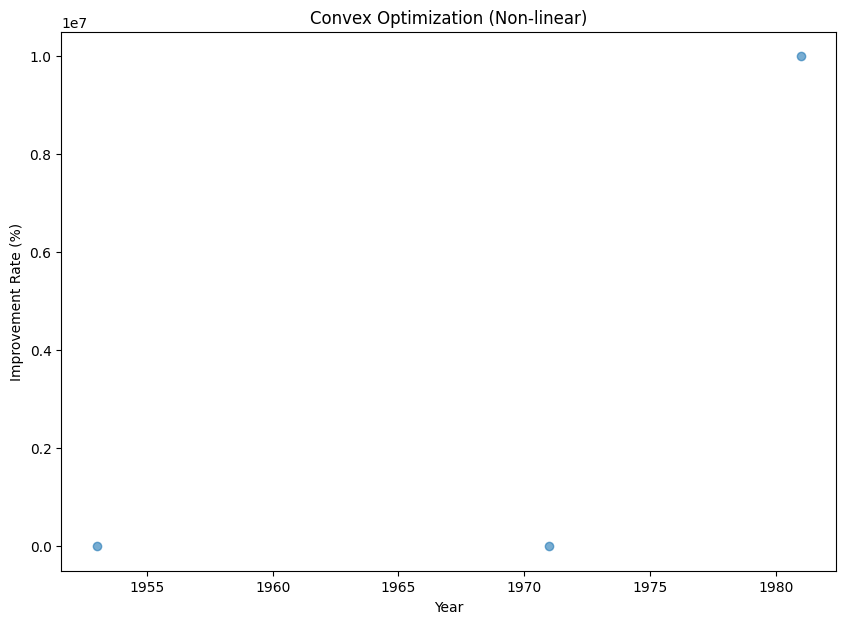

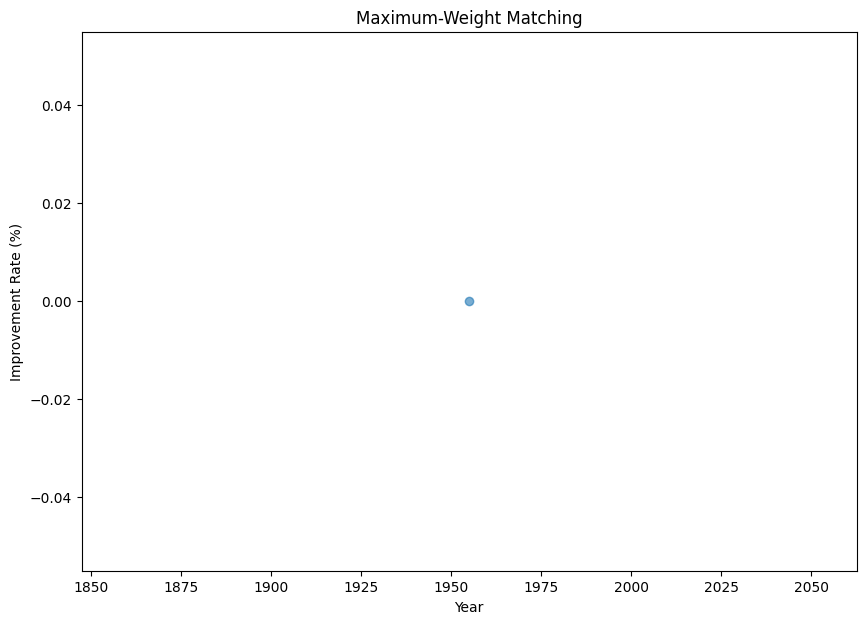

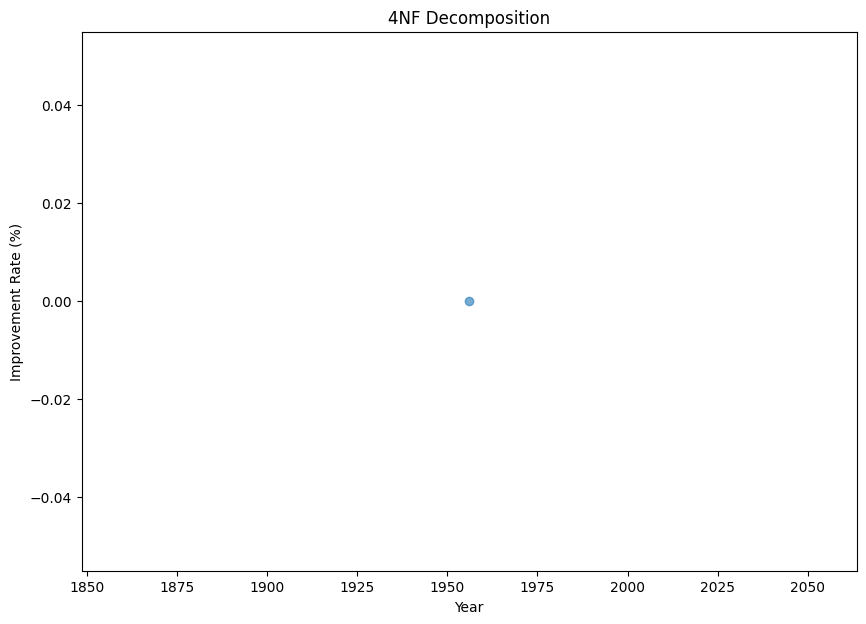

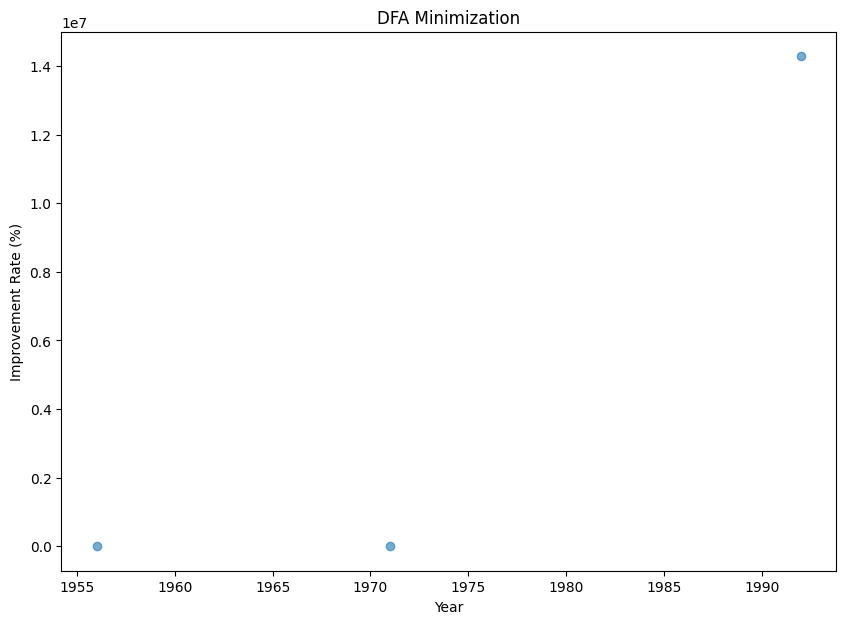

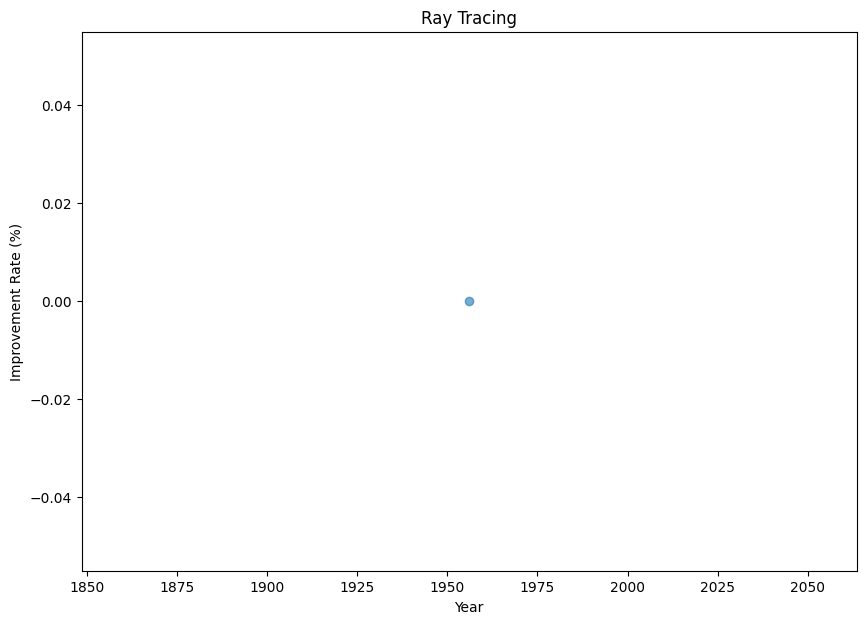

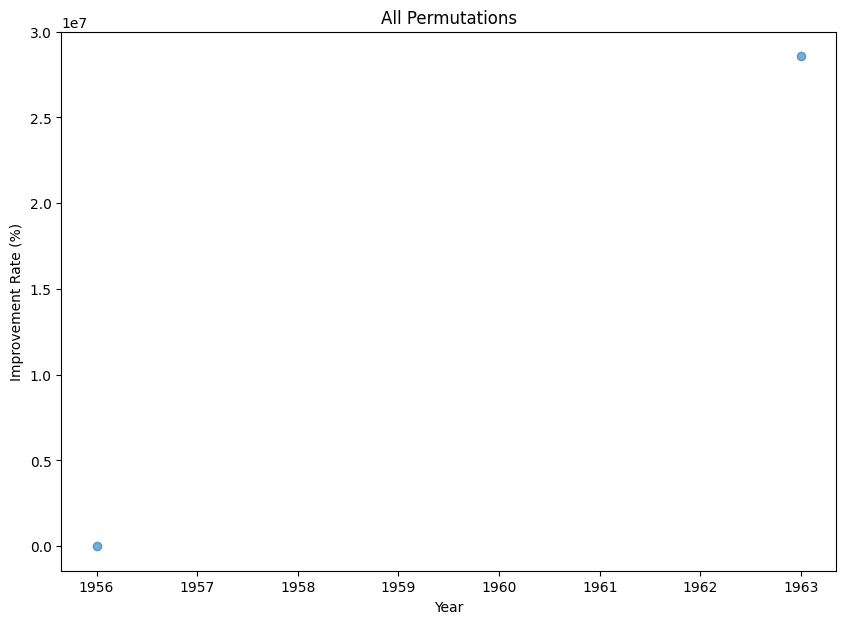

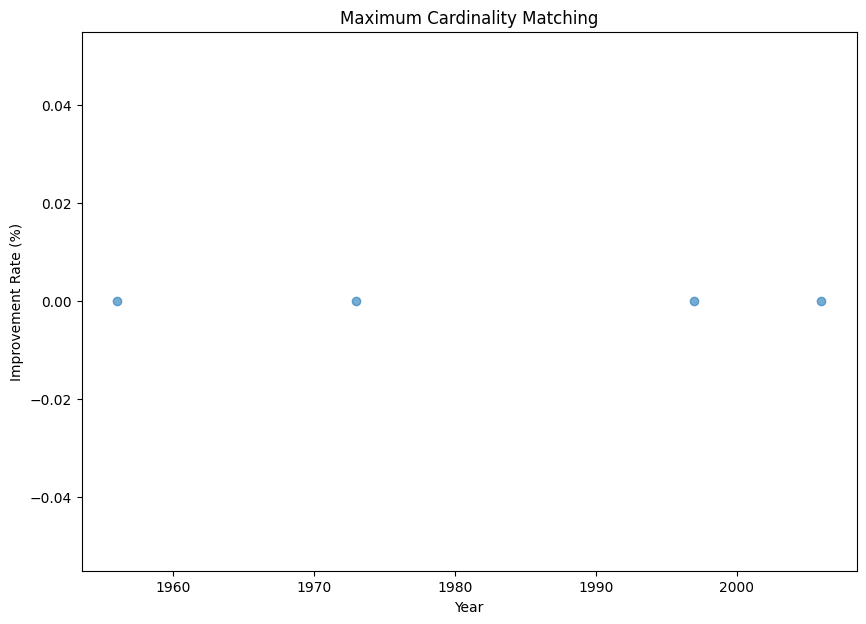

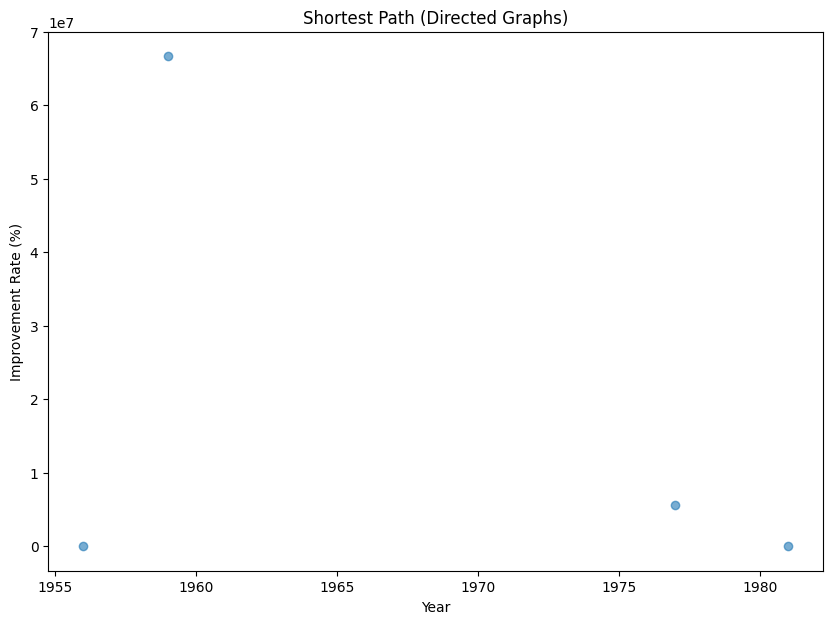

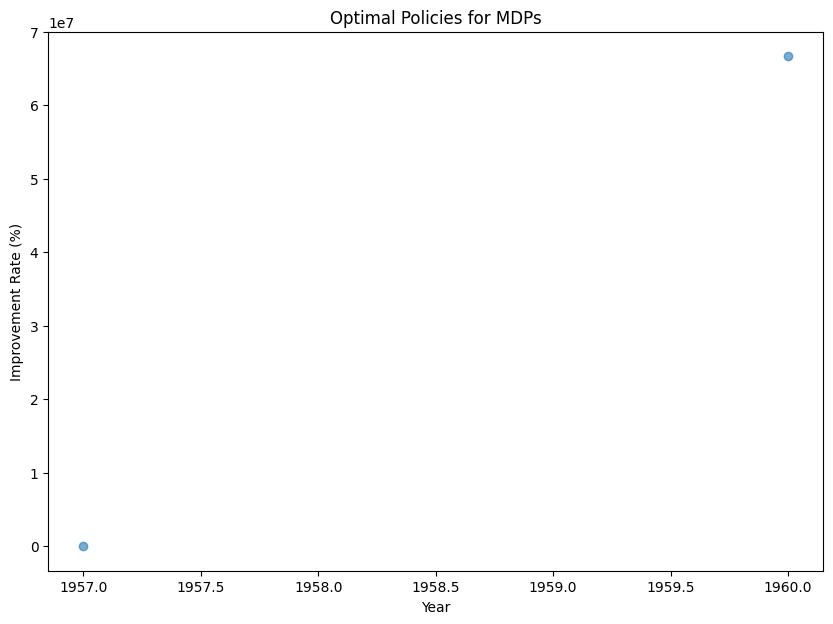

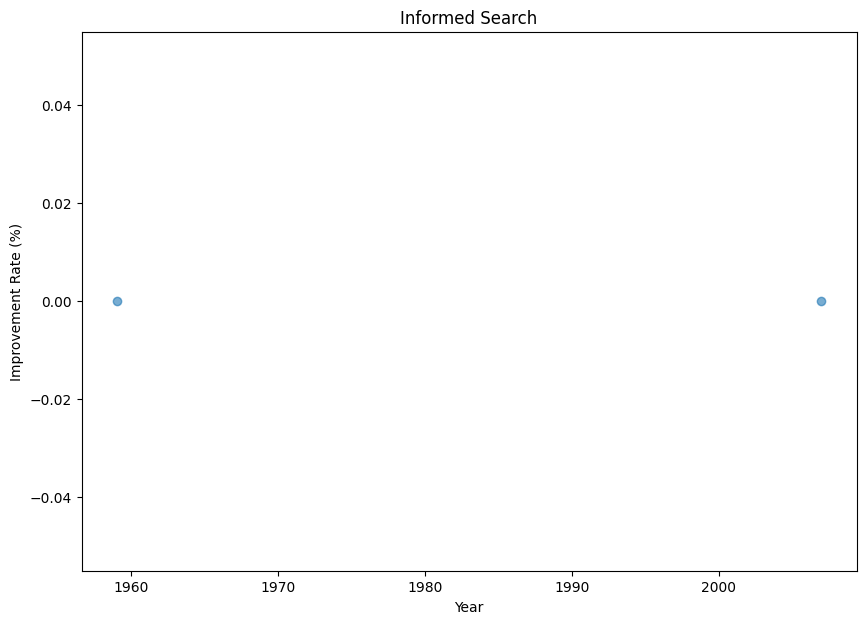

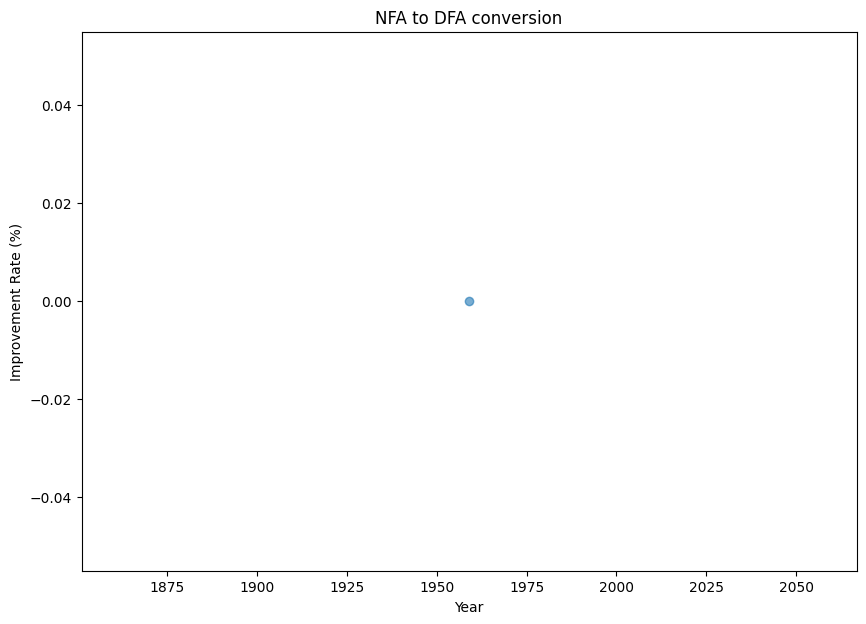

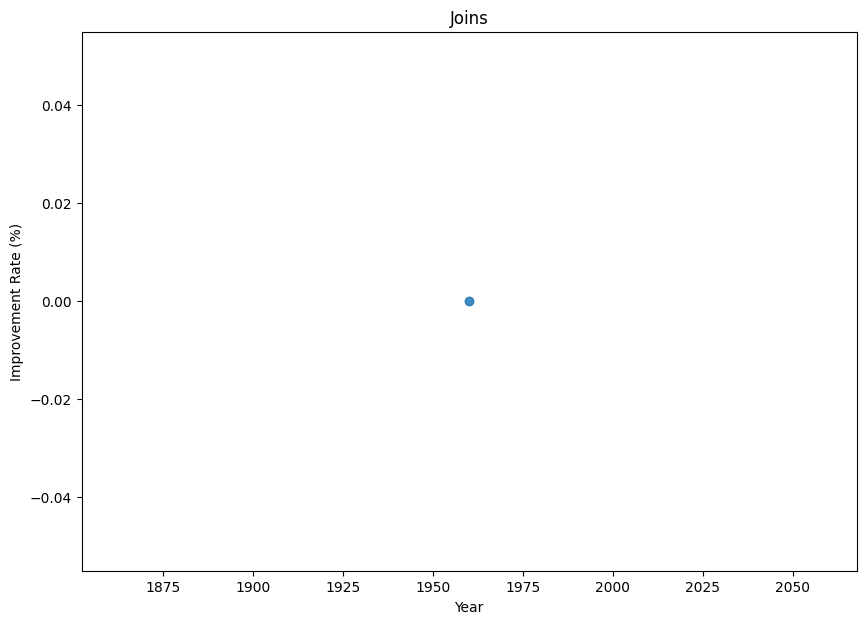

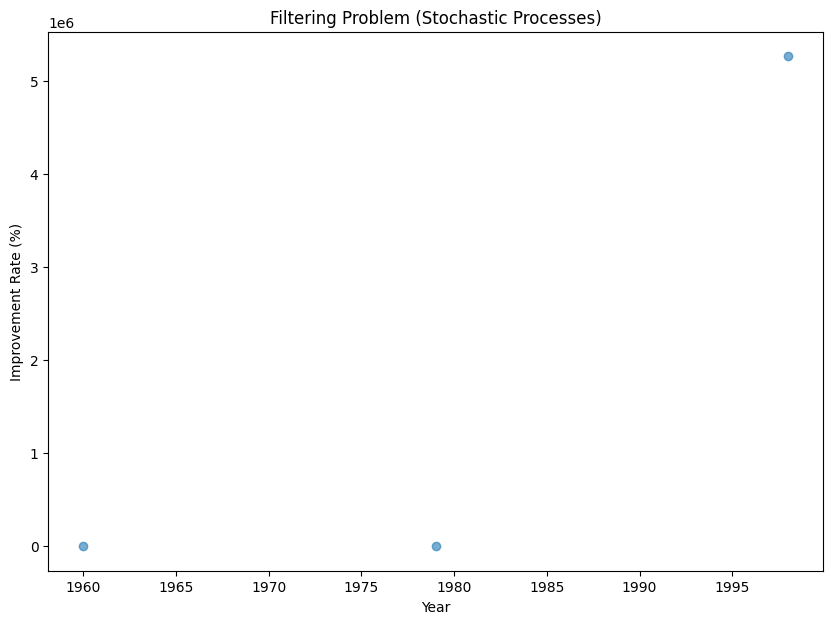

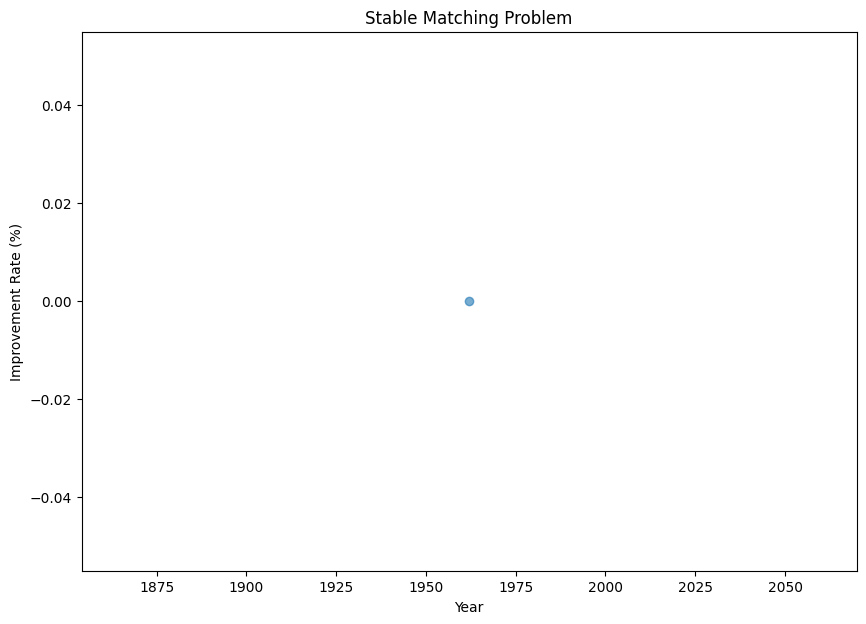

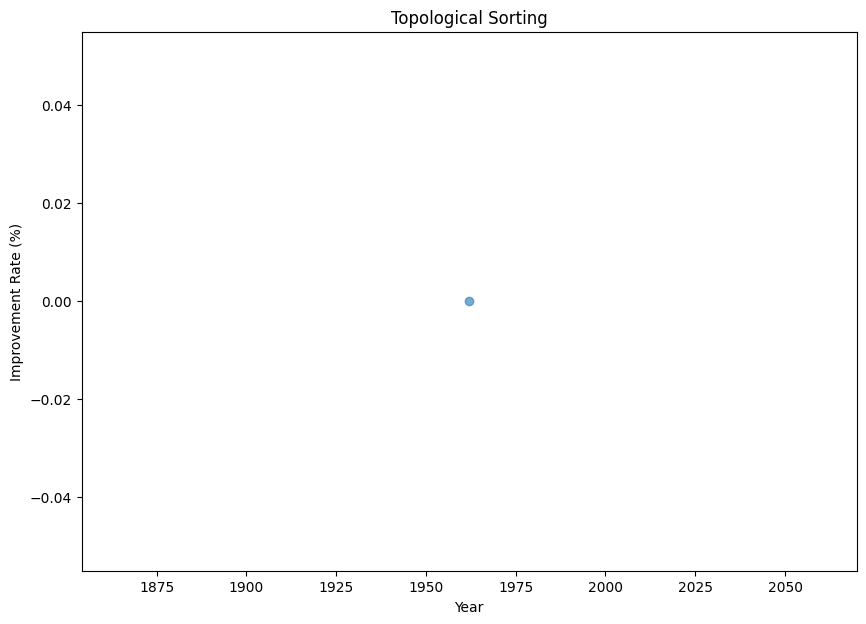

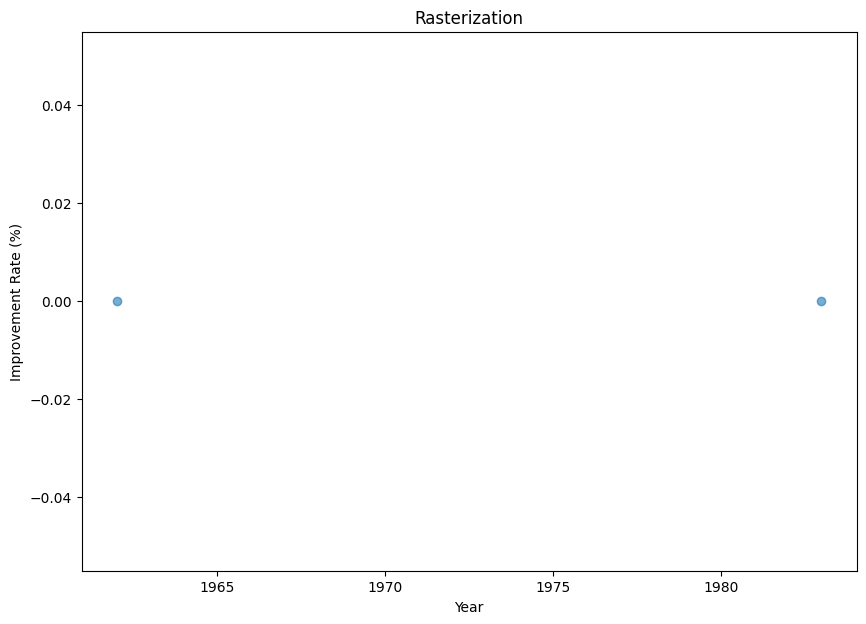

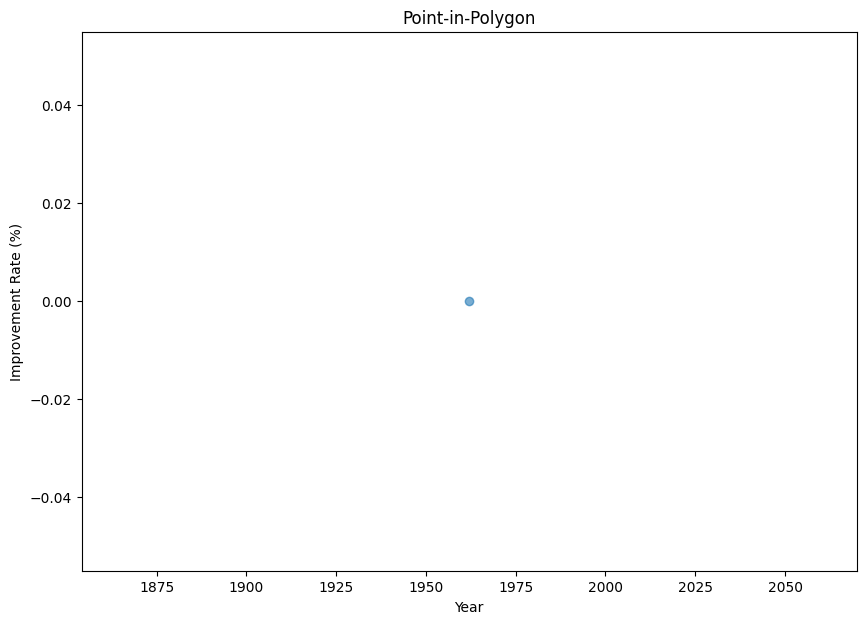

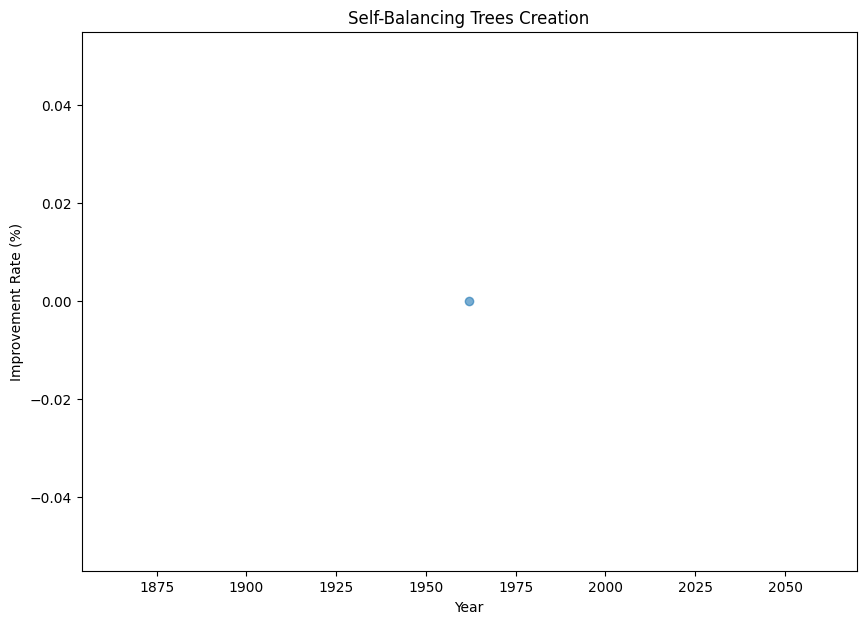

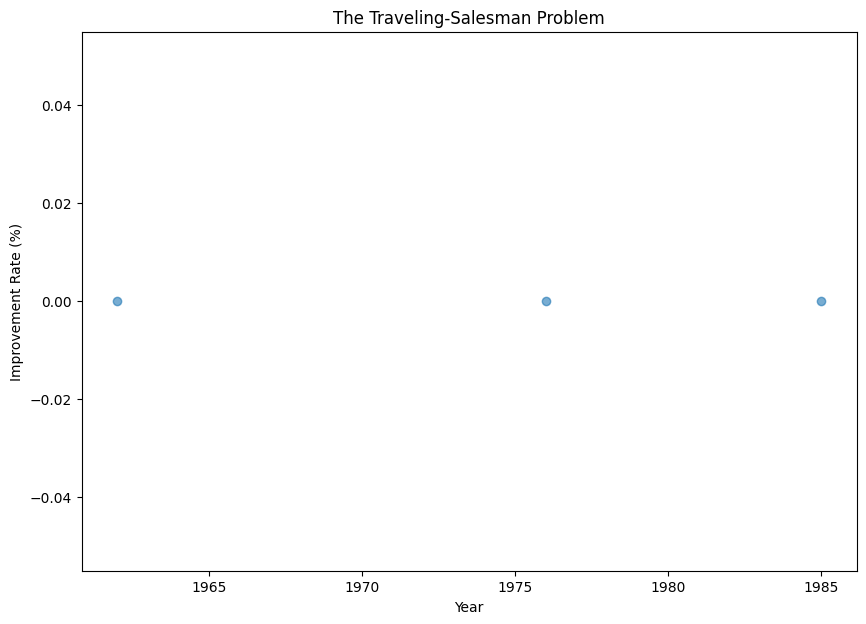

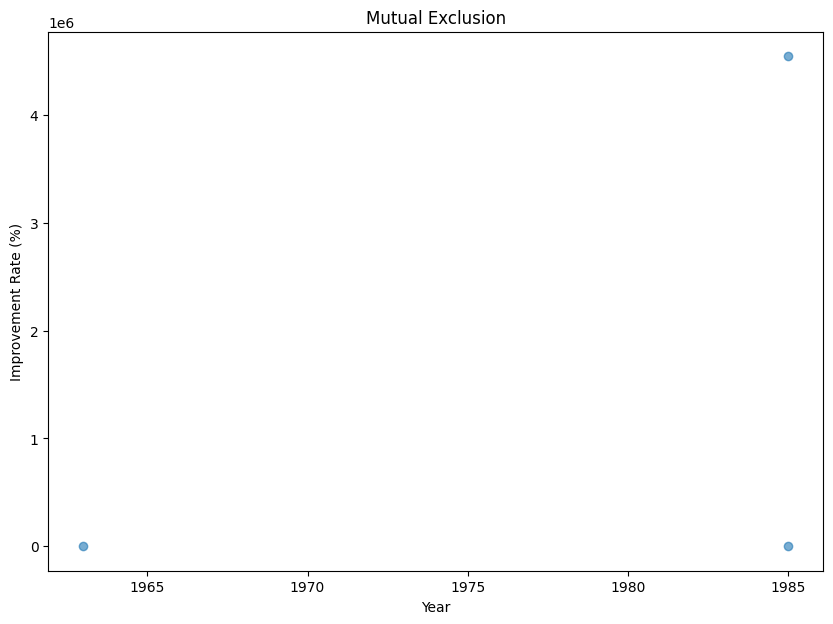

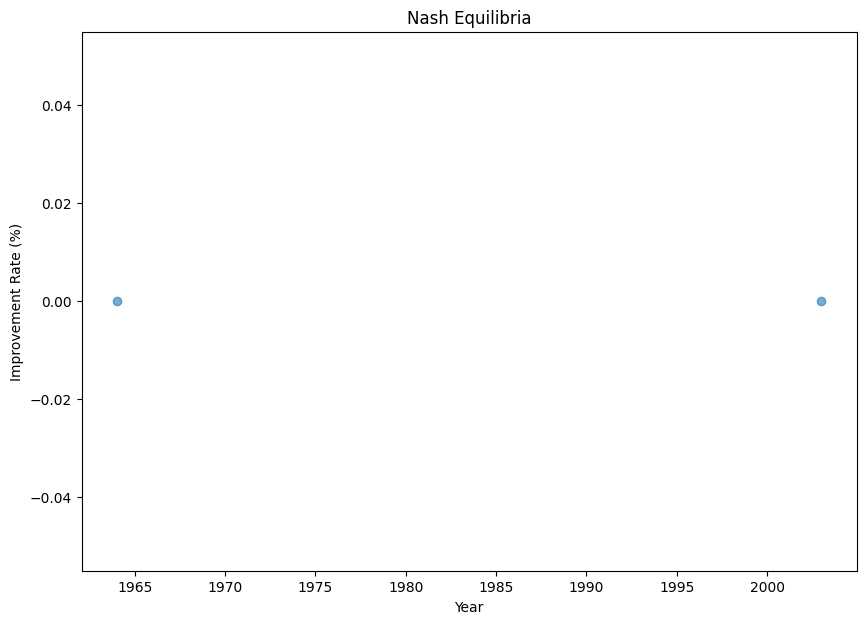

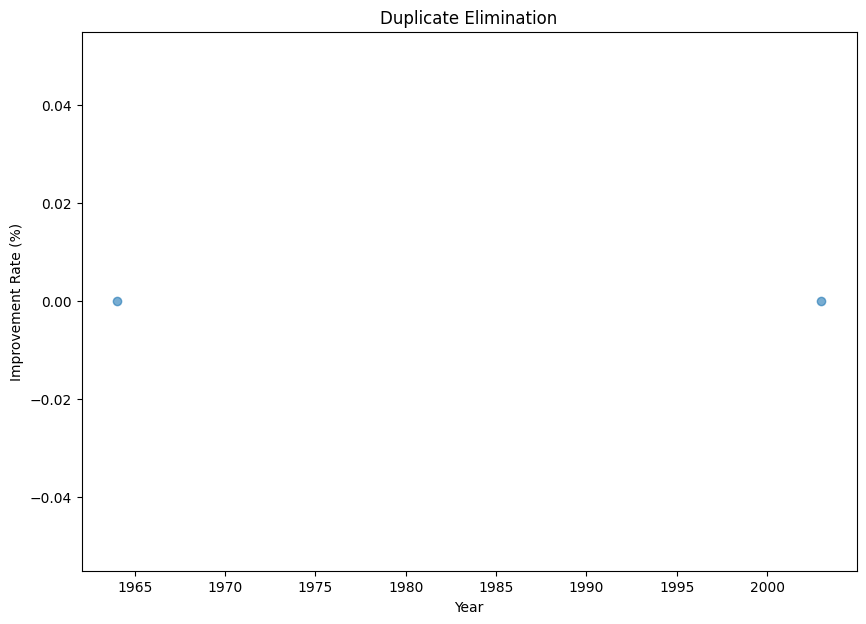

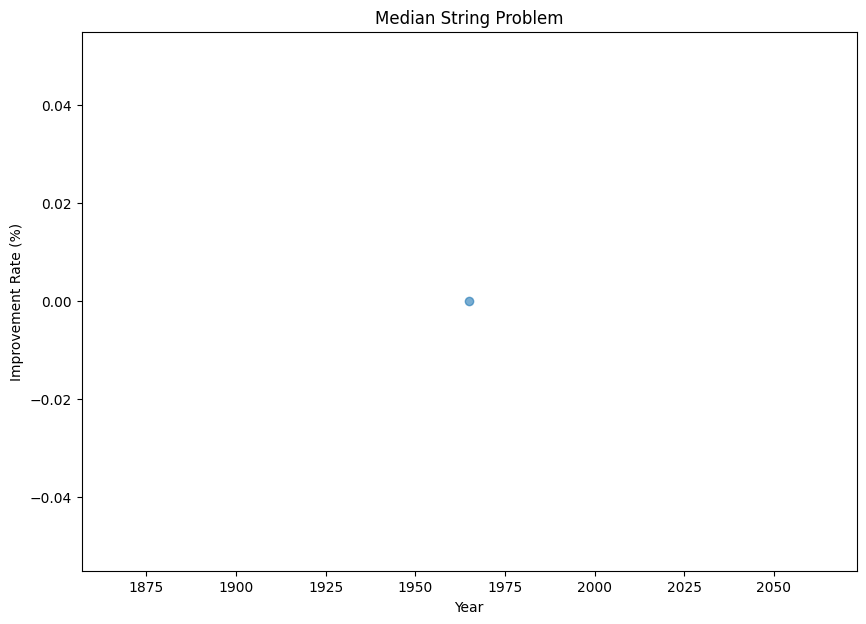

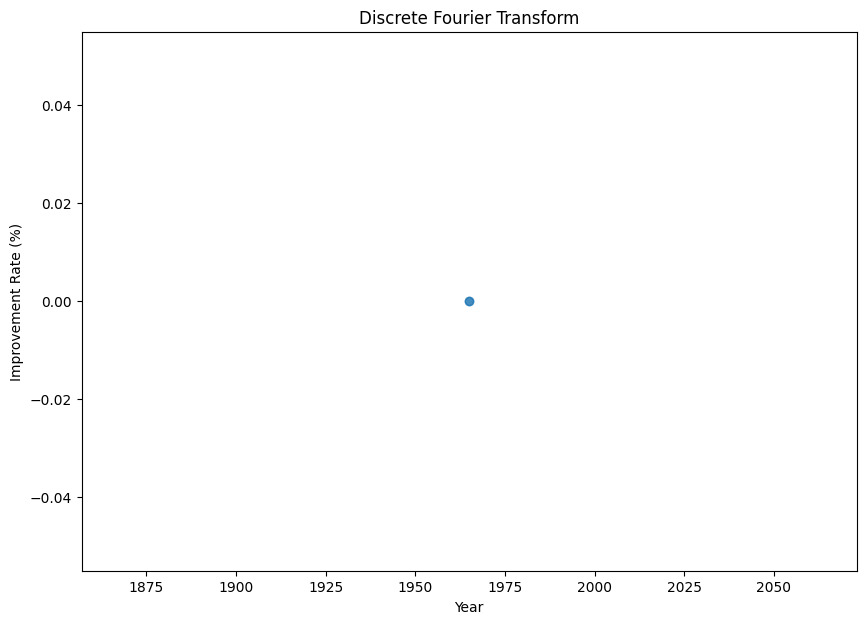

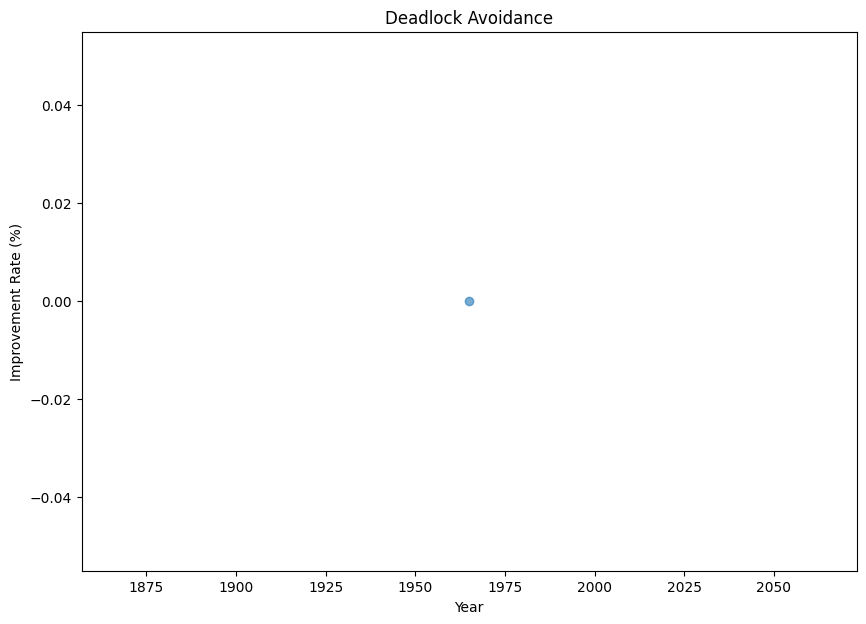

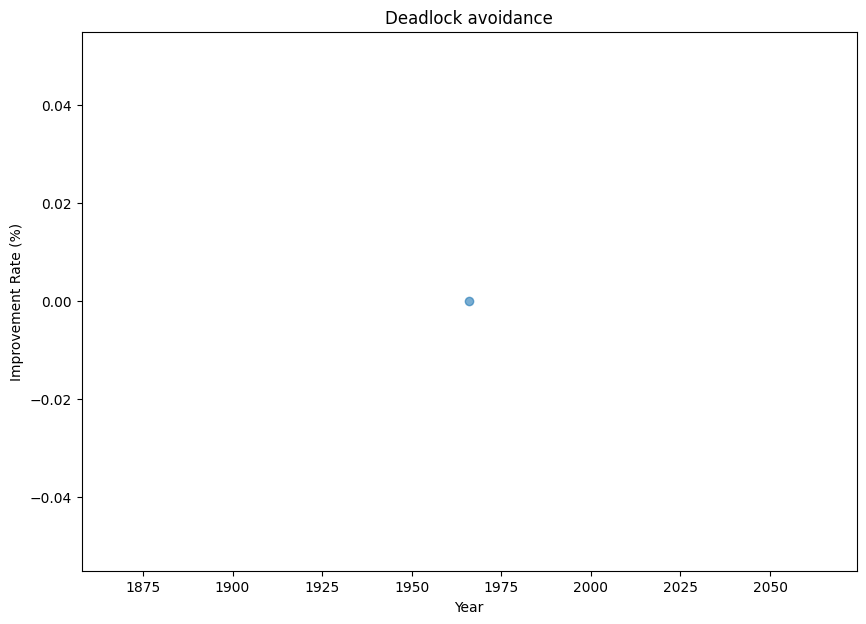

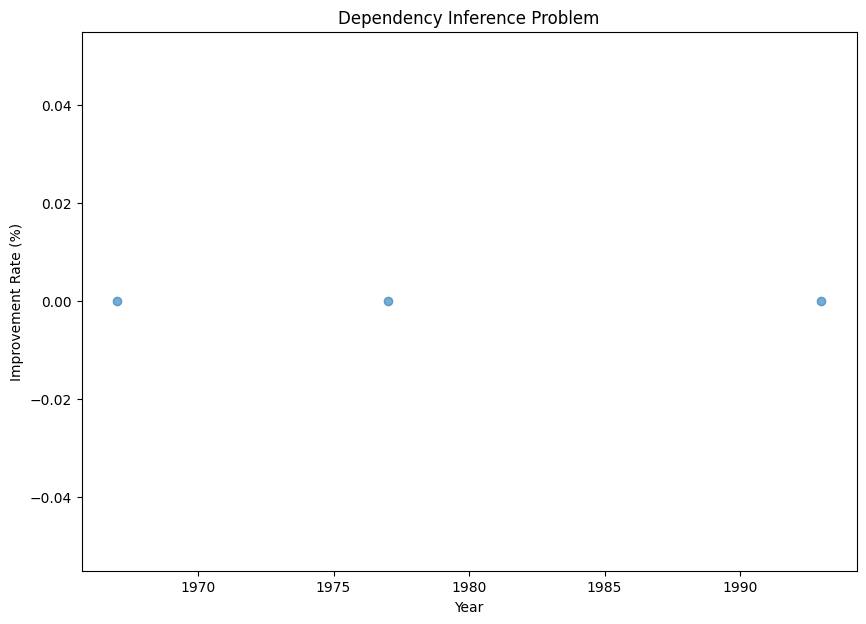

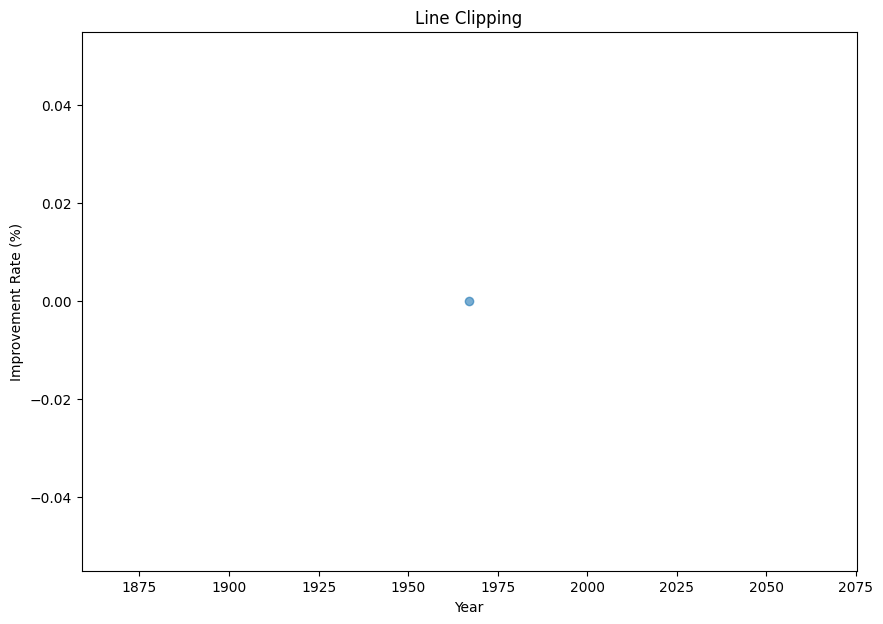

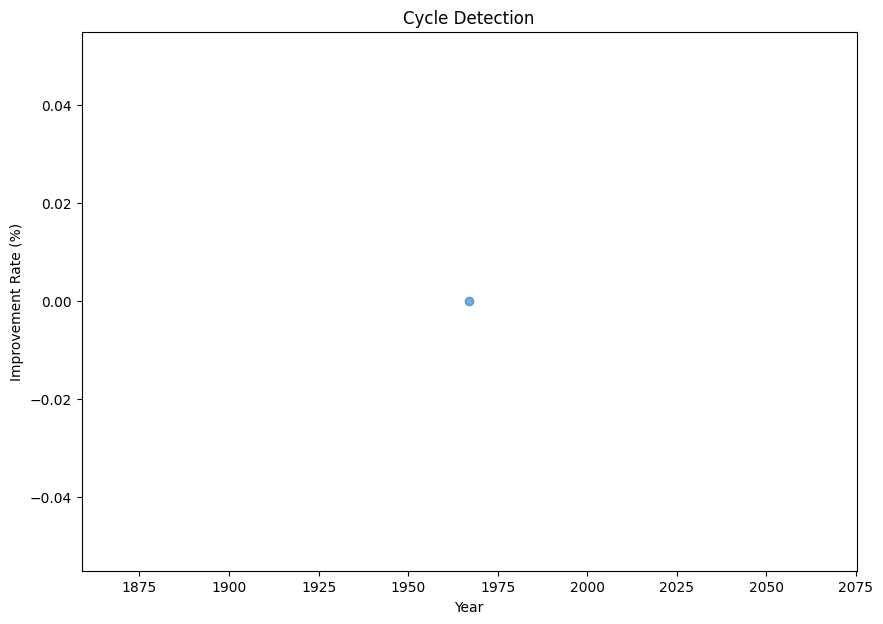

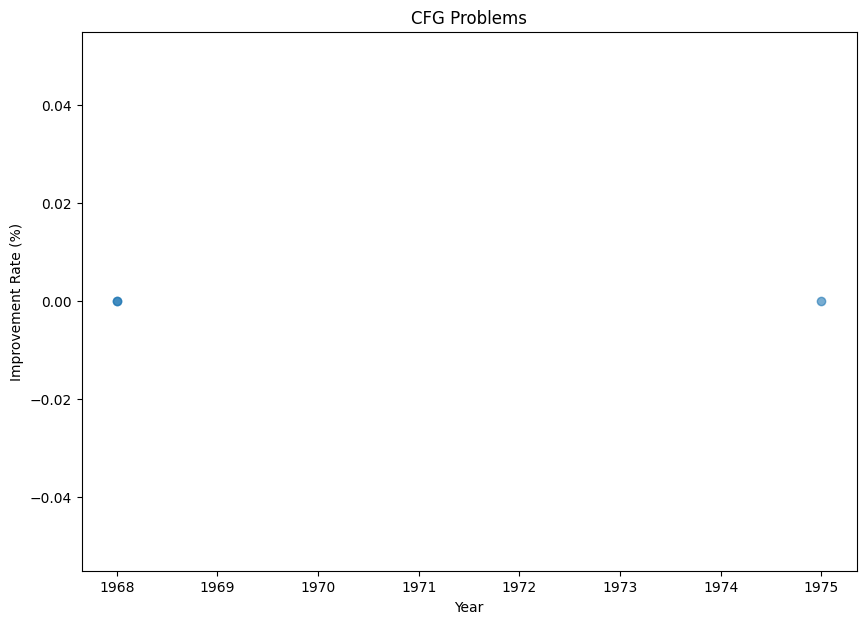

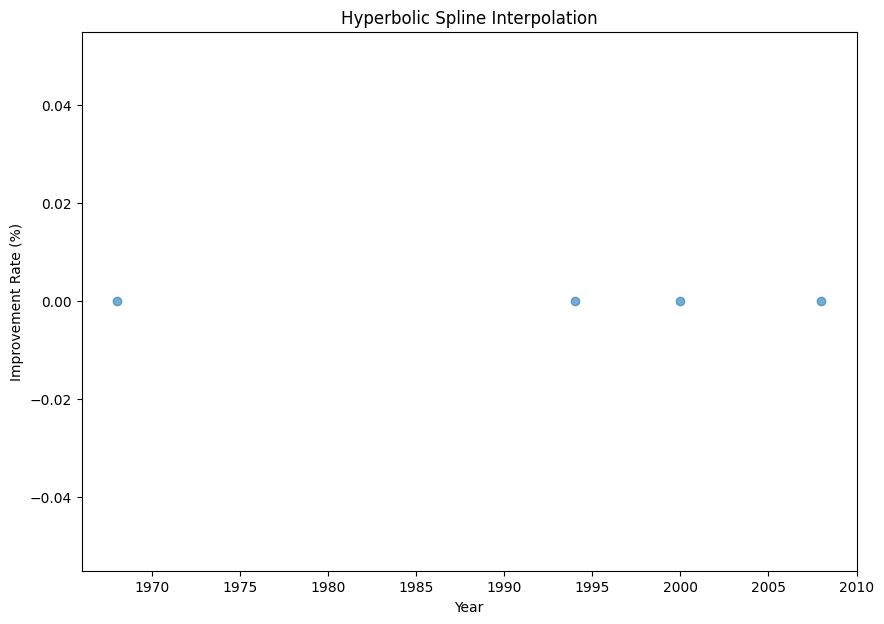

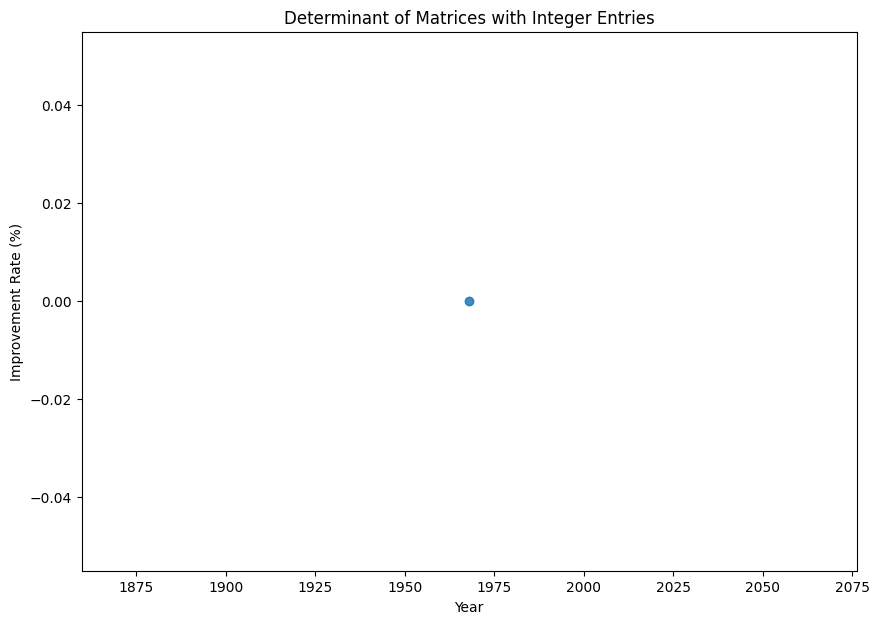

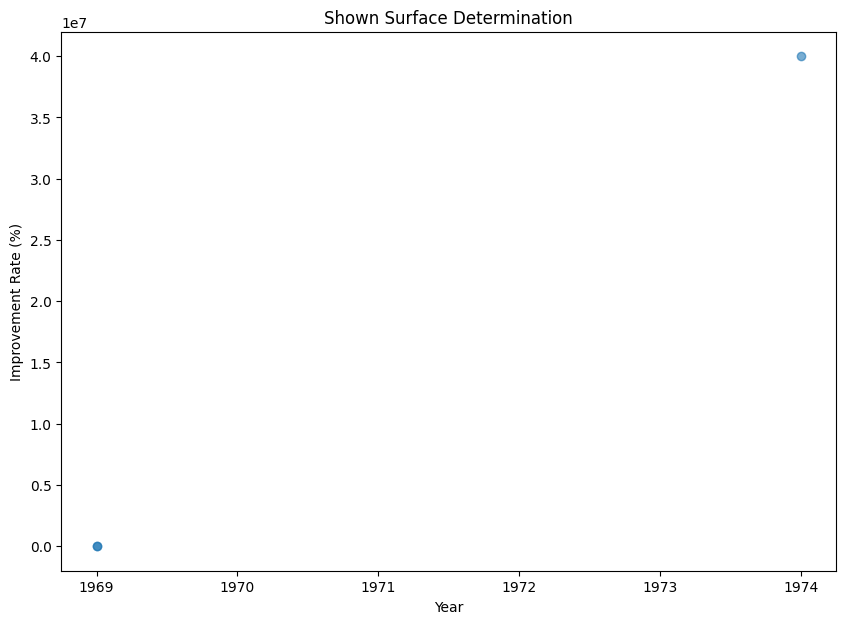

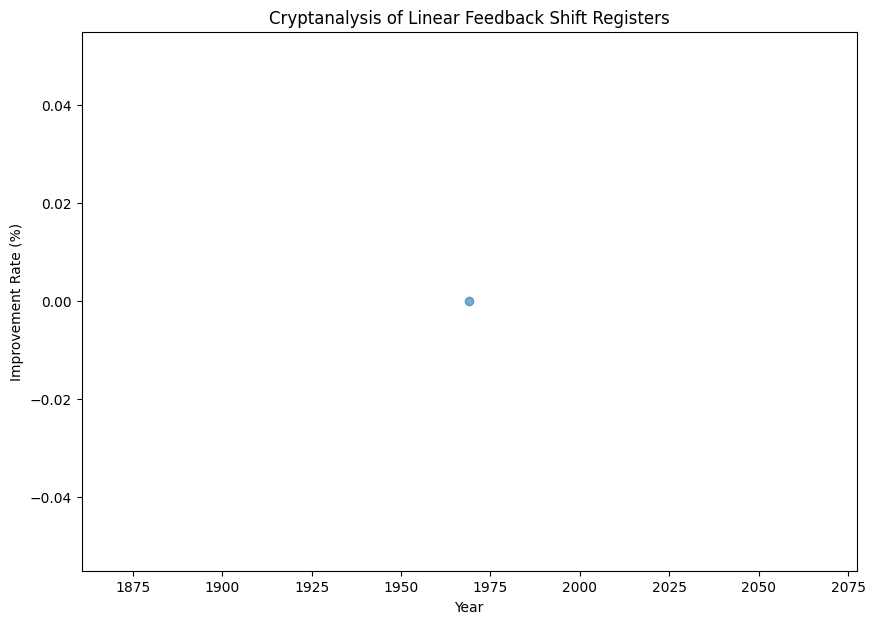

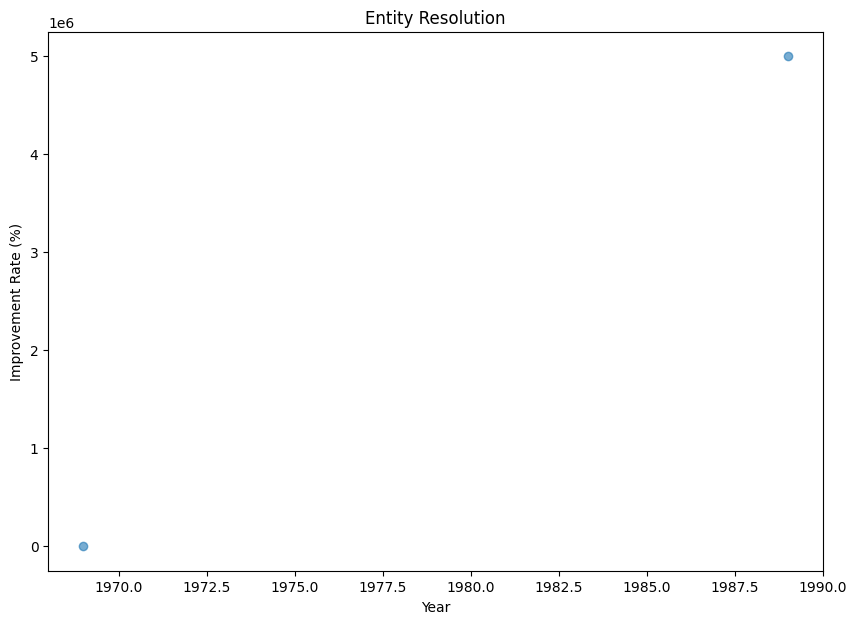

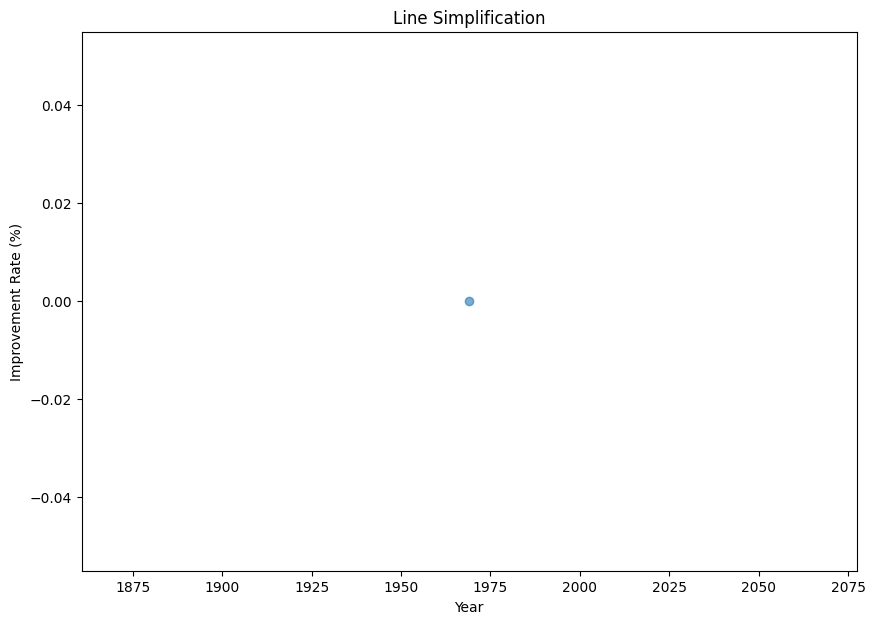

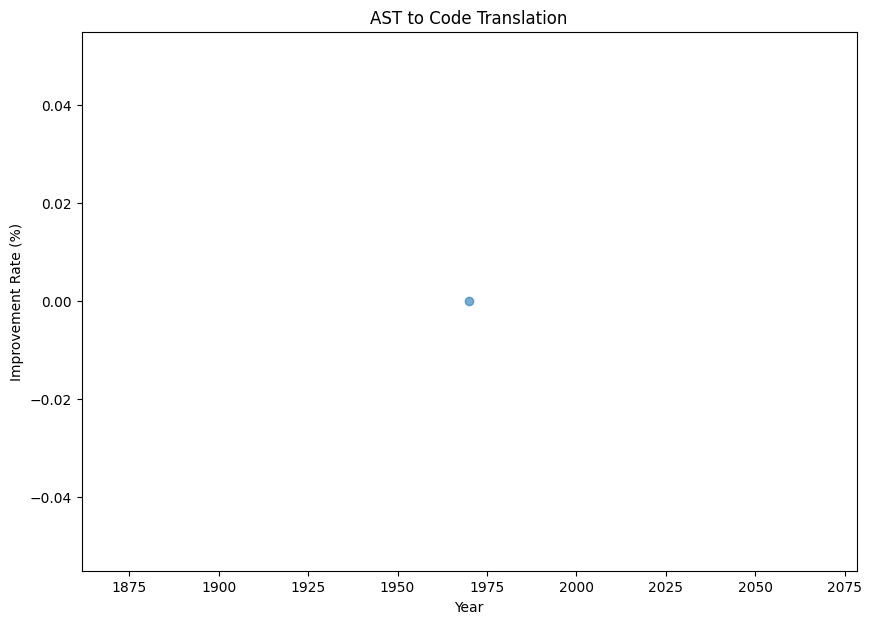

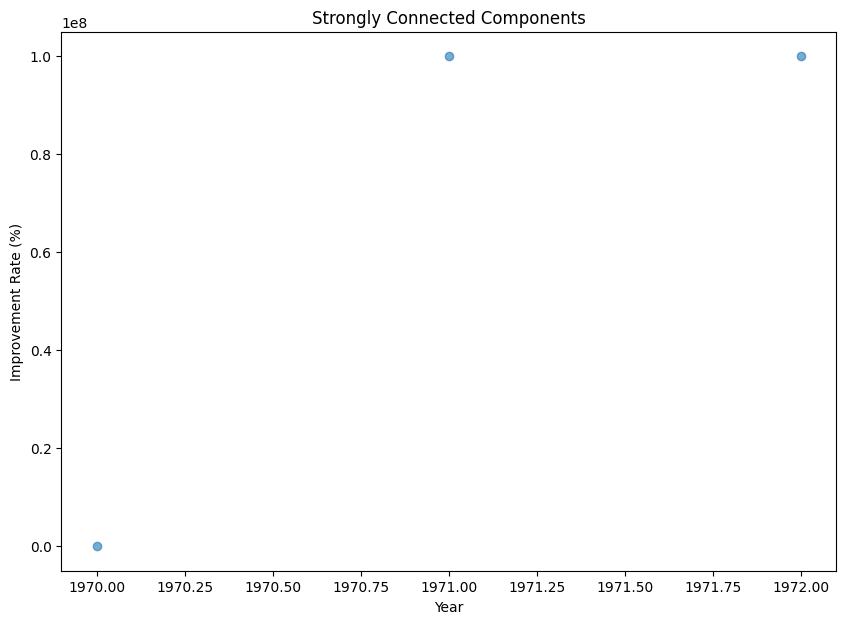

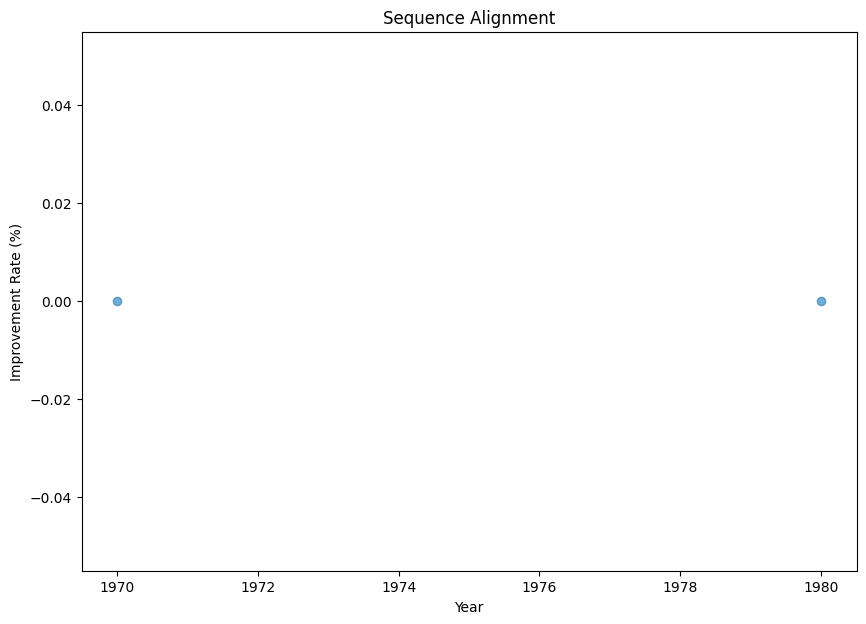

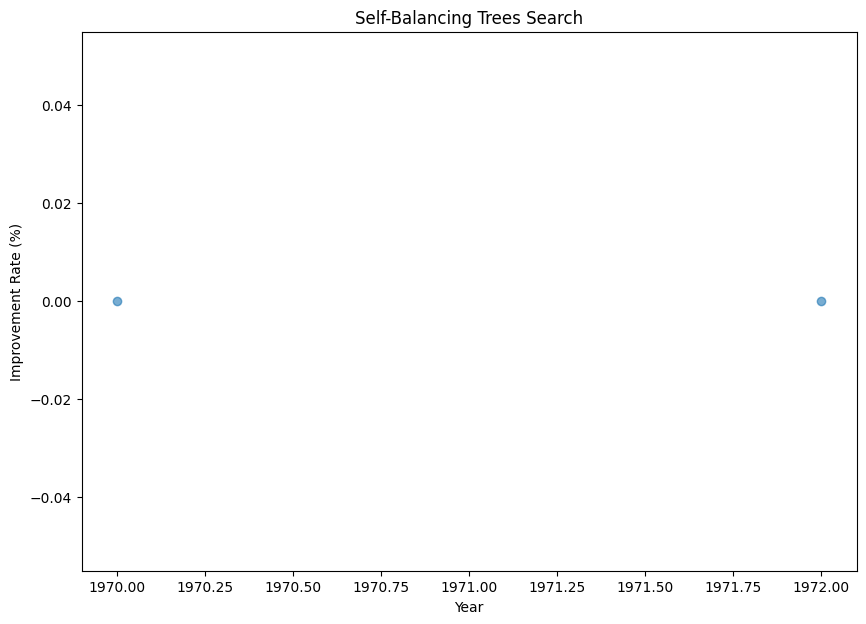

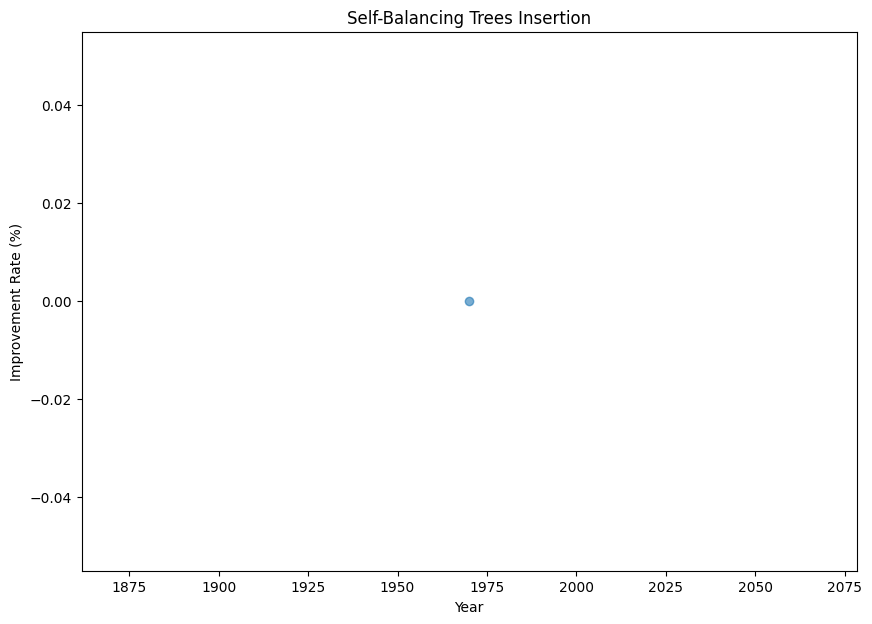

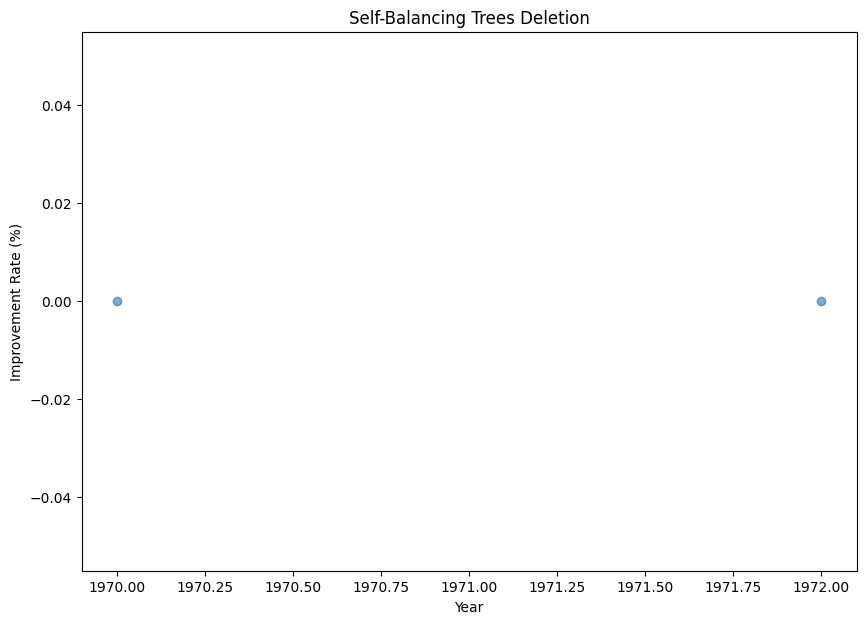

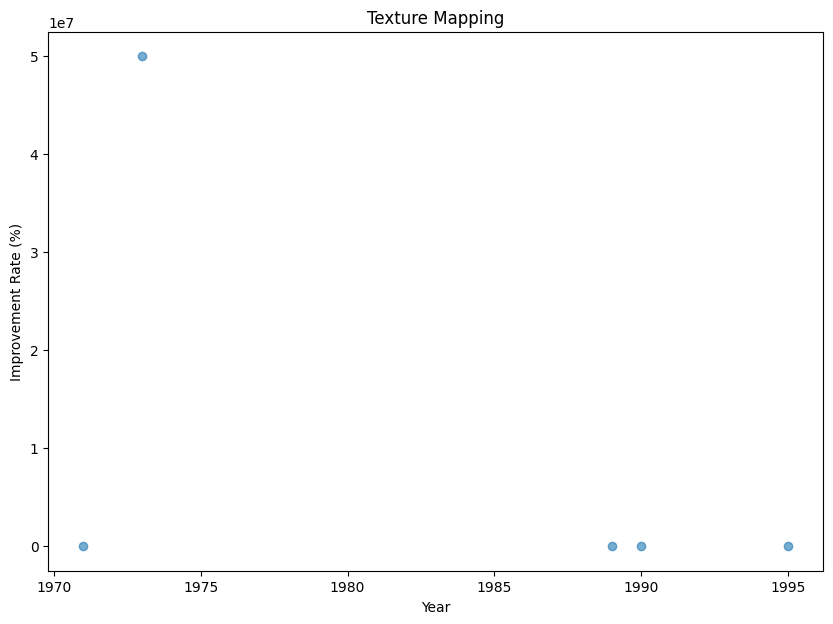

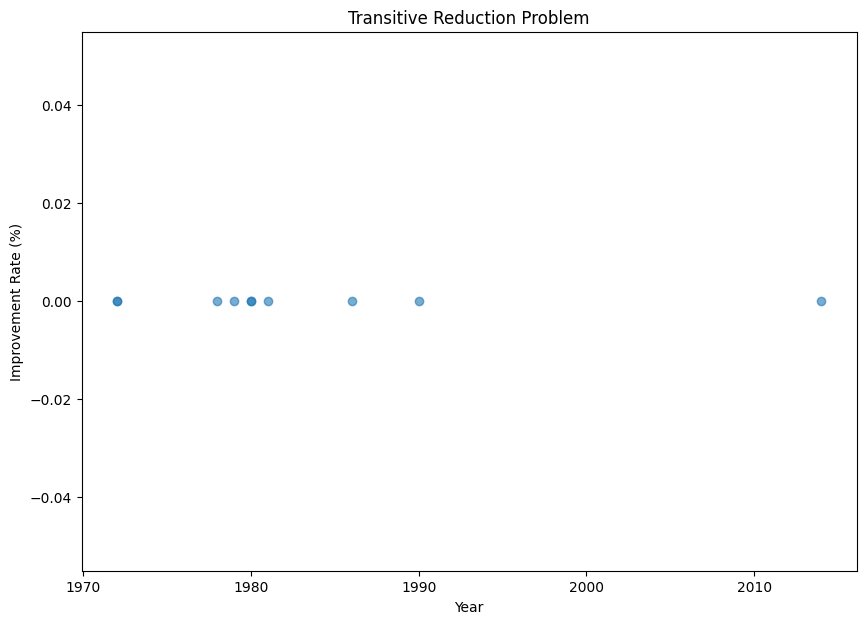

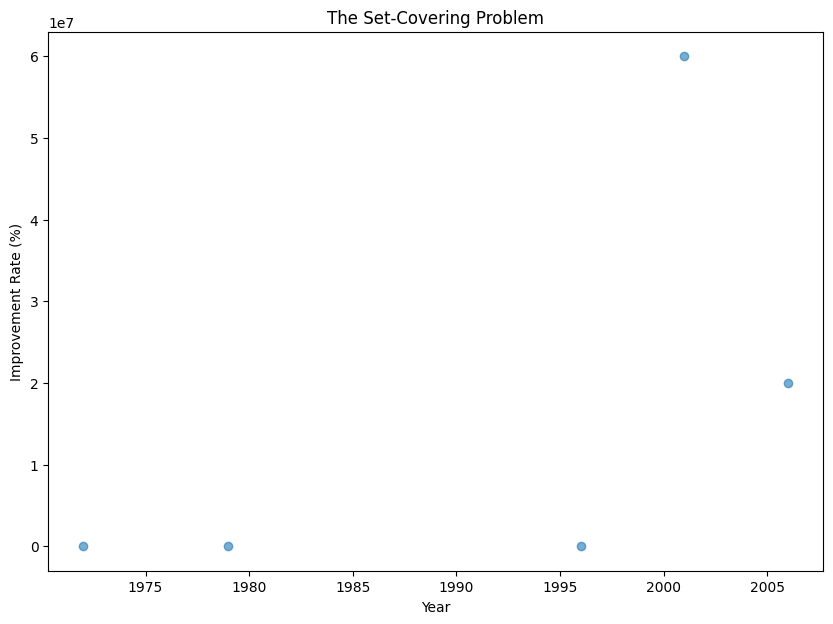

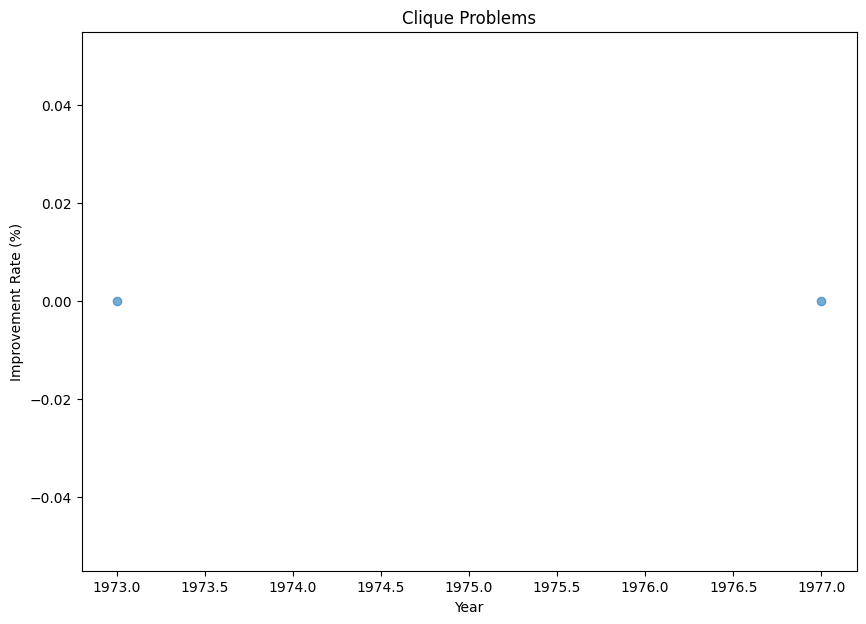

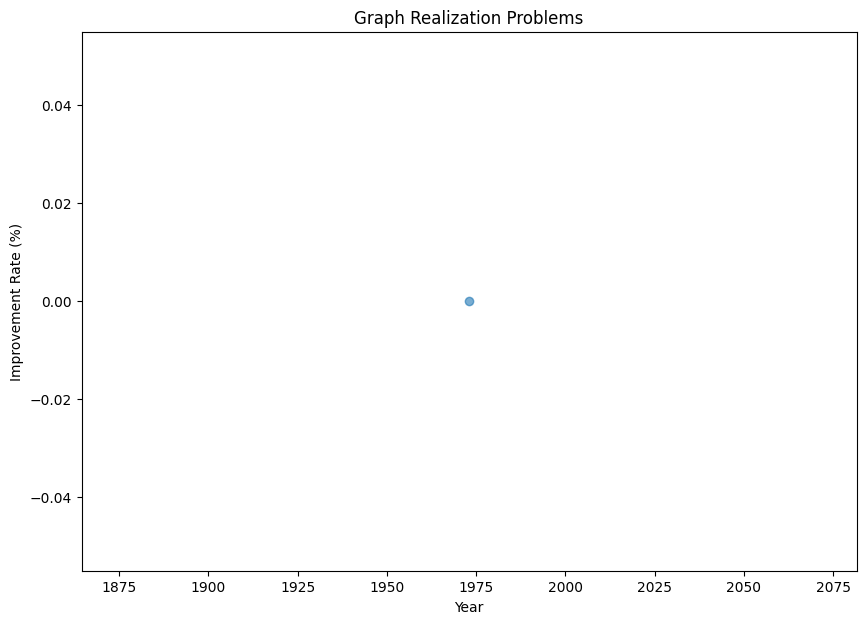

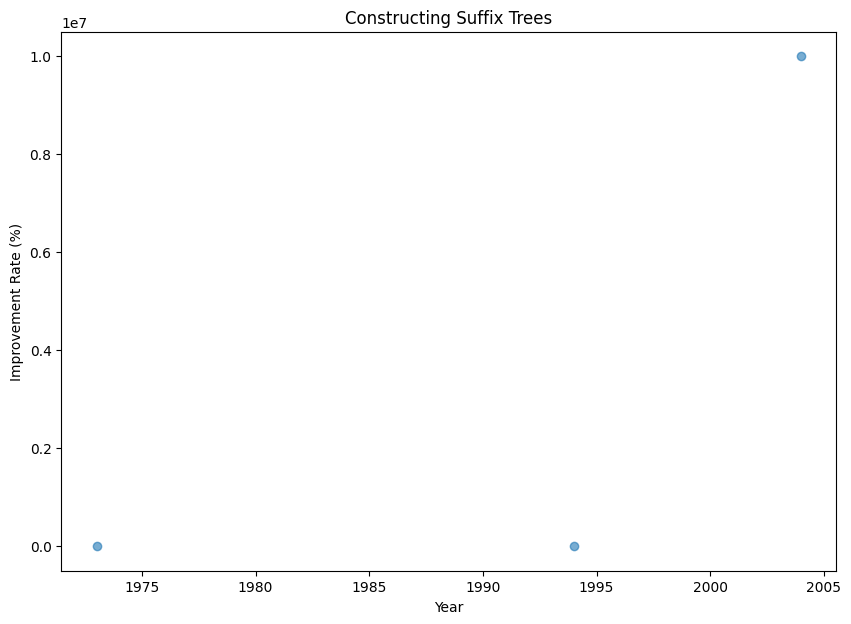

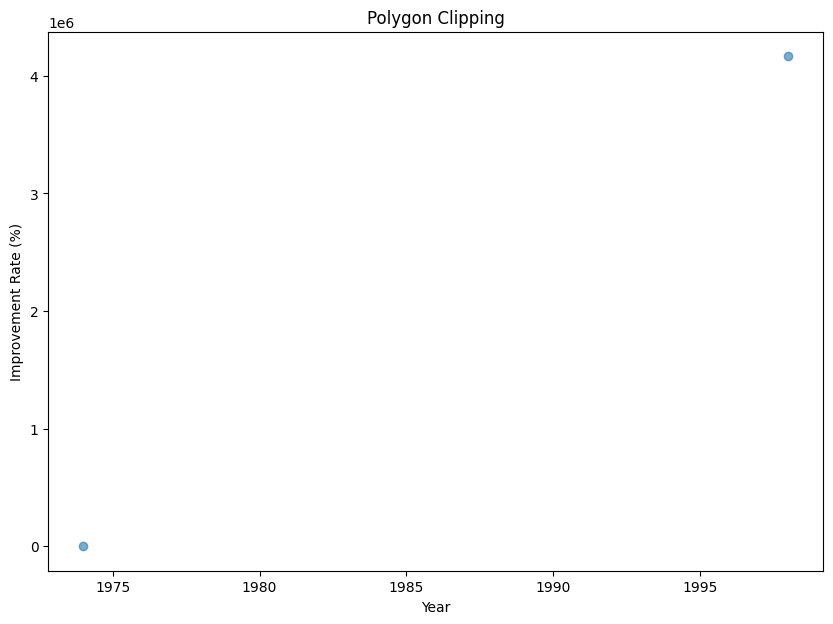

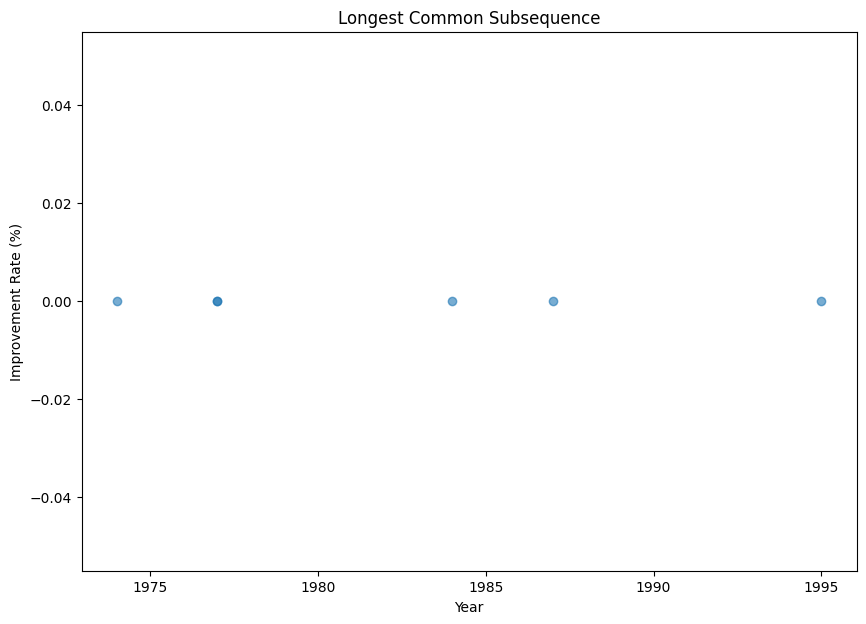

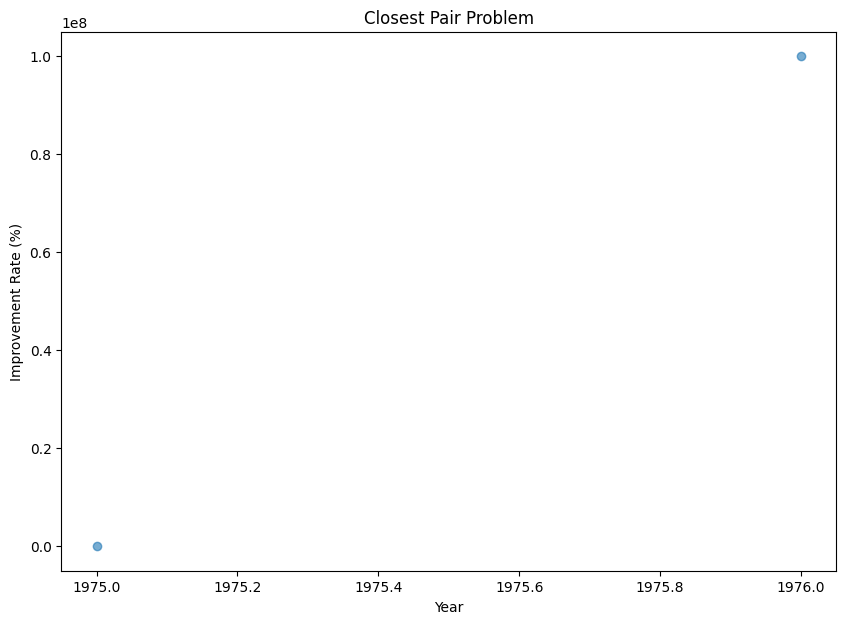

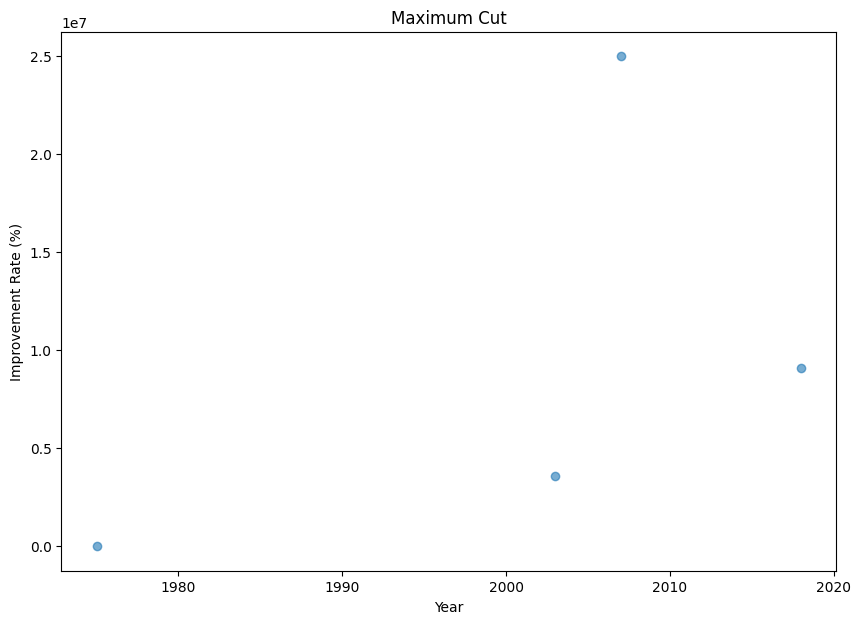

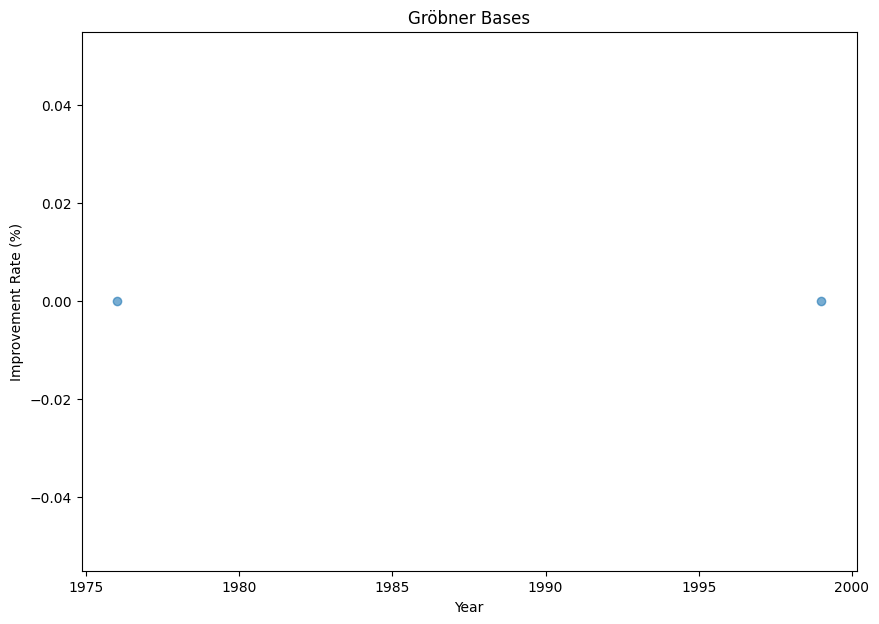

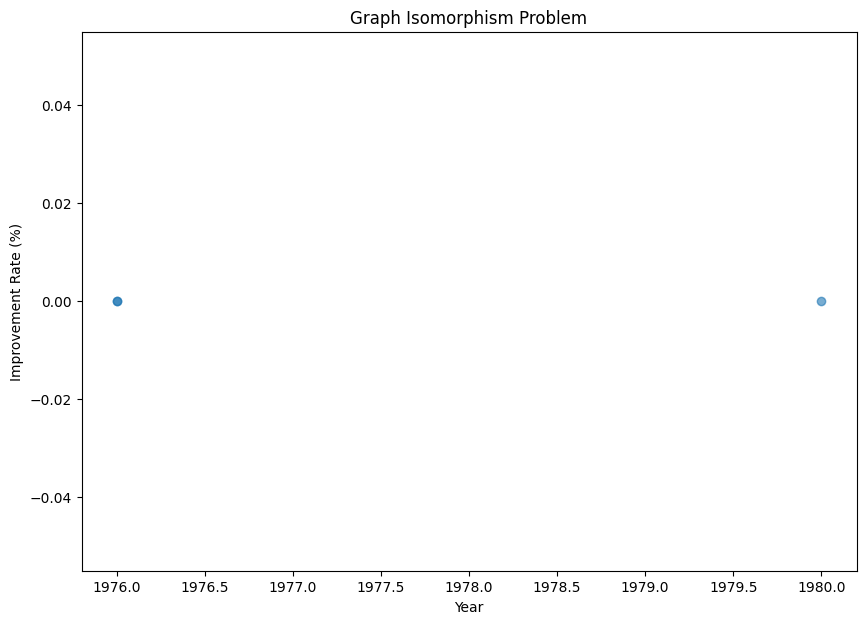

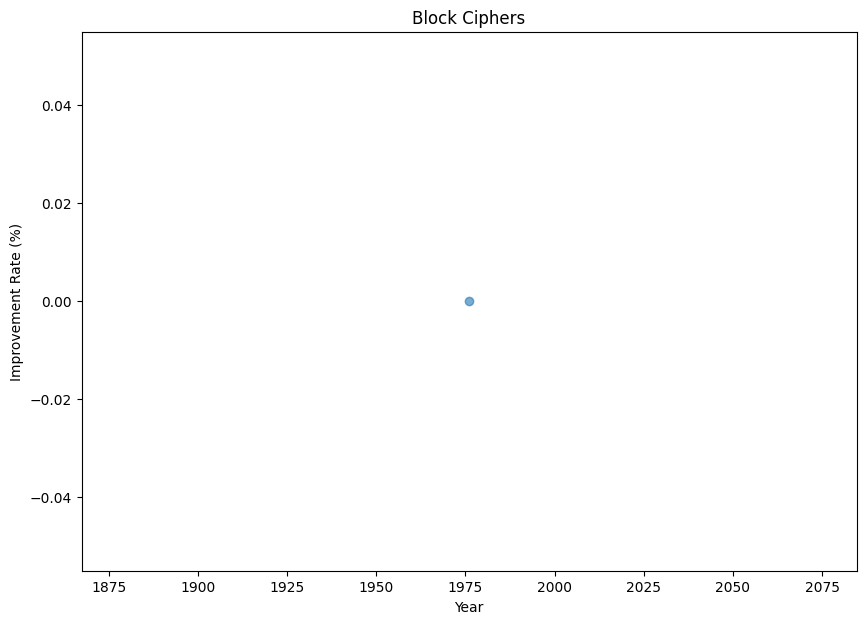

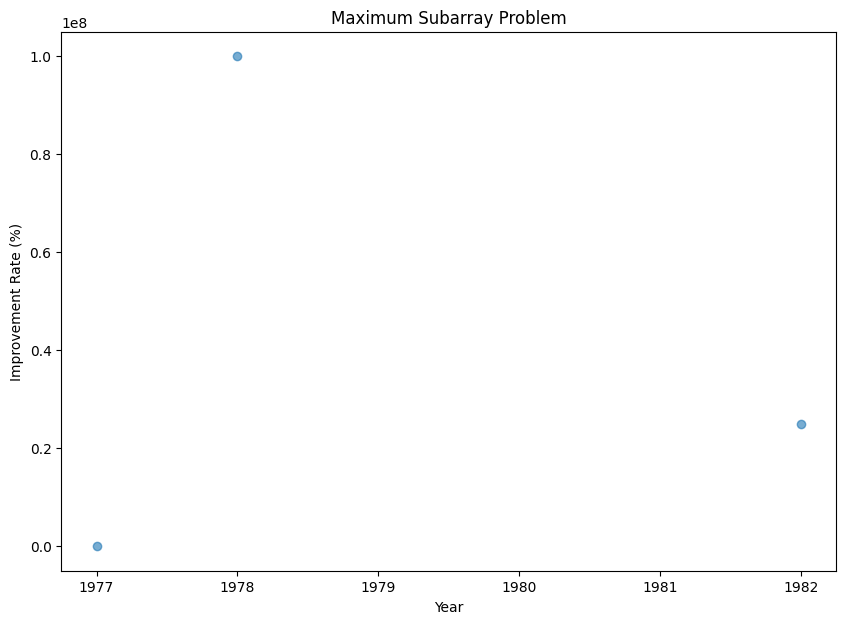

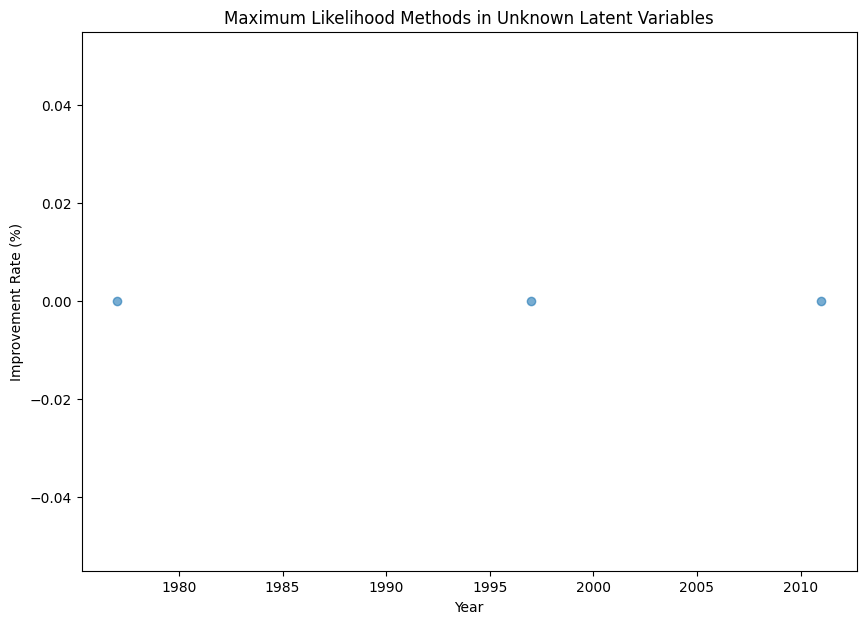

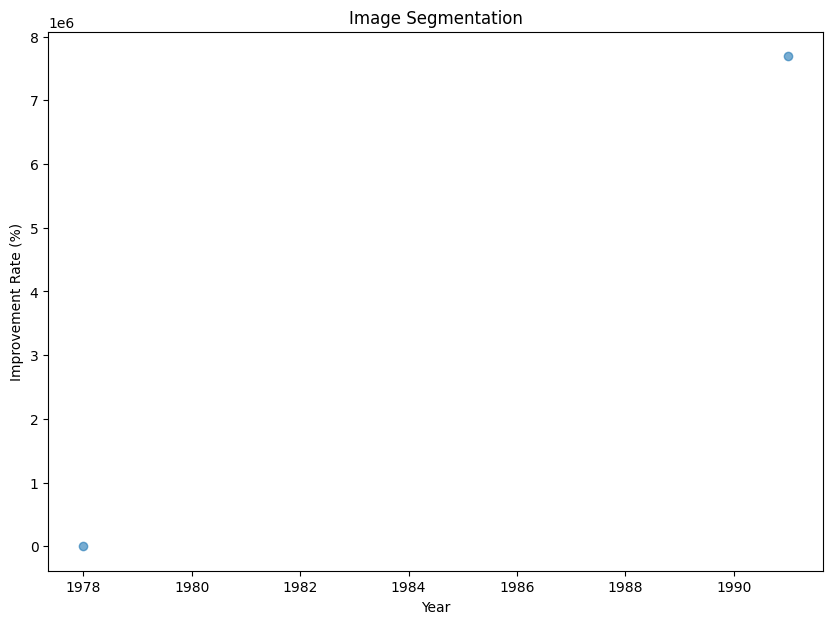

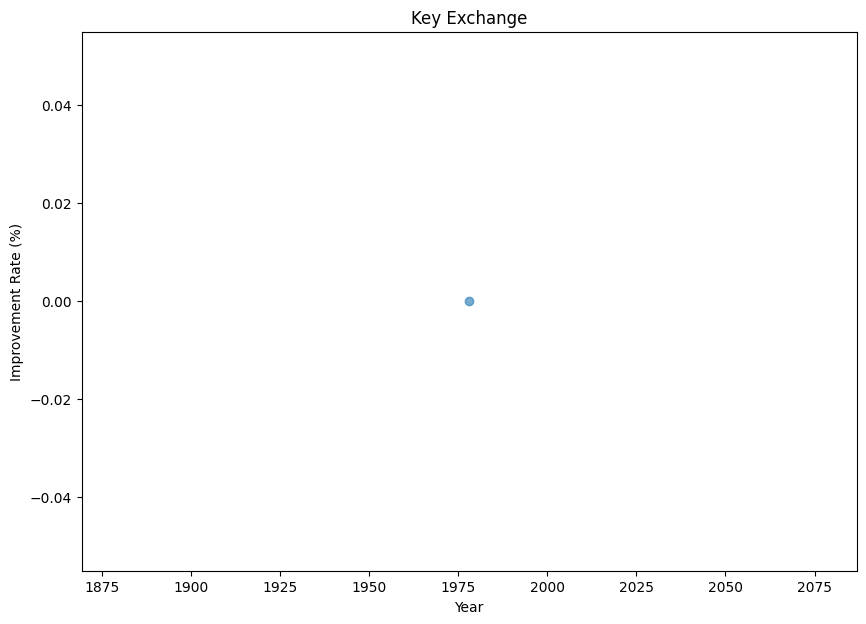

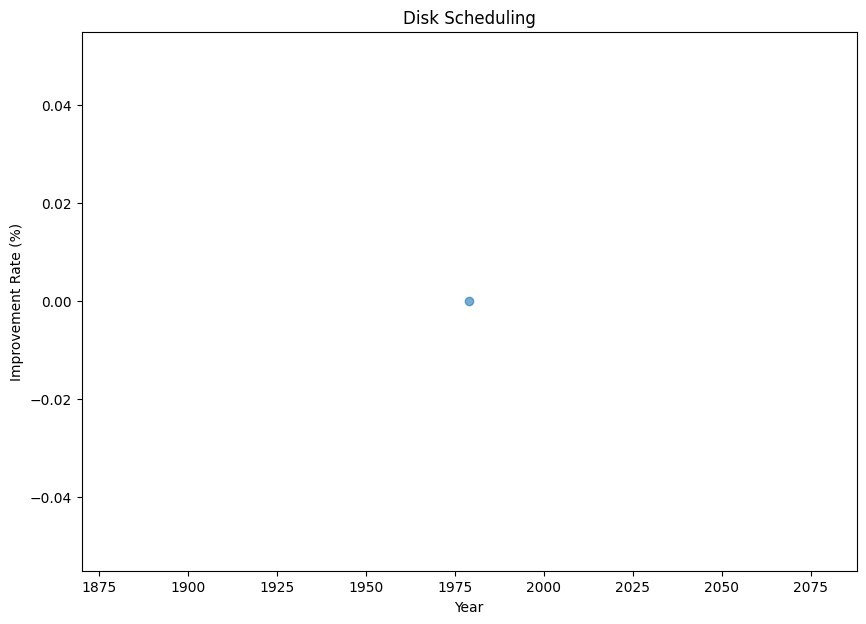

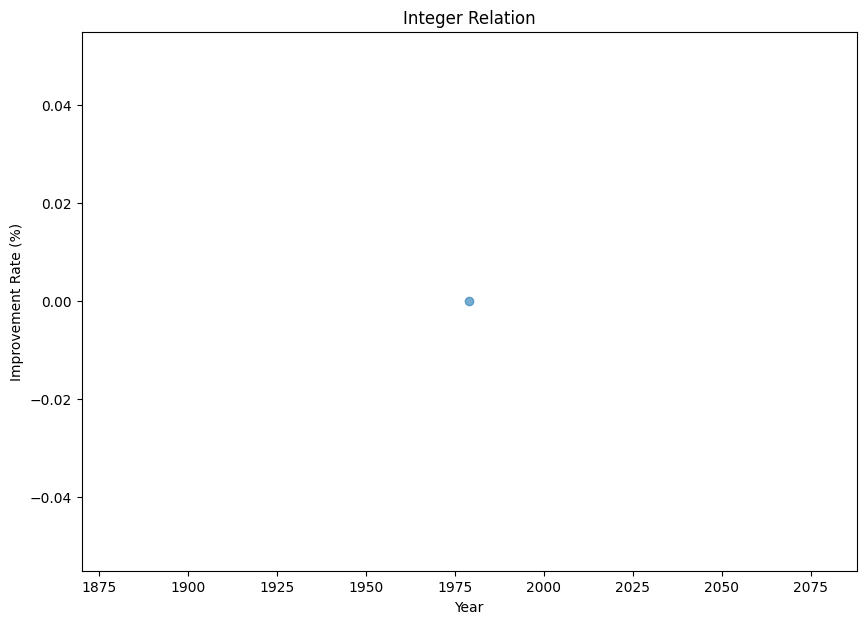

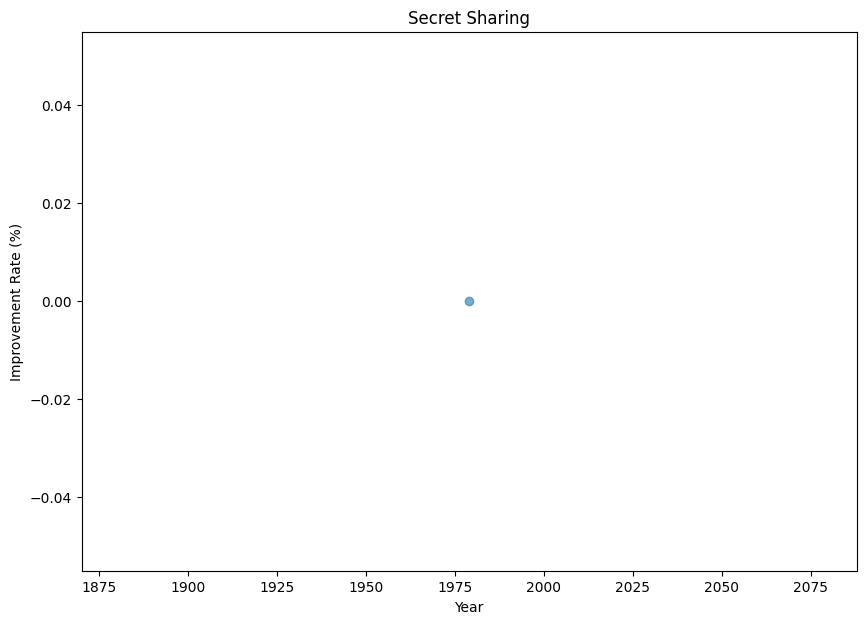

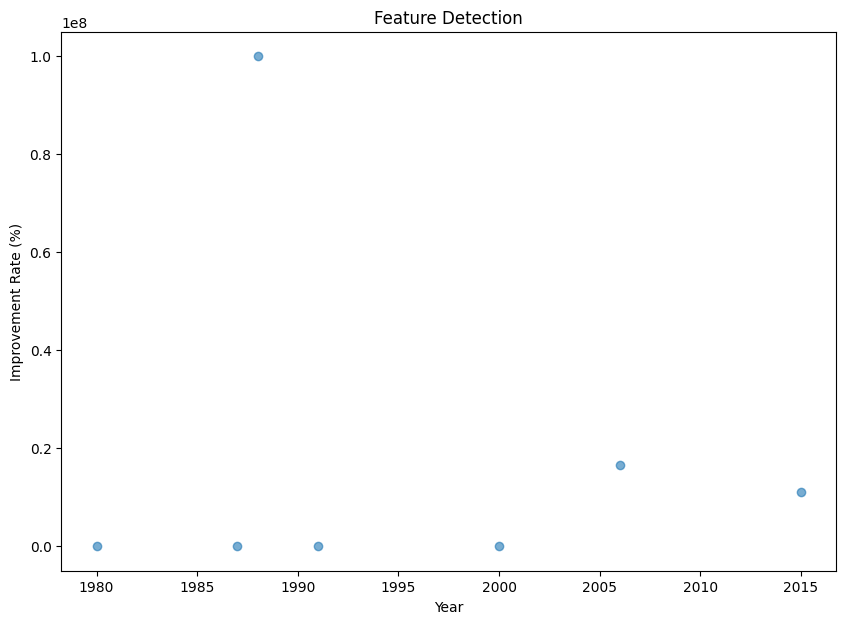

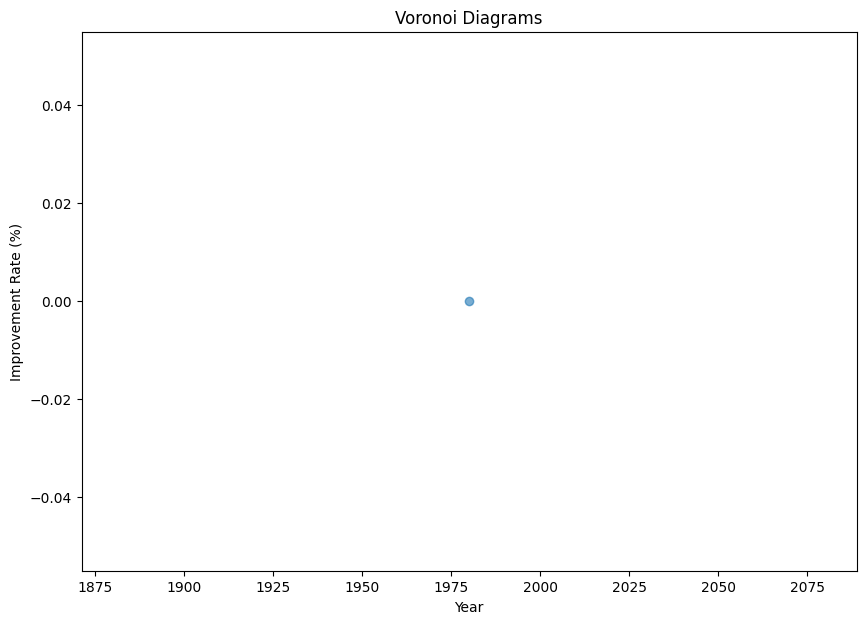

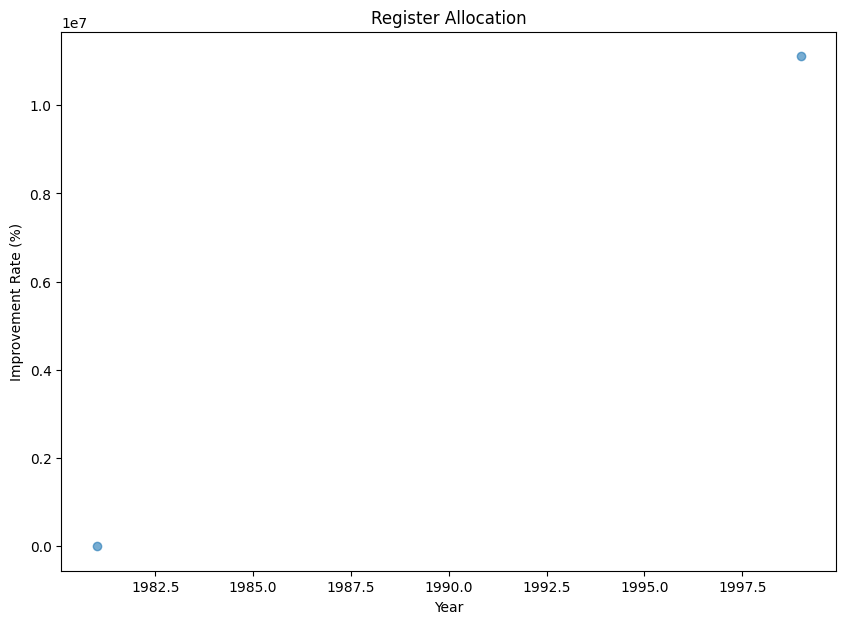

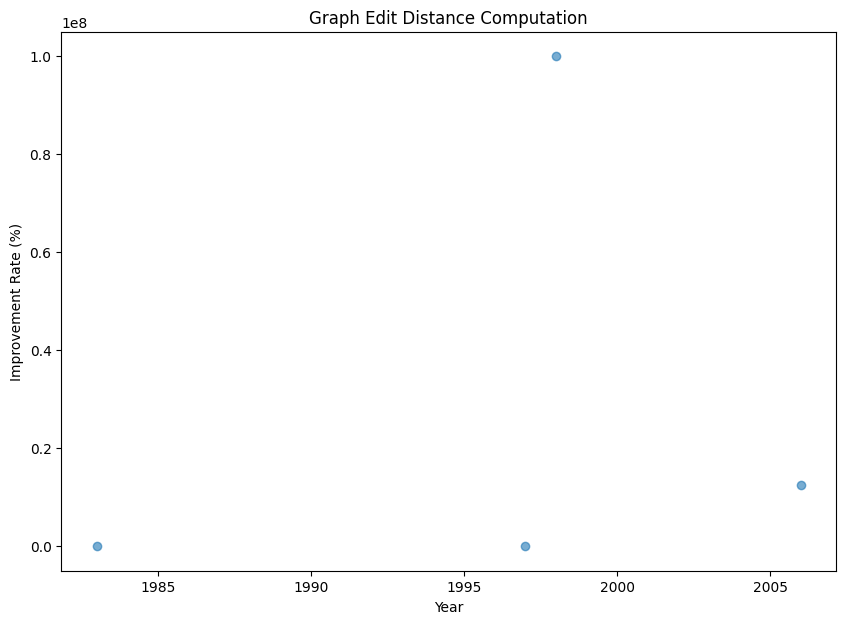

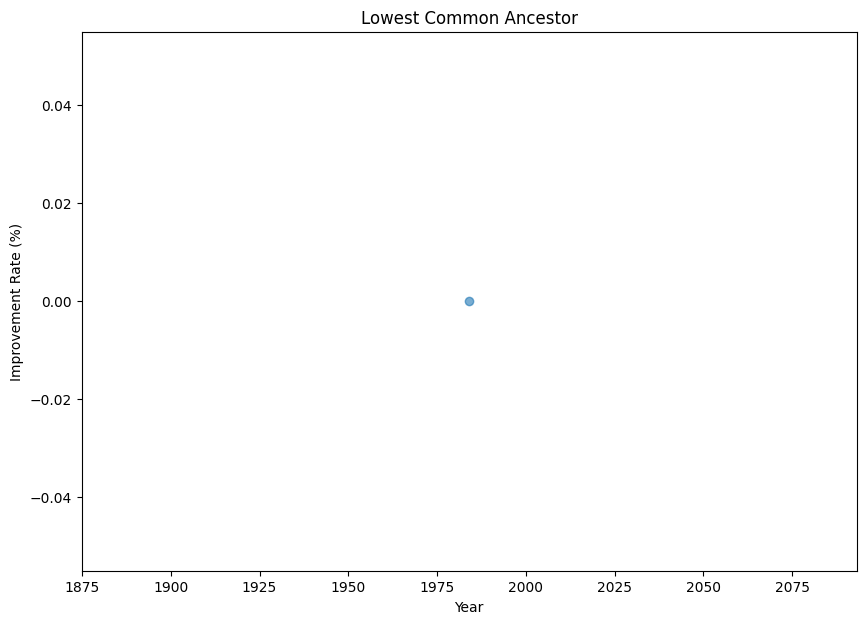

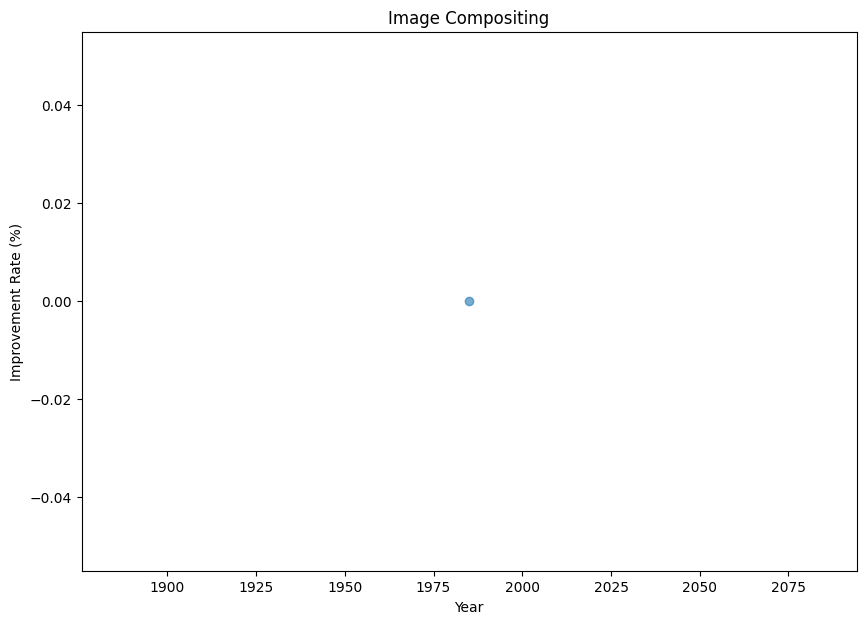

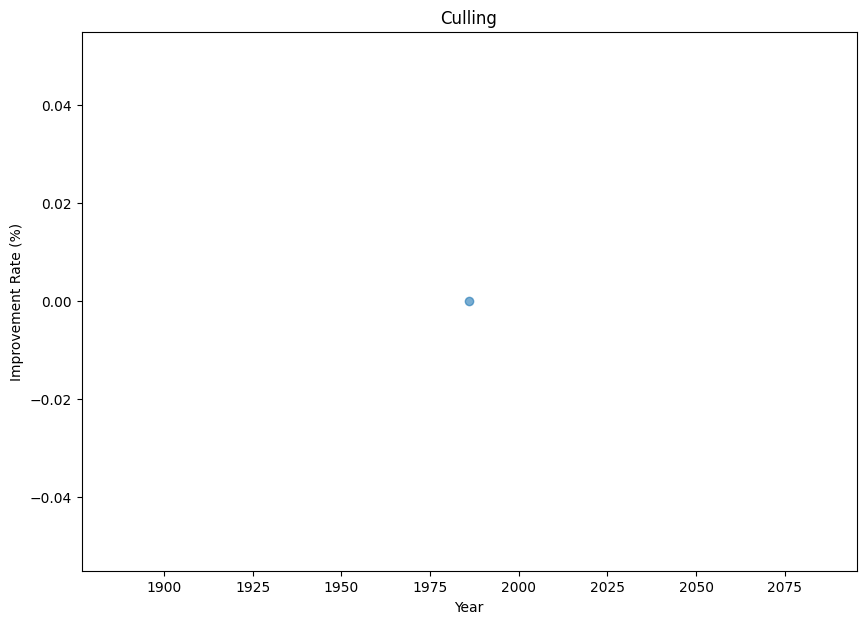

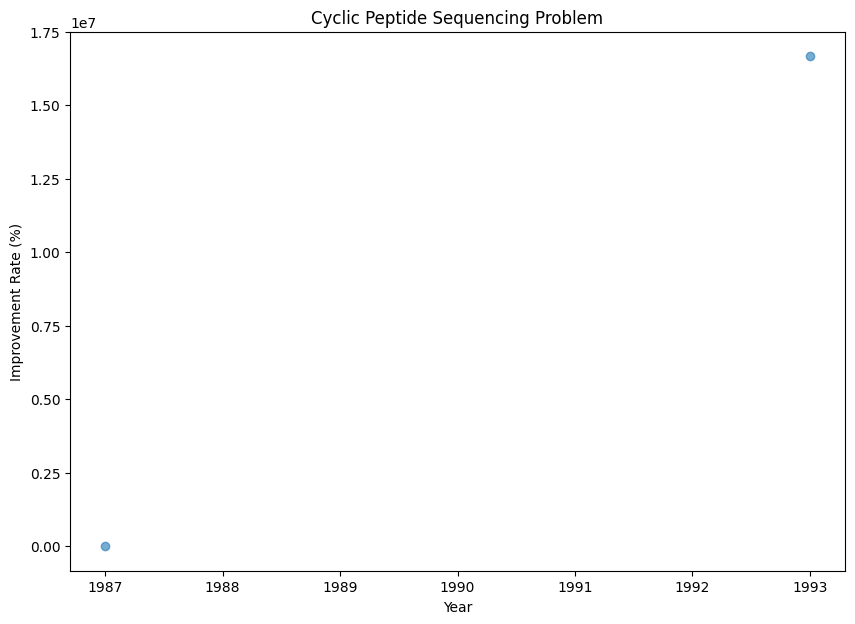

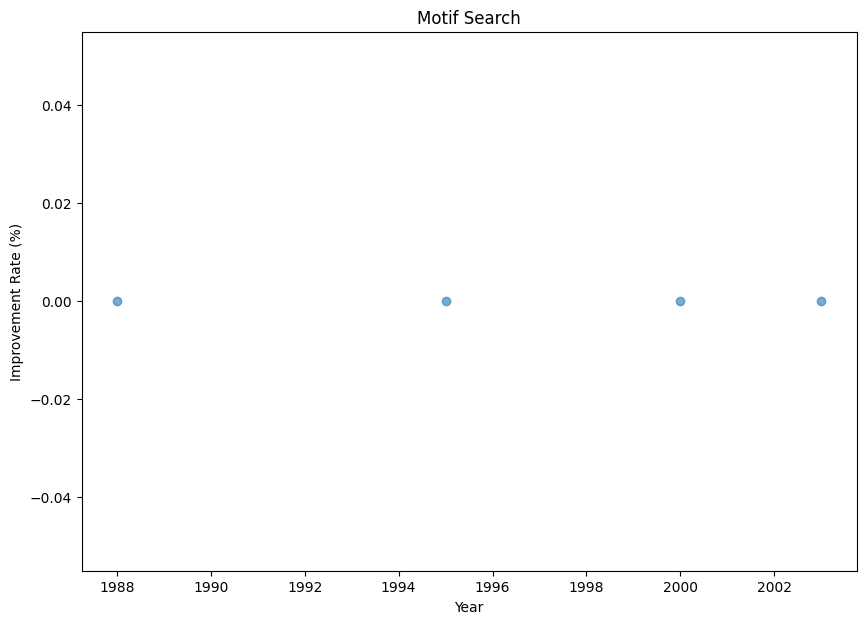

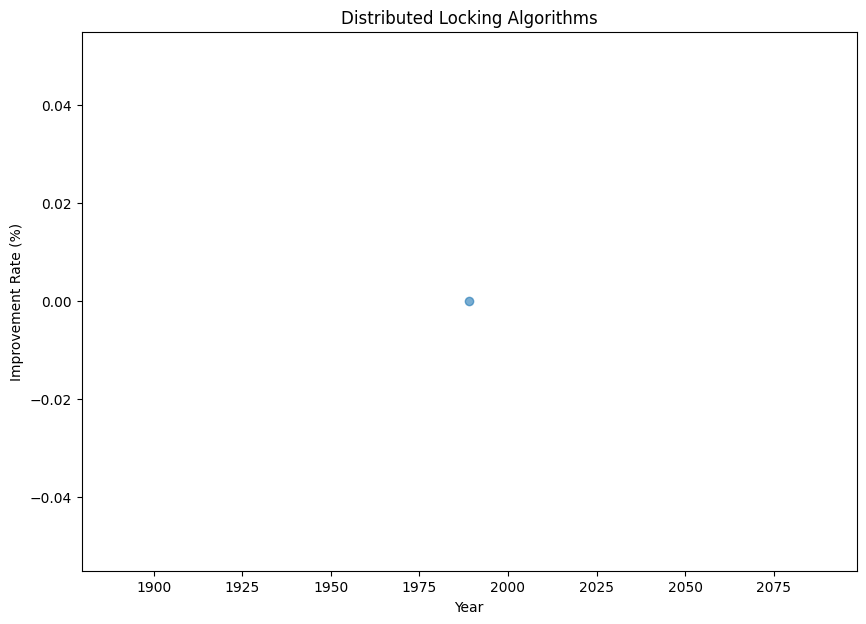

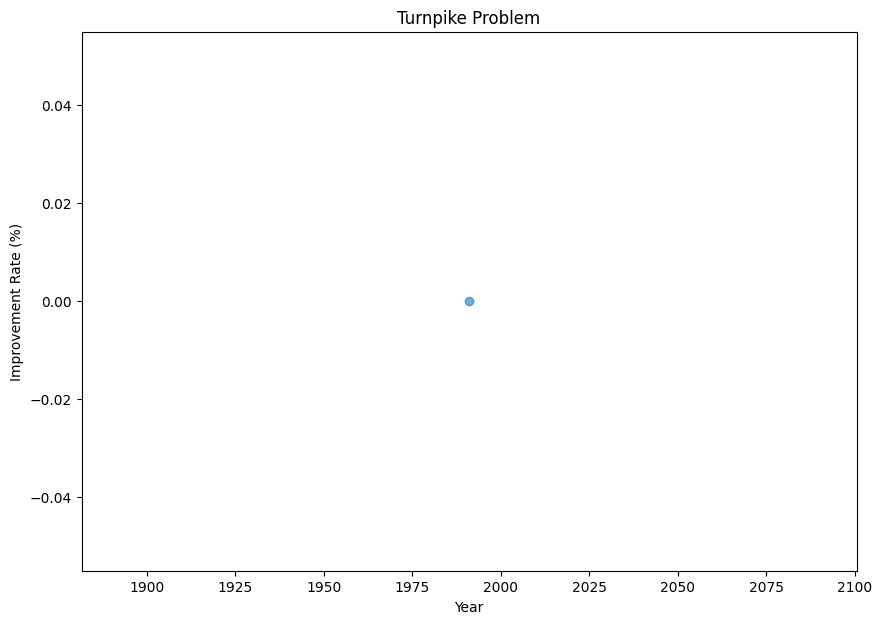

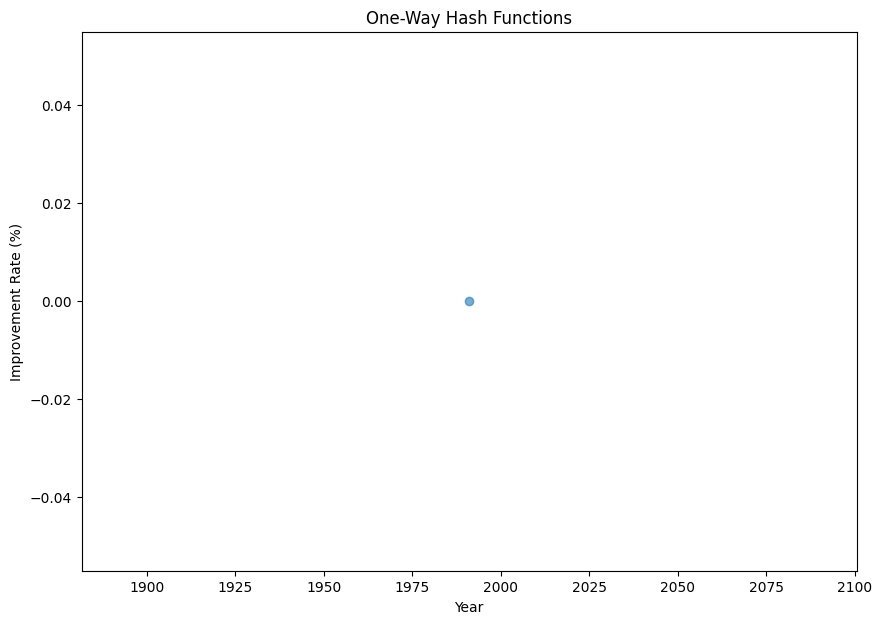

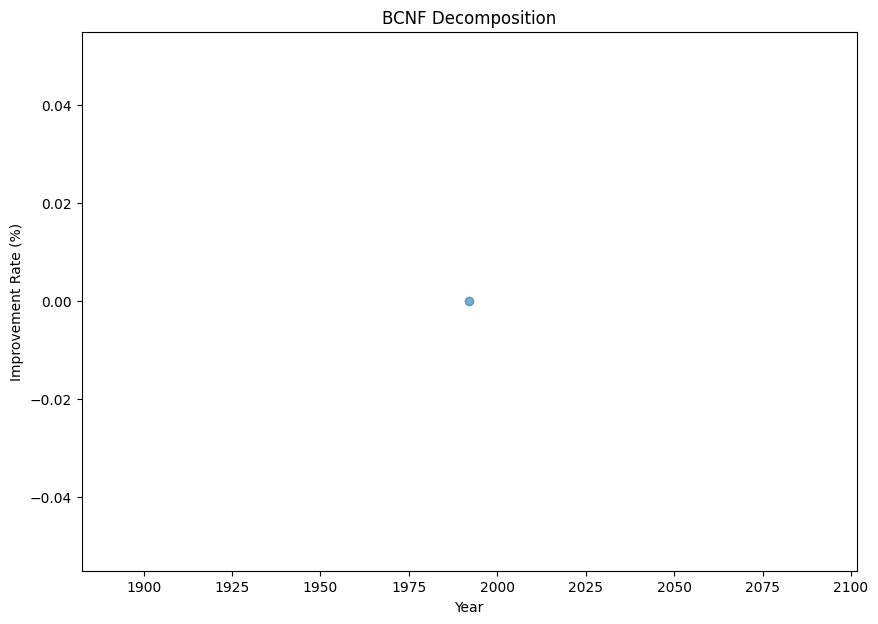

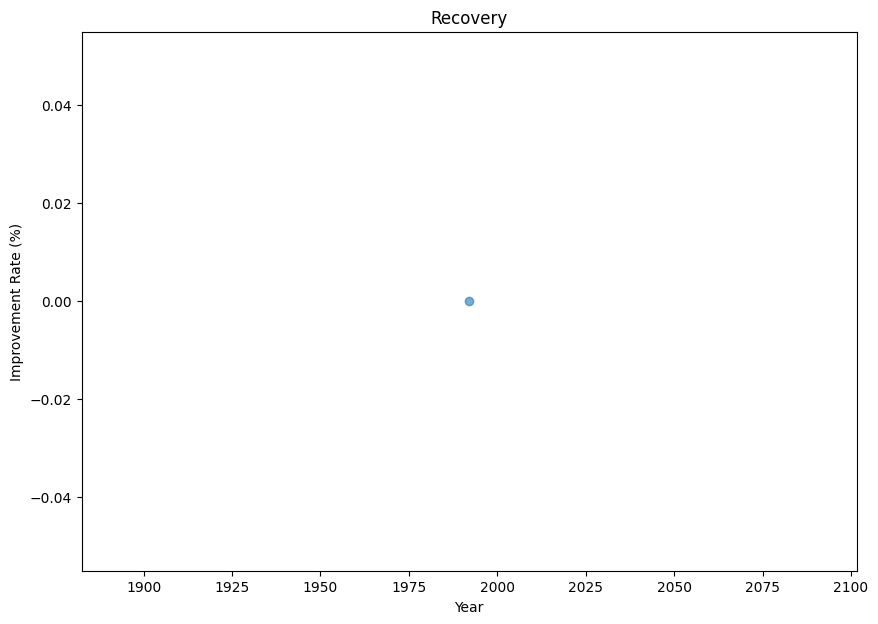

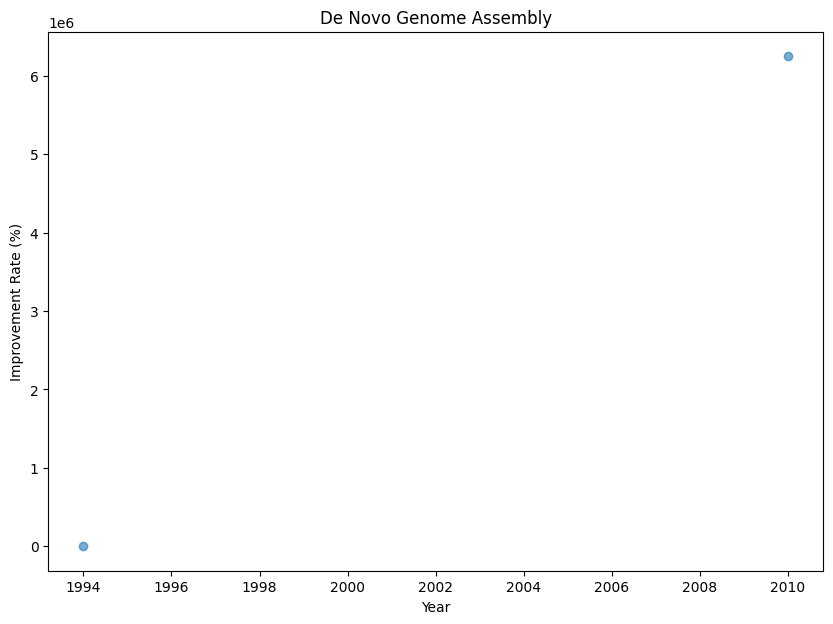

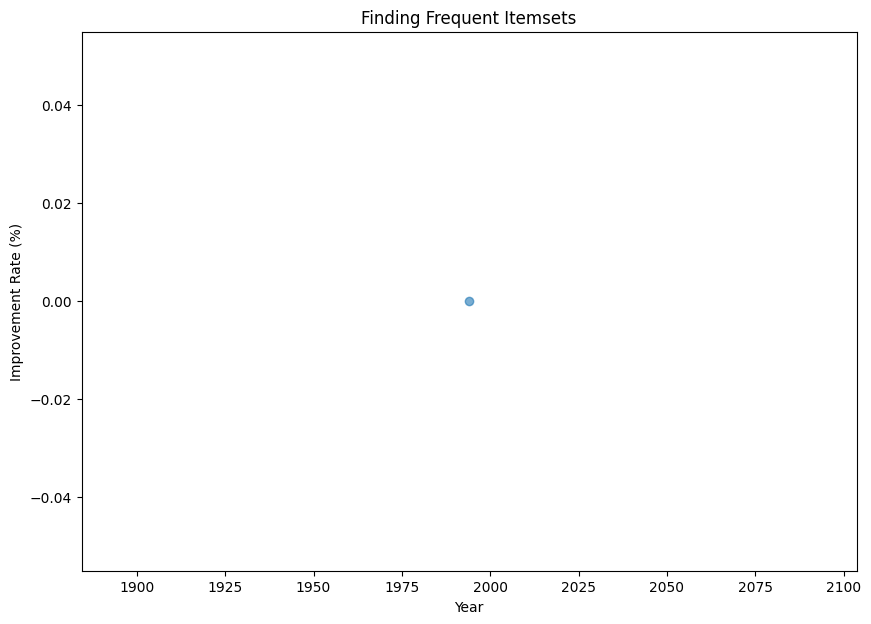

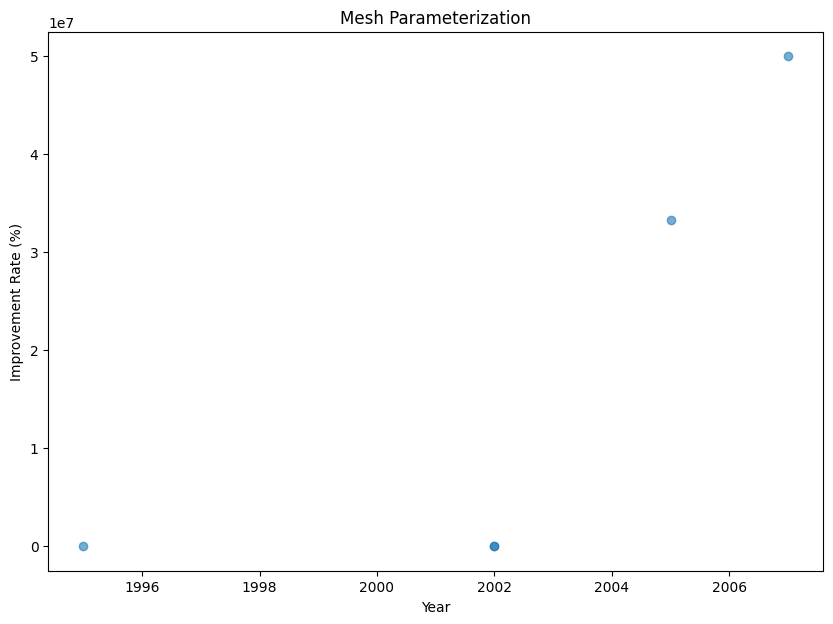

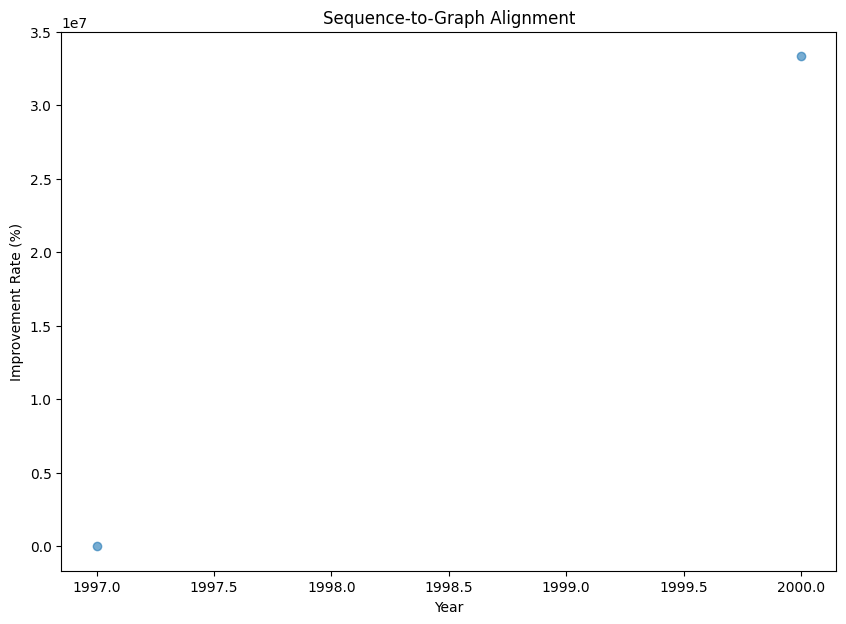

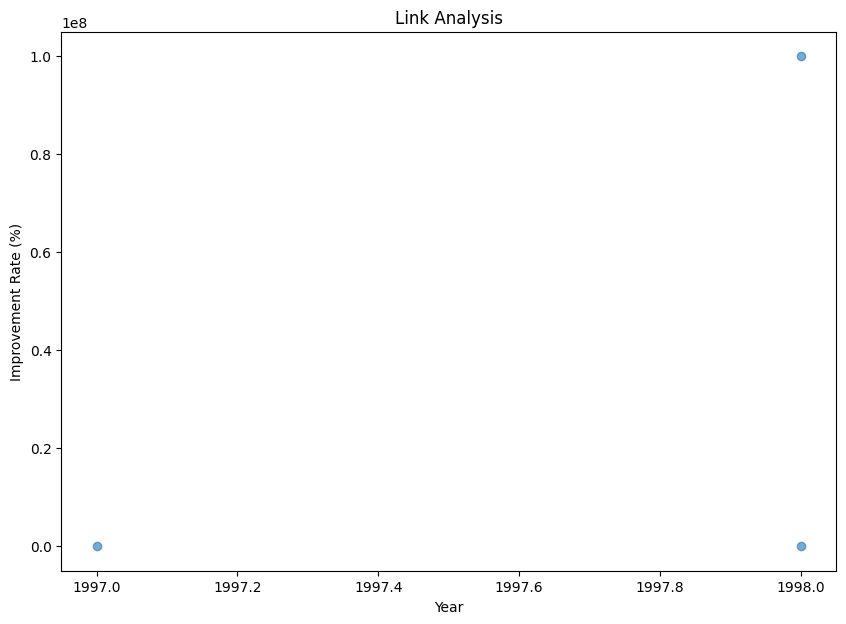

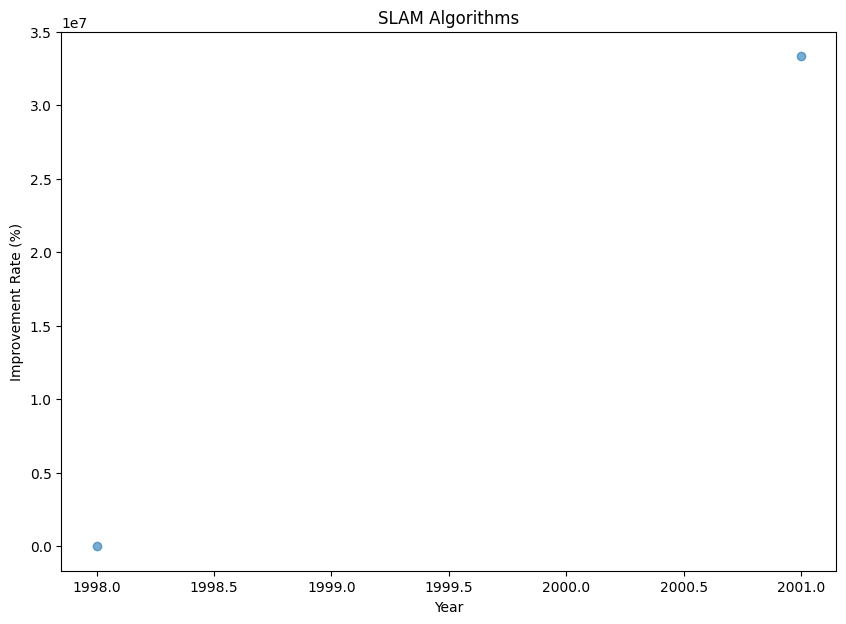

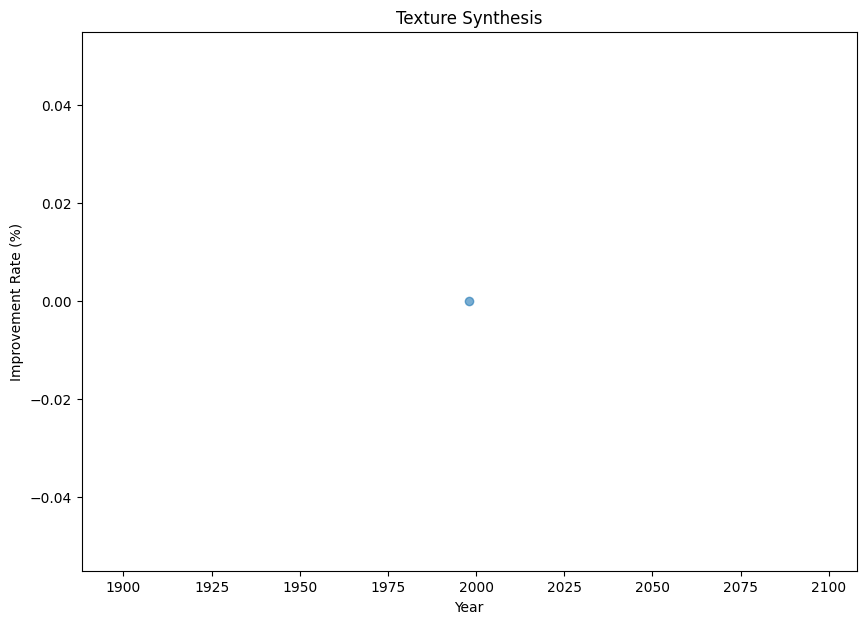

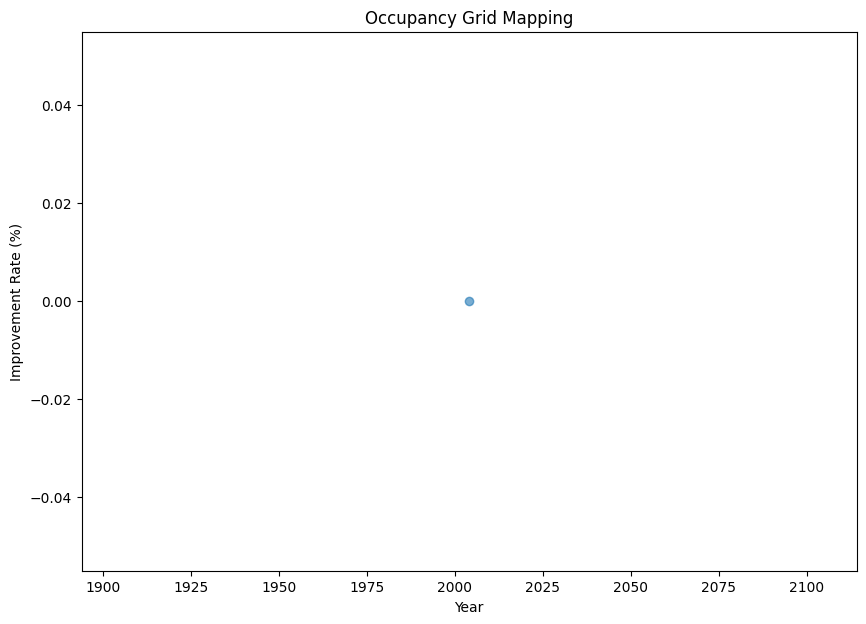

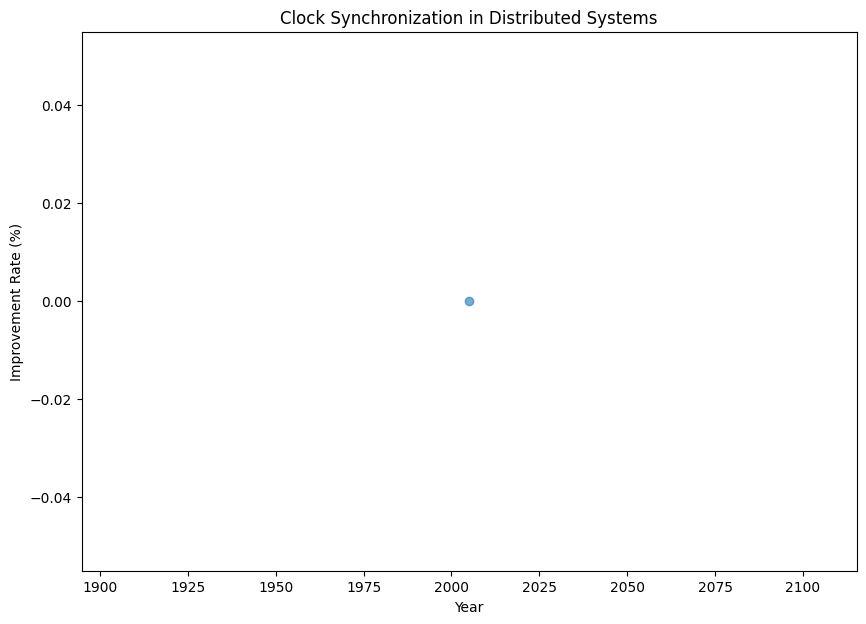

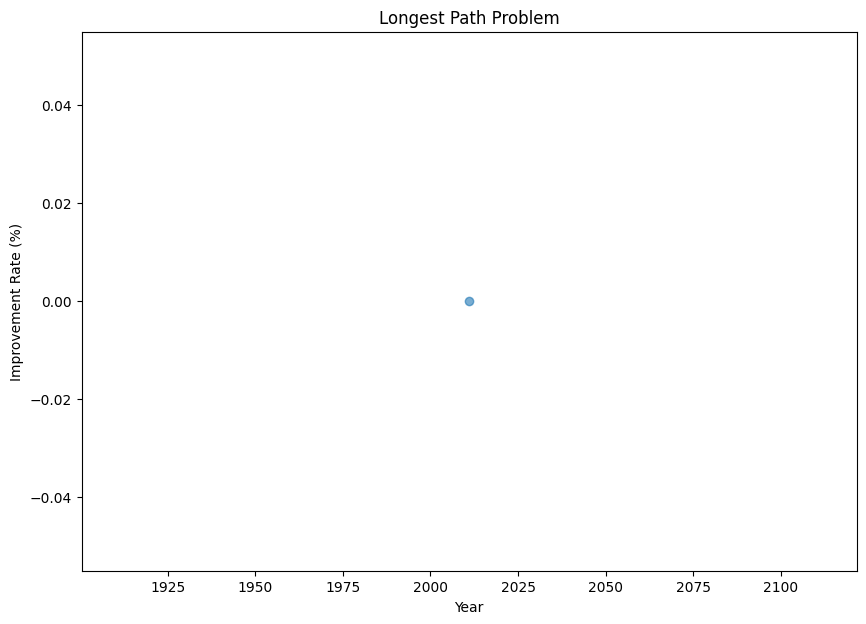

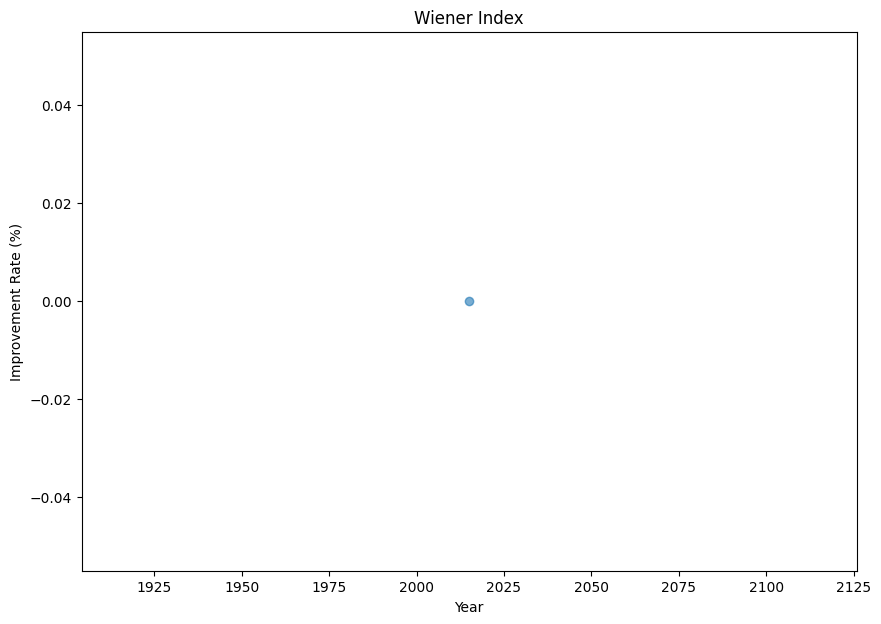

In [17]:
# Select the required columns
selected_columns = ['Family Name', 'Year', 'Time Complexity Improvement?', 'Transition Class', 'Time Complexity Class']
df = df.loc[:, selected_columns].copy()

# Filter the rows where 'Time Complexity Improvement?' is 1
df = df[df['Time Complexity Improvement?'] == 1].copy()

# Sort the DataFrame by 'Year'
df = df.sort_values(by='Year')

# Define the function to calculate transition difference
def calculate_transition_difference(entry):
    if entry == '0' or entry == '-' or entry == '1':
        return 0
    numbers = entry.split('->')
    return int(numbers[1]) - int(numbers[0])

# Create a dictionary to store DataFrames for each unique 'Family Name'
family_name_dfs = {}

# Iterate over each group and create a separate DataFrame for each 'Family Name'
for family_name in df['Family Name'].unique():
    # Store the sorted DataFrame for the current 'Family Name' in the dictionary
    family_name_dfs[family_name] = df[df['Family Name'] == family_name].copy()
    family_name_dfs[family_name]['Transition Difference'] = family_name_dfs[family_name]['Transition Class'].apply(calculate_transition_difference)

# Set the amortized cost to 1,000,000
n = 1000000

# Initialize the list to store plots
plots = []

# Iterate over each 'Family Name' DataFrame in the dictionary
for i, (family_name, family_df) in enumerate(family_name_dfs.items()):
    # Compute the number of years since the previous improvement for each 'Family Name'
    family_df['Years Since Last Improvement'] = family_df['Year'].diff()

    # Compute the y-value for each algorithm with a time complexity improvement of 1
    family_df['Improvement Rate (%)'] = family_df['Transition Difference'] * n / family_df['Years Since Last Improvement'] * 100

    # Replace negative improvement rates with 0
    family_df['Improvement Rate (%)'] = family_df['Improvement Rate (%)'].apply(lambda x: max(0, x))

    # Scatter plot of 'Improvement Rate' over 'Year' for each algorithm
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(family_df['Year'], family_df['Improvement Rate (%)'], alpha=0.6, label=family_name)

    # Add title and labels
    ax.set_title(family_name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Improvement Rate (%)')

    # Store the plot in the list
    plots.append((fig, ax))

# Display the plots
for fig, ax in plots:
    plt.show()